<h2>bookmark data</h2>
<p1>Go to <a href=#bookmark1>basedata</a></p1>


<h1>import library

In [4]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix, accuracy_score
import sklearn.metrics as metrics


from math import factorial
from scipy.stats import randint
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
#import graphviz
from graphviz import Digraph
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

<h1>import data

In [6]:
data = pd.read_excel(r'C:\Users\Alfredo\Documents\euro\Euro-Football_2012-2023.xlsx')

### Original Dataset features
base data <a name='bookmark1' />

- **`match_id`**: Identifier for each match
- **`Country`**: The country of each league
- **`Div`**: League division (E0, E1, SP1)
- **`League`**: League name (Premier League, Championship, etc.)
- **`Date`**: Match date (dd/mm/yy)
- **`HomeTeam`**: Home team
- **`AwayTeam`**: Away team
- **`FTHG`**: *Full-time home team goals*
- **`FTAG`**: *Full-time away team goals*
- **`FTR`**: *Full-time result (H=Home Win, D=Draw, A=Away Win)*
- **`HTHG`**: *Half-time home team goals*
- **`HTAG`**: *Half-time away team goals*
- **`HTR`**: *Half-time result (H=Home Win, D=Draw, A=Away Win)*
- **`HS`**: *Home team shots*
- **`AS`**: *Away team shots*
- **`HST`**: *Home team shots on target*
- **`AST`**: *Away team shots on target*
- **`HC`**: *Home team corners*
- **`AC`**: *Away team corners*
- **`HF`**: *Home team fouls committed*
- **`AF`**: *Away team fouls committed*
- **`HY`**: *Home team yellow cards*
- **`AY`**: *Away team yellow cards*
- **`HR`**: *Home team red cards*
- **`AR`**: *Away team red cards*



In [8]:
data.head

<bound method NDFrame.head of           id   Country          League Div     Season       Date  \
0          0   England  Premier League  E0  2012-2013 2012-08-18   
1          1   England  Premier League  E0  2012-2013 2012-08-18   
2          2   England  Premier League  E0  2012-2013 2012-08-18   
3          3   England  Premier League  E0  2012-2013 2012-08-18   
4          4   England  Premier League  E0  2012-2013 2012-08-18   
...      ...       ...             ...  ..        ...        ...   
66142  66145  Portugal          Liga I  P1  2023-2024 2023-12-29   
66143  66146  Portugal          Liga I  P1  2023-2024 2023-12-30   
66144  66147  Portugal          Liga I  P1  2023-2024 2023-12-30   
66145  66148  Portugal          Liga I  P1  2023-2024 2023-12-30   
66146  66149  Portugal          Liga I  P1  2023-2024 2023-12-30   

           HomeTeam    AwayTeam     Referee  FTHG  ...   HST  AST    HF    AF  \
0           Arsenal  Sunderland       C Foy   0.0  ...   4.0  2.0  12.0 

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66147 entries, 0 to 66146
Data columns (total 27 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   id        66147 non-null  int64         
 1   Country   66147 non-null  object        
 2   League    66147 non-null  object        
 3   Div       66121 non-null  object        
 4   Season    66147 non-null  object        
 5   Date      66121 non-null  datetime64[ns]
 6   HomeTeam  66121 non-null  object        
 7   AwayTeam  66121 non-null  object        
 8   Referee   13620 non-null  object        
 9   FTHG      66119 non-null  float64       
 10  FTAG      66119 non-null  float64       
 11  FTR       66119 non-null  object        
 12  HTHG      66030 non-null  float64       
 13  HTAG      66030 non-null  float64       
 14  HTR       66030 non-null  object        
 15  HS        50116 non-null  float64       
 16  AS        50116 non-null  float64       
 17  HST       50

<h1>DATA CLEANING

In [11]:
#drop 'Referee'
data.drop(['Referee'], axis=1, inplace=True)
print('Referee column dropped')
data.columns
cols = ['id', 'Country', 'League', 'Div', 'Season', 'HomeTeam', 'AwayTeam', 'HTR', 'FTR']

Referee column dropped


<h2>ganti tipe data menjadi category</h2>

In [13]:
data.columns
cols = ['id', 'Country', 'League', 'Div', 'Season', 'HomeTeam', 'AwayTeam', 'HTR', 'FTR']
#convert cols to category type
data[cols] = data[cols].astype('category')

<h2>plotting data null</h2>

In [15]:
#plot missing values
print(f"{round((data.isnull().sum().sum()/data.size)*100)}% of the data are missing but all ids are unique: {data.id.nunique() == data.shape[0]}\n")

11% of the data are missing but all ids are unique: True



In [16]:
#identify leagues and seasons with missing data
chunk = data[data.isnull().any(axis=1)].copy()

# Assuming 'data' is your DataFrame
miss = chunk.groupby(['Season', 'League']).size().reset_index(name='count')

miss = miss[miss['count'] > 10].sort_values('League', ascending=False)
total_miss= sum(miss['count'])
print(miss,"total miss data",total_miss)

        Season             League  count
63   2015-2016            Serie B    462
47   2014-2015            Serie B    463
79   2016-2017            Serie B    462
31   2013-2014            Serie B    463
15   2012-2013            Serie B    463
45   2014-2015   Segunda Division    462
109  2018-2019   Segunda Division     21
29   2013-2014   Segunda Division    463
13   2012-2013   Segunda Division    463
77   2016-2017   Segunda Division    462
61   2015-2016   Segunda Division    462
58   2015-2016             Liga I    307
26   2013-2014             Liga I    240
42   2014-2015             Liga I    307
74   2016-2017             Liga I    306
10   2012-2013             Liga I    241
40   2014-2015     Jupiler League    240
24   2013-2014     Jupiler League    240
8    2012-2013     Jupiler League    240
88   2017-2018     Jupiler League    240
56   2015-2016     Jupiler League    240
104  2018-2019     Jupiler League    240
72   2016-2017     Jupiler League    240
71   2016-2017  

<h2>drop data</h2>

In [18]:
a = miss['Season'].to_list()
b = miss['League'].to_list()
# del chunk, miss
drops = tuple(zip(a, b))

indxs = []
for drop in drops:
#     print(drop[0],drop[1])
    indxs += data[ (data['Season'] == drop[0]) & (data['League'] == drop[1])].index.to_list()
    
print(f'{len(indxs)} rows dropped')

#drop rows with indxs
data.drop(indxs, inplace=True)

18103 rows dropped


In [19]:
# Menghapus baris dengan nilai Null'
#data.dropna(subset=['FTHG', 'HTHG','HS','HF','HY','HR',], inplace=True)

In [20]:
#cek lagi
print(f"{round((data.isnull().sum().sum()/data.size)*100)}% of the data are missing but all ids are unique: {data.id.nunique() == data.shape[0]}\n")
data.dropna(inplace=True)
data[data.isnull().any(axis=1)]


0% of the data are missing but all ids are unique: True



,id,Country,League,Div,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR


In [21]:
#sisa data
print(data['Country'].unique().tolist())
print("Total data yang masih ada setelah menghapus baris dengan nilai':", len(data))

['England', 'Spain', 'Italy', 'Germany', 'France', 'Scotland', 'Netherlands', 'Portugal', 'Turkey', 'Greece', 'Belgium']
Total data yang masih ada setelah menghapus baris dengan nilai': 48020


<h1>Penambahan data</h1>

### Goals and Results

goal and result <a name='bookmark2' />
- **`FHHG`**: *1st half home goals* (*former name: HTHG*)
- **`FHAG`**: *1st half away goals* (*former name: HTAG*)
- **`SHHG`**: *2nd half home goals*
- **`SHAG`**: *2nd half away goals*
- **`FTHG`**: *Full-time home goals*
- **`FTAG`**: *Full-time away goals*
- **`FHTG`**: *1st half total goals*
- **`SHTG`**: *2nd half total goals*
- **`FTTG`**: *Full-time total goals*
- **`FTGD`**: *Full-time goal difference*
- **`FHR`**: *1st half result* (*former name: HTR*)
- **`SHR`**: *2nd half result*
- **`FTR`**: *Full-time result*

In [25]:
# Renaming Columns
data.rename(columns={'HTHG': 'FHHG', 'HTAG': 'FHAG', 'HTR': 'FHR'}, inplace=True)

# total goals
data['SHHG'] = data['FTHG'] - data['FHHG']  # 2nd half home goals #
data['SHAG'] = data['FTAG'] - data['FHAG']  # 2nd half away goals #
data['FHTG'] = data['FHHG'] + data['FHAG']  # 1st half total goals #
data['SHTG'] = data['SHHG'] + data['SHAG']  # 2nd half total goals #
data['FTTG'] = data['FTHG'] + data['FTAG']  # full-time total goals

# goal difference
data['FTGD'] = abs(data['FTHG'] - data['FTAG'])  # full-time goal difference (absolute value) #


# 2nd half result
data['SHR'] = 'D'  # Default to 'D'
data.loc[data['SHHG'] > data['SHAG'], 'SHR'] = 'H'
data.loc[data['SHHG'] < data['SHAG'], 'SHR'] = 'A'

print('Sample of data:')
data[['FHHG', 'FHAG' ,'SHHG', 'SHAG', 'SHR', 'FHTG', 'SHTG', 'FTTG', 'FTGD']].head()

Sample of data:


,FHHG,FHAG,SHHG,SHAG,SHR,FHTG,SHTG,FTTG,FTGD
0,0.0,0.0,0.0,0.0,D,0.0,0.0,0.0,0.0
1,2.0,0.0,3.0,0.0,H,2.0,3.0,5.0,5.0
2,0.0,0.0,2.0,1.0,H,0.0,3.0,3.0,1.0
3,0.0,1.0,0.0,4.0,A,1.0,4.0,5.0,5.0
4,0.0,1.0,1.0,0.0,H,1.0,1.0,2.0,0.0


## Base total statistics


- **`TS`**: *Total Shots*
- **`TST`**: *Total Shots on Target*
- **`TC`**: *Total Corners*
- **`TF`**: *Total Fouls*
- **`TY`**: *Total Yellow Cards*
- **`TR`**: *Total Red Cards*

In [28]:
# Creating Total Shots (TS)
data['TS'] = data['HS'] + data['AS']

# Creating Total Shots on Target (TST)
data['TST'] = data['HST'] + data['AST']

# Creating Total Corners (TC)
data['TC'] = data['HC'] + data['AC']

# Creating Total Fouls (TF)
data['TF'] = data['HF'] + data['AF']

# Creating Total Yellow Cards (TY)
data['TY'] = data['HY'] + data['AY']

# Creating Total Red Cards (TR)
data['TR'] = data['HR'] + data['AR']

print('data sample:\n')
data[['HomeTeam','AwayTeam', 'TS', 'TST', 'TC', 'TF', 'TY', 'TR']].head()

data sample:



,HomeTeam,AwayTeam,TS,TST,TC,TF,TY,TR
0,Arsenal,Sunderland,17.0,6.0,7.0,20.0,0.0,0.0
1,Fulham,Norwich,15.0,11.0,9.0,23.0,0.0,0.0
2,Newcastle,Tottenham,18.0,10.0,8.0,20.0,4.0,0.0
3,QPR,Swansea,32.0,19.0,8.0,25.0,4.0,0.0
4,Reading,Stoke,15.0,6.0,7.0,23.0,6.0,1.0


## League Level Running totals

- `RTLM` :  Running Total League Matches
- `RTLG` :  Running Total League Goals
- `RTHG` :  Running Total Home Goals
- `RTAG` :  Running Total Away Goals
- `CALG` :  Cumulative Average League Goals
- `RALG` :  Running Average League Goals (20 matches)
- `AGSH` :  Average Goals Scored by Home Team per Match
- `AGSA` :  Average Goals Scored by Away Team per Match


In [31]:
# totals
# RTLM : Running Total League Matches
data['RTLM'] = data.groupby(['League', 'Season']).cumcount() + 1

# RTLG : Running Total League Goals
data['RTLG'] = data.groupby(['League', 'Season'])['FTTG'].cumsum()-data['FTTG']

# 'RTHG' : Running Total Home Goals
data['RTHG'] = data.groupby(['League', 'Season'])['FTHG'].cumsum()-data['FTHG']

# 'RTAG' : Running Total Away Goals
data['RTAG'] = data.groupby(['League', 'Season'])['FTAG'].cumsum()-data['FTAG']

# cumulativ averages
# CALG : Cumulative Average League Goals
data['CALG'] = (data['RTLG'] / (data['RTLM']-1)).fillna(0)
# data.groupby(['League', 'Season'])['FTTG'].transform(lambda x: x.expanding(min_periods=1).mean().shift()).fillna(0)

# AGSH = FTHG / RTLM : Average Goals Scored by Home Team per Match
data['AGSH'] = (data['RTHG'] / (data['RTLM']-1)).fillna(0)

# AGSA = FTAG / RTLM : Average Goals Scored by Away Team per Match
data['AGSA'] = (data['RTAG'] / (data['RTLM']-1)).fillna(0)

# rolling averages
# RALG : Rolling Average League Goals
data['RALG'] = data.groupby(['League', 'Season'])['FTTG'].transform(lambda x: x.rolling(20, min_periods=1).mean().shift()).fillna(0)

# RALHG : Rolling Average League Home Goals
data['RALHG'] = data.groupby(['League', 'Season'])['FTHG'].transform(lambda x: x.rolling(20, min_periods=1).mean().shift()).fillna(0)

# RALAG : Rolling Average League Away Goals
data['RALAG'] = data.groupby(['League', 'Season'])['FTAG'].transform(lambda x: x.rolling(20, min_periods=1).mean().shift()).fillna(0)


print('data sample:\n')

# Display the updated DataFrame with new columns
data.loc[(data['Season']=='2019-2020')&(data['Div']=='SP1'),['League', 'Date', 'FTHG', 'FTAG', 'RTLM', 'RTAG', 'CALG', 'AGSH', 'AGSA', 'RALG', 'RALHG', 'RALAG']].head(5)

data sample:



,League,Date,FTHG,FTAG,RTLM,RTAG,CALG,AGSH,AGSA,RALG,RALHG,RALAG
13324,Primera Division,2019-08-16,1.0,0.0,1,0.0,0.000000,0.00,0.000000,0.000000,0.00,0.000000
13325,Primera Division,2019-08-17,1.0,3.0,2,0.0,1.000000,1.00,0.000000,1.000000,1.00,0.000000
13326,Primera Division,2019-08-17,1.0,1.0,3,3.0,2.500000,1.00,1.500000,2.500000,1.00,1.500000
13327,Primera Division,2019-08-17,2.0,1.0,4,4.0,2.333333,1.00,1.333333,2.333333,1.00,1.333333
13328,Primera Division,2019-08-17,0.0,1.0,5,5.0,2.500000,1.25,1.250000,2.500000,1.25,1.250000


Binary Indicator
#### Reversals, Win to Draw, and Goals No Draw, Clean sheets, etc

---
- **`MR`**: Match Reversal - *Binary indicator for matches where the team winning the 1st half lost the match.*
- **`HMR`**: Home Match Reversal - *Binary indicator for matches where the home team lost the 1st half.but won the match*
- **`AMR`**: Away Match Reversal - *Binary indicator for matches where the away team lost the 1st half but won the match.*
- **`WTD`**: Win to Draw - *Binary indicator for matches where one team won the 1st half, but the match ended in a draw.*
- **`GND`**: Goals No Draw - *Binary indicator for matches where goals were scored but the match did not end in a draw.* 
- **`CS`**: Clean Sheet - *Binary indicator for matches where either the home or away team did not concede a goal.*
- **`CS1`**: Clean Sheet 1st Half - *Binary indicator for matches where either the home or away team did not concede a goal in the 1st half*
- **`CS2`**: Clean Sheet 2nd Half - Binary indicator for matches where either the home or away team did not concede a goal in the 2nd half.*
- **`CSH`**: Clean Sheet Home - *Binary indicator for matches where the home team did not concede a goal.*
- **`CSA`**: Clean Sheet Away - *Binary indicator for matches where the away team did not concede a goal.*
- **`BTTS`**: Both Teams To Score (BTTS)- *Binary indicator for matches where both teams scored.*
- **`BTTS1`**: BTTS 1st Half - *Binary indicator for matches where both teams scored in the 1st half.*
- **`BTTS2`**: BTTS 2nd Half - *Binary indicator for matches where both teams scored in the 2nd half.*
- **`BTTS3`**: BTTS Both Halves - *Binary indicator for matches where both teams scored in both halves.*
- **`BTTS_D`**: BTTS Draw - *Binary indicator for matches where both teams scored, and the match ended in a draw.*
- **`BTTS_ND`**: BTTS No Draw - *Binary indicator for matches where both teams scored, and the match ended in no draw*
- **`BTTS_D1`**: BTTS Draw 1st Half - *Binary indicator for matches where both teams scored in the 1st half, and the match ended in a draw*
- **`BTTS_D2`**: BTTS Draw 2nd Half - *Binary indicator for matches where both teams scored in the 2nd half, and the match ended in a draw*
- **`DHW`**: Double Half Win - *Binary indicator for matches where a team won both the 1st and 2nd halves.*
- **`DHWH`**: Double Half Win Home - *Binary indicator for matches where the home team won both the 1st and 2nd halves.*
- **`DHWA`**: Double Half Win Away - *Binary indicator for matches where the away team won both the 1st and 2nd halves.*
- **`HTLC`**: Half-Time Lead Conversion - *Binary indicator for matches where a team had a half-time lead and won the match.*
- **`HTHLC`**: Half-Time Lead Conversion Home - *Binary indicator for matches where the home team had a half-time lead and won the match*
- **`HTALC`**: Half-Time Lead Conversion Away - *Binary indicator for matches where the away team had a half-time lead and won the match*
---


In [34]:
# Reversal: Binary indicator for matches where the team winning the 1st half lost the match.
data['MR'] = (data['FHR'] == 'H') & (data['FTR'] == 'A')

# Home Reversal:Binary indicator for matches where the home team the 1st half but won the match.
data['HMR'] = (data['FHR'] == 'A') & (data['FTR'] == 'H')

# Away Reversal: Binary indicator for matches where the away team lost the 1st half but won the match.
data['AMR'] = (data['FHR'] == 'H') & (data['FTR'] == 'A')

# Win to Draw: Binary indicator for matches where one team won the 1st half, but the match ended in a draw.
data['WTD'] = (data['FHR'] == 'H') & (data['FTR'] == 'D') | (data['FHR'] == 'A') & (data['FTR'] == 'D')

# Goals No Draw: Binary indicator for matches where the match did not end in a draw.
data['GND'] = data['FTR'] != 'D'

#Clean Sheets: Binary indicator for matches where either the home or away team did not concede a goal.
data['CS'] = data['FTTG'] == 0

# Clean Sheet 1st Half: Binary indicator for matches where either the home or away team did not concede a goal in the 1st half.
data['CS1'] = data['FHTG'] == 0

# Clean Sheet 2nd Half: Binary indicator for matches where either the home or away team did not concede a goal in the 2nd half.
data['CS2'] = data['SHTG'] == 0

# Clean Sheet Home: Binary indicator for matches where the home team did not concede a goal.
data['CSH'] = data['FTAG'] == 0

# Clean Sheet Away: Binary indicator for matches where the away team did not concede a goal.
data['CSA'] = data['FTHG'] == 0

# BTTS (Both Teams to Score): Binary indicator for matches where both teams scored.
data['BTTS'] = (data['FTHG'] > 0) & (data['FTAG'] > 0)

# BTTS 1st Half: Binary indicator for matches where both teams scored in the 1st half.
data['BTTS1'] = (data['FHHG'] > 0) & (data['FHAG'] > 0)

# BTTS 2nd Half: Binary indicator for matches where both teams scored in the 2nd half.
data['BTTS2'] = (data['SHHG'] > 0) & (data['SHAG'] > 0)

# BTTS Both Halves: Binary indicator for matches where both teams scored in both halves.
data['BTTS3'] = data['BTTS1'] & data['BTTS2']

# BTTS Draw: Binary indicator for matches where both teams scored, and the match ended in a draw.
data['BTTS_D'] = data['BTTS'] & (data['FTR'] == 'D')

# BTTS no Draw: Binary indicator for matches where both teams scored, and the match ended in no draw.
data['BTTS_ND'] = data['BTTS'] & (data['FTR'] != 'D')

# BTTS Draw 1st Half: Binary indicator for matches where both teams scored in the 1st half, and the match ended in a draw.
data['BTTS_D1'] = data['BTTS1'] & (data['FTR'] == 'D')

# BTTS Draw 2nd Half: Binary indicator for matches where both teams scored in the 2nd half, and the match ended in a draw.
data['BTTS_D2'] = data['BTTS2'] & (data['FTR'] == 'D')

# Double Half Win (DHW): Binary indicator for matches where a team won both the 1st and 2nd halves.
data['DHW'] = (data['FHR'] == 'H') & (data['SHR'] == 'H') & (data['FTR'] == 'H')

# Double Half Win Home (DHWH): Binary indicator for matches where the home team won both the 1st and 2nd halves.
data['DHWH'] = data['DHW'] & (data['FHR'] == 'H')

# Double Half Win Away (DHWA): Binary indicator for matches where the away team won both the 1st and 2nd halves.
data['DHWA'] = data['DHW'] & (data['FHR'] == 'A')

# Half-Time Lead Conversion (HTLC): Binary indicator for matches where a team had a half-time lead and won the match.
data['HTLC'] = (data['FHR'] == 'H') & (data['FTR'] == 'H') | (data['FHR'] == 'A') & (data['FTR'] == 'A')

# Half-Time Lead Conversion Home (HTHLC): Binary indicator for matches where the home team had a half-time lead and won the match.
data['HTHLC'] = (data['FHR'] == 'H') & (data['FTR'] == 'H')

# Half-Time Lead Conversion Away (HTALC): Binary indicator for matches where the away team had a half-time lead and won the match.
data['HTALC'] = (data['FHR'] == 'A') & (data['FTR'] == 'A')

cols = ['CS','CS1', 'CS2', 'CSH', 'CSA', 'BTTS', 'BTTS1', 'BTTS2', 'BTTS3', 'BTTS_D', 'BTTS_ND', 'BTTS_D1', 'BTTS_D2', 'DHW', 'DHWH', 'DHWA', 'HTLC', 'HTHLC', 'HTALC']
data[cols] = data[cols].astype(int)
data[cols].head()


,CS,CS1,CS2,CSH,CSA,BTTS,BTTS1,BTTS2,BTTS3,BTTS_D,BTTS_ND,BTTS_D1,BTTS_D2,DHW,DHWH,DHWA,HTLC,HTHLC,HTALC
0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,1,1,0
2,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1
4,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0


<h2> Indikator win</h2>

In [36]:
# indikator home win
data['Home_Win'] = (data['FTHG'] > data['FTAG']).astype(int)
data['Home_Win'].replace({0: 1, 1: 0}, inplace=True)  # Ubah nilai 0 menjadi 1 dan sebaliknya untuk menyesuaikan kondisi
data[['FTHG', 'FTAG', 'FTR', 'Home_Win']].head()  # Tampilkan beberapa kolom untuk memeriksa hasilnya

# indikator away win
data['Away_Win'] = (data['FTAG'] > data['FTHG']).astype(int)
data['Away_Win'].replace({0: 1, 1: 0}, inplace=True)  # Ubah nilai 0 menjadi 1 dan sebaliknya untuk menyesuaikan kondisi
data[['FTHG', 'FTAG', 'FTR', 'Home_Win', 'Away_Win']].head()  # Tampilkan beberapa kolom untuk memeriksa hasilnya


,FTHG,FTAG,FTR,Home_Win,Away_Win
0,0.0,0.0,D,1,1
1,5.0,0.0,H,0,1
2,2.0,1.0,H,0,1
3,0.0,5.0,A,1,0
4,1.0,1.0,D,1,1


<h1>FINAL DATA</h1>

In [38]:
columns=['id', 'Country', 'League', 'Div', 'Season', 'Date', 'Team', 'status', 'Against',
         'FHGF', 'FHGA', 'SHGF', 'SHGA', 'FTGF', 'FTGA', 'FTR', 'FHR', 'SHR', 'PF', 'PA',
          'RALHG', 'RALAG'] #league stats

h_team = pd.DataFrame(columns = columns)
a_team = pd.DataFrame(columns = columns)

h_team

team = pd.concat([h_team, a_team], ignore_index=True)
print('Tables combined. Sample:\n')
team

Tables combined. Sample:



,id,Country,League,Div,Season,Date,Team,status,Against,FHGF,...,SHGA,FTGF,FTGA,FTR,FHR,SHR,PF,PA,RALHG,RALAG


In [39]:
dummies1 =  pd.get_dummies(data['FHR'])
dummies2 =  pd.get_dummies(data['SHR'])
dummies1.columns = ['H1', 'D1', 'A1']
dummies2.columns = ['A2', 'D2', 'H2']
dummies = pd.concat([dummies1,dummies2,pd.get_dummies(data['FTR'])], axis=1).replace({True: 1, False: 0})
data = pd.concat([data, dummies], axis=1)

del dummies1, dummies2, dummies
print(data.shape)
data.head()

(48020, 84)


,id,Country,League,Div,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,...,Away_Win,H1,D1,A1,A2,D2,H2,A,D,H
0,0,England,Premier League,E0,2012-2013,2012-08-18,Arsenal,Sunderland,0.0,0.0,...,1,0,1,0,0,1,0,0,1,0
1,1,England,Premier League,E0,2012-2013,2012-08-18,Fulham,Norwich,5.0,0.0,...,1,0,0,1,0,0,1,0,0,1
2,2,England,Premier League,E0,2012-2013,2012-08-18,Newcastle,Tottenham,2.0,1.0,...,1,0,1,0,0,0,1,0,0,1
3,3,England,Premier League,E0,2012-2013,2012-08-18,QPR,Swansea,0.0,5.0,...,0,1,0,0,1,0,0,1,0,0
4,4,England,Premier League,E0,2012-2013,2012-08-18,Reading,Stoke,1.0,1.0,...,1,1,0,0,0,0,1,0,1,0


In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48020 entries, 0 to 66146
Data columns (total 84 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   id        48020 non-null  category      
 1   Country   48020 non-null  category      
 2   League    48020 non-null  category      
 3   Div       48020 non-null  category      
 4   Season    48020 non-null  category      
 5   Date      48020 non-null  datetime64[ns]
 6   HomeTeam  48020 non-null  category      
 7   AwayTeam  48020 non-null  category      
 8   FTHG      48020 non-null  float64       
 9   FTAG      48020 non-null  float64       
 10  FTR       48020 non-null  category      
 11  FHHG      48020 non-null  float64       
 12  FHAG      48020 non-null  float64       
 13  FHR       48020 non-null  category      
 14  HS        48020 non-null  float64       
 15  AS        48020 non-null  float64       
 16  HST       48020 non-null  float64       
 17  AST       48020 n

In [41]:
# Mencari variabel kategorikal
categorical = [var for var in data.columns if data[var].dtype == 'category']
print('Ada {} variabel kategorikal\n'.format(len(categorical)))
print('Variabel kategorikal adalah :\n\n', categorical)

Ada 9 variabel kategorikal

Variabel kategorikal adalah :

 ['id', 'Country', 'League', 'Div', 'Season', 'HomeTeam', 'AwayTeam', 'FTR', 'FHR']


In [42]:
# Mencari variabel float
categorical = [var for var in data.columns if data[var].dtype == 'float64']
print('Ada {} variabel kategorikal\n'.format(len(categorical)))
print('Variabel kategorikal adalah :\n\n', categorical)

Ada 37 variabel kategorikal

Variabel kategorikal adalah :

 ['FTHG', 'FTAG', 'FHHG', 'FHAG', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY', 'AY', 'HR', 'AR', 'SHHG', 'SHAG', 'FHTG', 'SHTG', 'FTTG', 'FTGD', 'TS', 'TST', 'TC', 'TF', 'TY', 'TR', 'RTLG', 'RTHG', 'RTAG', 'CALG', 'AGSH', 'AGSA', 'RALG', 'RALHG', 'RALAG']


In [43]:
total_data = data.shape[0]
print("Total data:", total_data)


Total data: 48020


<h1>ANALISIS TIMEEEEE (GRAFIKAL PLOT)</h1>

<H3>Full time result all game</H3>

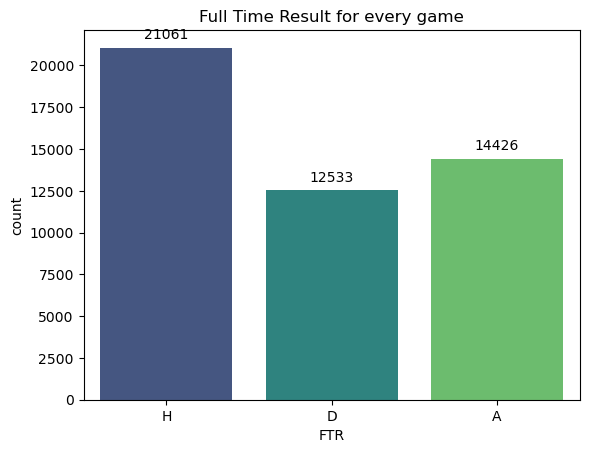

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

# Membuat countplot
hda = sns.countplot(x='FTR', data=data, palette='viridis', order=['H', 'D', 'A'])

# Menambahkan keterangan angka pada setiap baris
for p in hda.patches:
    hda.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

# Memberikan judul pada plot
hda.set_title('Full Time Result for every game')

# Menampilkan plot
plt.show()


<h3>full time result every league</h3>

Text(0.5, 1.0, 'Greece - Ethniki Katigoria')

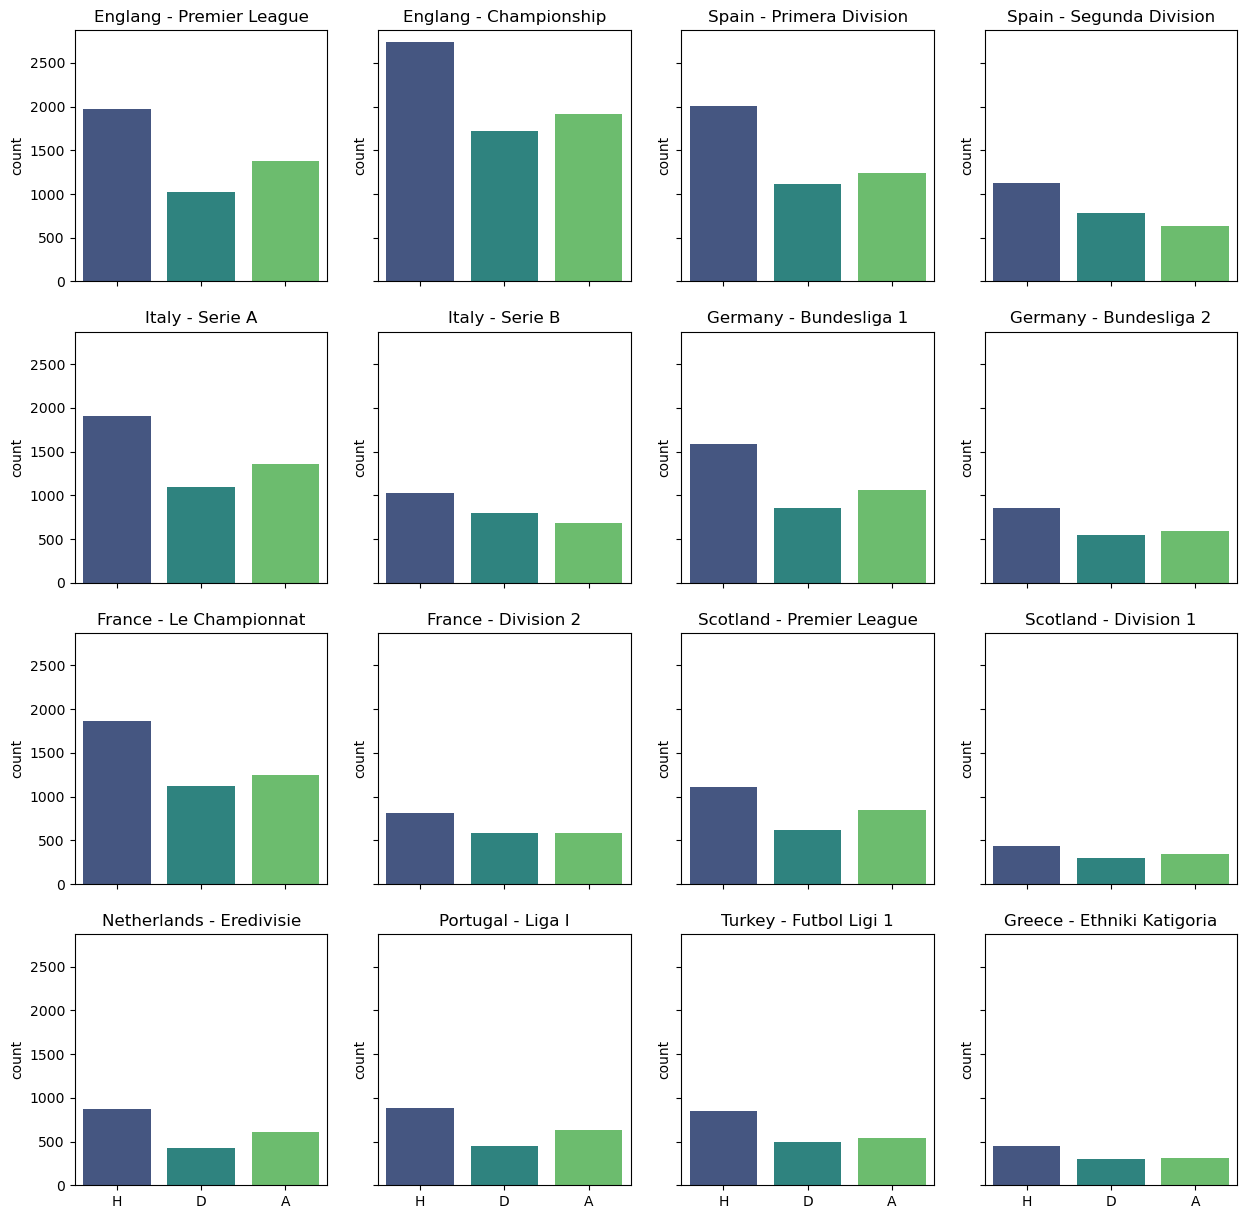

In [48]:
# ['E0', 'E1', 'SP1', 'SP2', 'I1', 'I2', 'D1', 'D2', 'F1', 'F2', 'SC0', 'SC1', 'N1', 'P1', 'T1', 'G1', 'B1']

fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(15, 15), sharey=True, sharex=True)
sns.countplot(x='FTR', data=data[data['Div'] == 'E0'], palette='viridis',order=['H', 'D', 'A'],ax=axes[0, 0]).set_xlabel('')
axes[0, 0].set_title('Englang - Premier League')
sns.countplot(x='FTR', data=data[data['Div'] == 'E1'], palette='viridis',order=['H', 'D', 'A'],ax=axes[0, 1]).set_xlabel('')
axes[0, 1].set_title('Englang - Championship')
sns.countplot(x='FTR', data=data[data['Div'] == 'SP1'], palette='viridis',order=['H', 'D', 'A'],ax=axes[0, 2]).set_xlabel('')
axes[0, 2].set_title('Spain - Primera Division')
sns.countplot(x='FTR', data=data[data['Div'] == 'SP2'], palette='viridis',order=['H', 'D', 'A'],ax=axes[0, 3]).set_xlabel('')
axes[0, 3].set_title('Spain - Segunda Division')
sns.countplot(x='FTR', data=data[data['Div'] == 'I1'], palette='viridis',order=['H', 'D', 'A'],ax=axes[1, 0]).set_xlabel('')
axes[1, 0].set_title('Italy - Serie A')
sns.countplot(x='FTR', data=data[data['Div'] == 'I2'], palette='viridis',order=['H', 'D', 'A'],ax=axes[1, 1]).set_xlabel('')
axes[1, 1].set_title('Italy - Serie B')
sns.countplot(x='FTR', data=data[data['Div'] == 'D1'], palette='viridis',order=['H', 'D', 'A'],ax=axes[1, 2]).set_xlabel('')
axes[1, 2].set_title('Germany - Bundesliga 1')
sns.countplot(x='FTR', data=data[data['Div'] == 'D2'], palette='viridis',order=['H', 'D', 'A'],ax=axes[1, 3]).set_xlabel('')
axes[1, 3].set_title('Germany - Bundesliga 2')
sns.countplot(x='FTR', data=data[data['Div'] == 'F1'], palette='viridis',order=['H', 'D', 'A'],ax=axes[2, 0]).set_xlabel('')
axes[2, 0].set_title('France - Le Championnat')
sns.countplot(x='FTR', data=data[data['Div'] == 'F2'], palette='viridis',order=['H', 'D', 'A'],ax=axes[2, 1]).set_xlabel('')
axes[2, 1].set_title('France - Division 2')
sns.countplot(x='FTR', data=data[data['Div'] == 'SC0'], palette='viridis',order=['H', 'D', 'A'],ax=axes[2, 2]).set_xlabel('')
axes[2, 2].set_title('Scotland - Premier League')
sns.countplot(x='FTR', data=data[data['Div'] == 'SC1'], palette='viridis',order=['H', 'D', 'A'],ax=axes[2, 3]).set_xlabel('')
axes[2, 3].set_title('Scotland - Division 1')
sns.countplot(x='FTR', data=data[data['Div'] == 'N1'], palette='viridis',order=['H', 'D', 'A'],ax=axes[3, 0]).set_xlabel('')
axes[3, 0].set_title('Netherlands - Eredivisie')
sns.countplot(x='FTR', data=data[data['Div'] == 'P1'], palette='viridis',order=['H', 'D', 'A'],ax=axes[3, 1]).set_xlabel('')
axes[3, 1].set_title('Portugal - Liga I')
sns.countplot(x='FTR', data=data[data['Div'] == 'T1'], palette='viridis',order=['H', 'D', 'A'],ax=axes[3, 2]).set_xlabel('')
axes[3, 2].set_title('Turkey - Futbol Ligi 1')
sns.countplot(x='FTR', data=data[data['Div'] == 'G1'], palette='viridis',order=['H', 'D', 'A'],ax=axes[3, 3]).set_xlabel('')
axes[3, 3].set_title('Greece - Ethniki Katigoria')

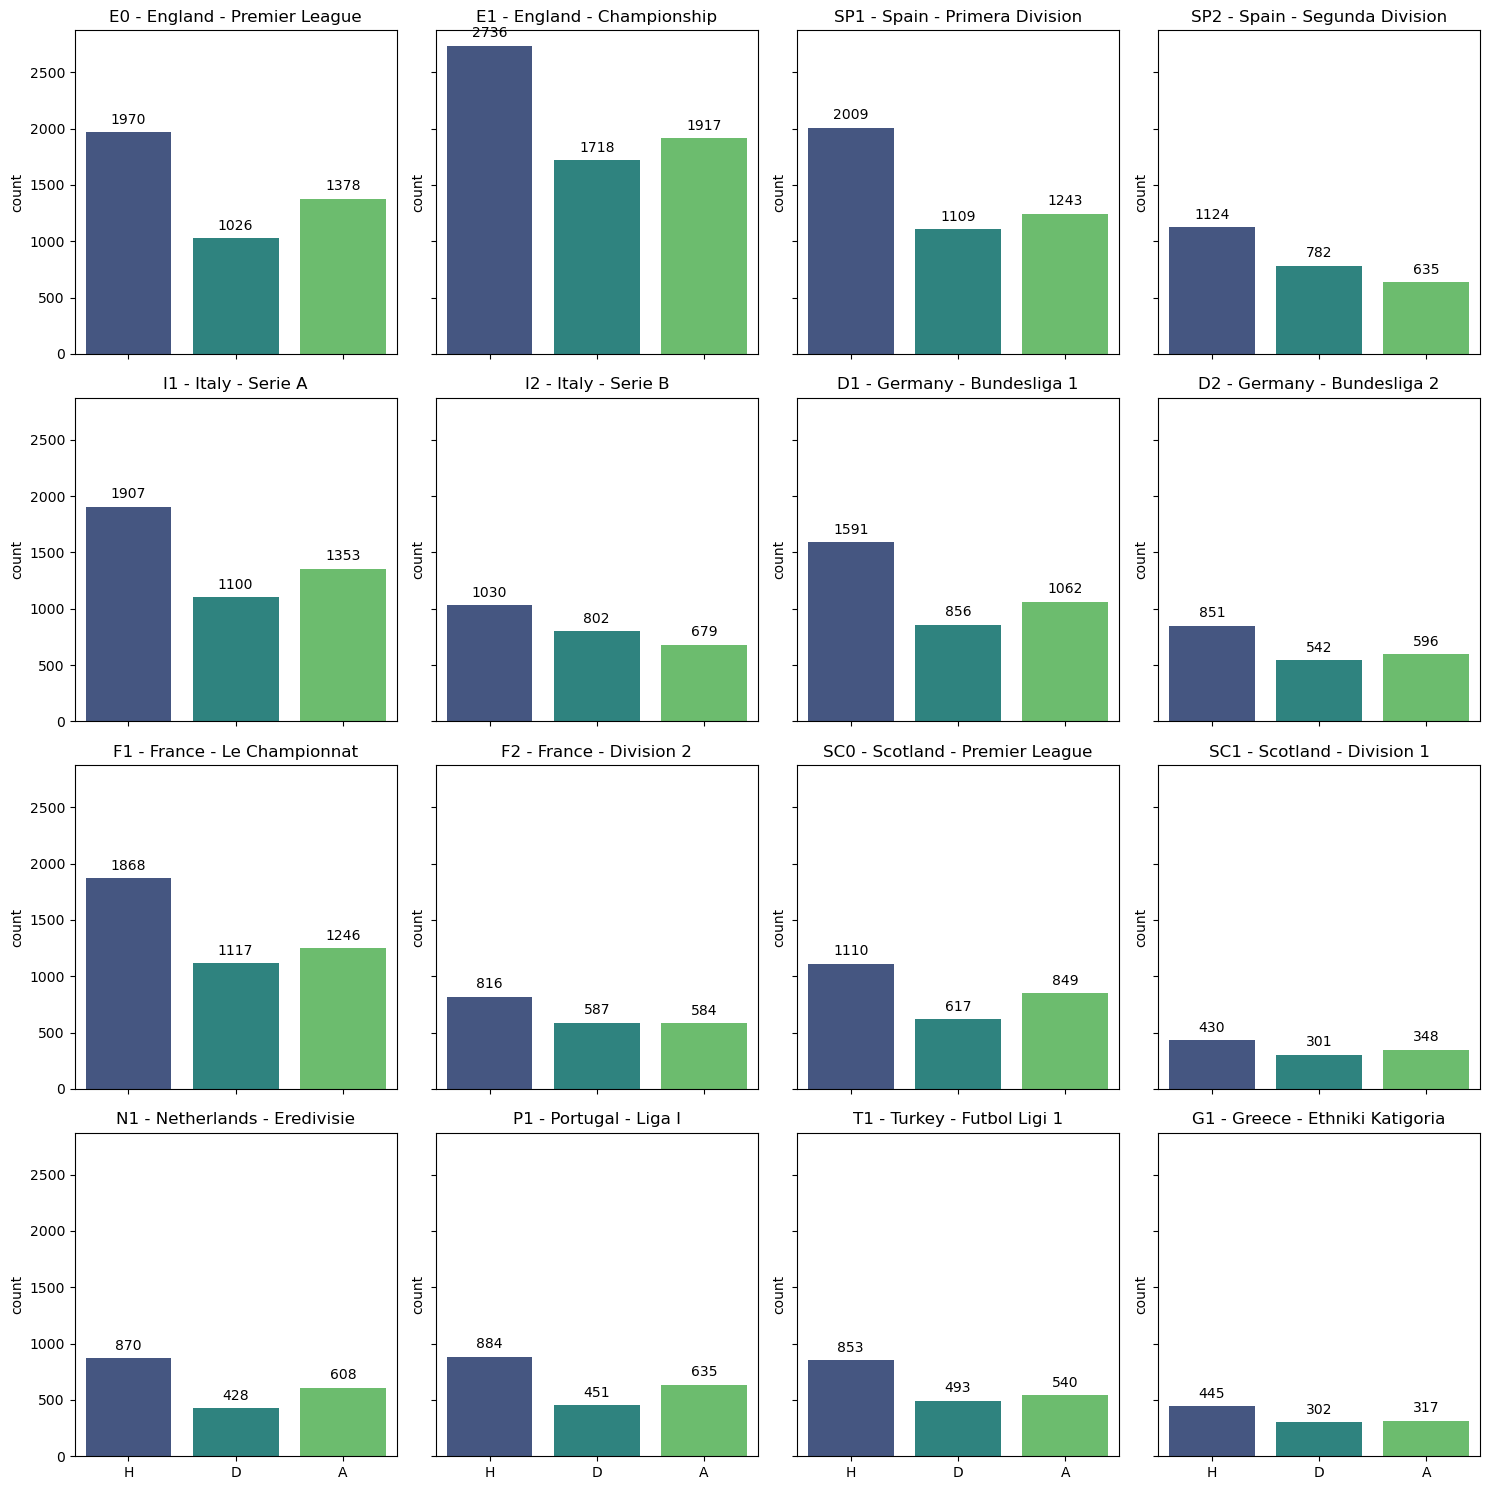

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

divisions = ['E0', 'E1', 'SP1', 'SP2', 'I1', 'I2', 'D1', 'D2', 'F1', 'F2', 'SC0', 'SC1', 'N1', 'P1', 'T1', 'G1', 'B1']
division_names = {
    'E0': 'England - Premier League',
    'E1': 'England - Championship',
    'SP1': 'Spain - Primera Division',
    'SP2': 'Spain - Segunda Division',
    'I1': 'Italy - Serie A',
    'I2': 'Italy - Serie B',
    'D1': 'Germany - Bundesliga 1',
    'D2': 'Germany - Bundesliga 2',
    'F1': 'France - Le Championnat',
    'F2': 'France - Division 2',
    'SC0': 'Scotland - Premier League',
    'SC1': 'Scotland - Division 1',
    'N1': 'Netherlands - Eredivisie',
    'P1': 'Portugal - Liga I',
    'T1': 'Turkey - Futbol Ligi 1',
    'G1': 'Greece - Ethniki Katigoria',
    'B1': 'Unknown'
}

fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(15, 15), sharey=True, sharex=True)

# Looping through each division and its corresponding axis
for i, division in enumerate(divisions):
    if i < axes.size:
        row = i // 4
        col = i % 4
        ax = axes[row, col]

        # Creating countplot
        sns.countplot(x='FTR', data=data[data['Div'] == division], palette='viridis', order=['H', 'D', 'A'], ax=ax).set_xlabel('')

        # Annotating each bar with its count
        for p in ax.patches:
            ax.annotate(format(p.get_height(), '.0f'), 
                           (p.get_x() + p.get_width() / 2., p.get_height()), 
                           ha = 'center', va = 'center', 
                           xytext = (0, 9), 
                           textcoords = 'offset points')

        # Setting title for each subplot
        ax.set_title(f'{division} - {division_names[division]}')

plt.tight_layout()
plt.show()



<h3> violin plot distribution (count goals,corners,foul)</h3>

Text(0.5, 1.0, 'Away Fouls')

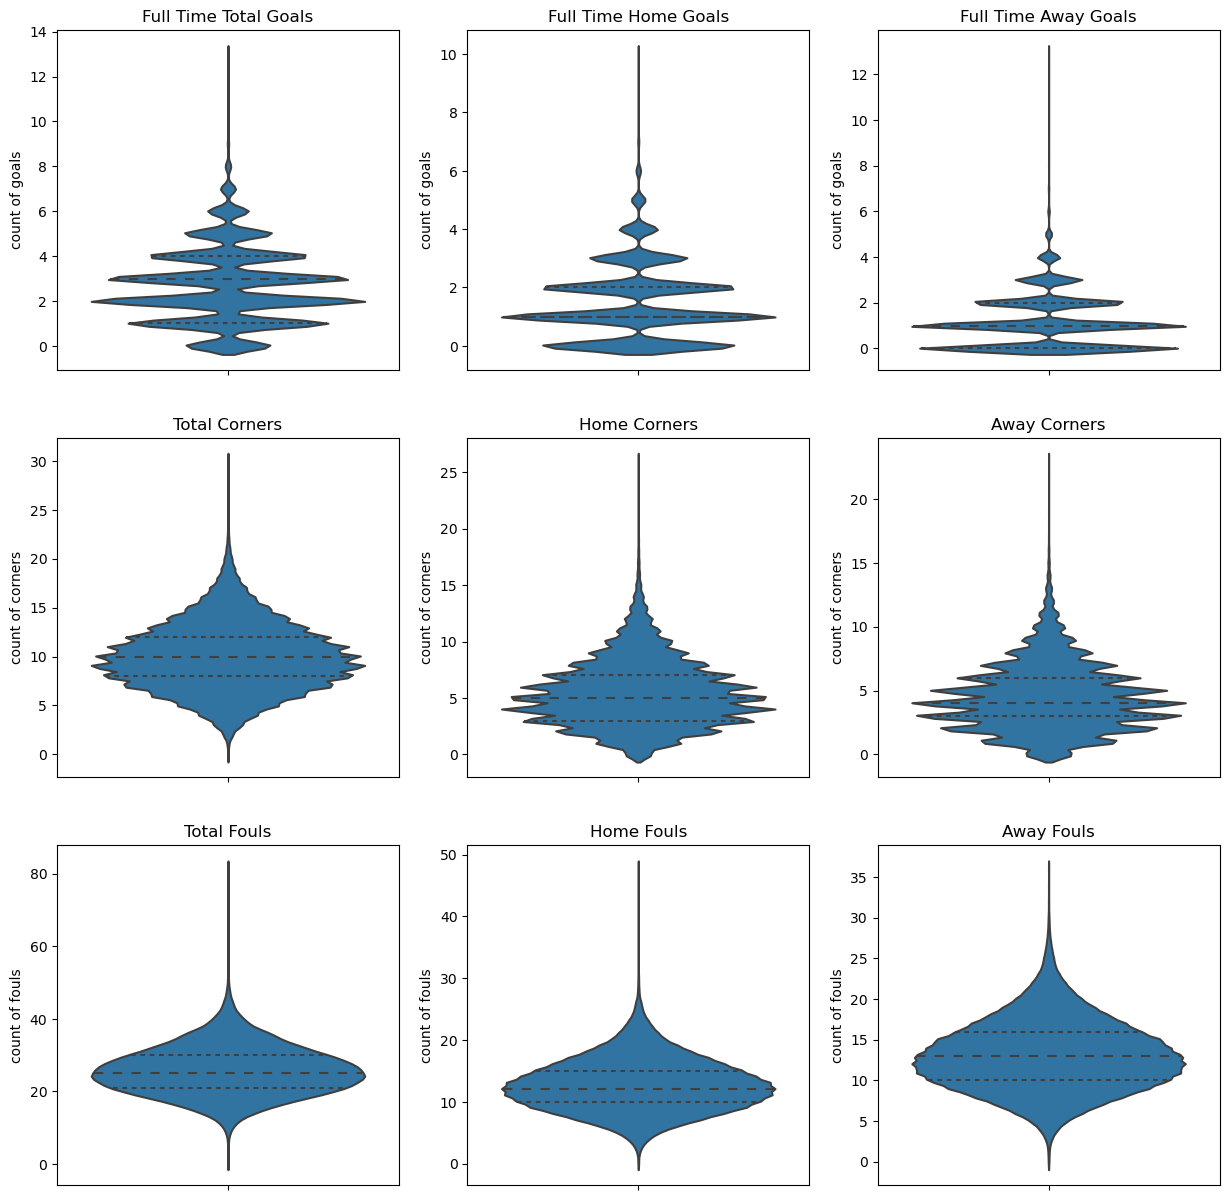

In [51]:
# violin plots for distributions

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15),) #sharey=True, sharex=True
sns.violinplot(data=data,y="FTTG", inner="quart",ax=axes[0, 0]).set_ylabel('count of goals')
axes[0, 0].set_title('Full Time Total Goals')
sns.violinplot(data=data,y="FTHG", inner="quart",ax=axes[0, 1]).set_ylabel('count of goals')
axes[0, 1].set_title('Full Time Home Goals')
sns.violinplot(data=data,y="FTAG", inner="quart",ax=axes[0, 2]).set_ylabel('count of goals')
axes[0, 2].set_title('Full Time Away Goals')
sns.violinplot(data=data,y="TC", inner="quart",ax=axes[1, 0]).set_ylabel('count of corners')
axes[1, 0].set_title('Total Corners')
sns.violinplot(data=data,y="HC", inner="quart",ax=axes[1, 1]).set_ylabel('count of corners')
axes[1, 1].set_title('Home Corners')
sns.violinplot(data=data,y="AC", inner="quart",ax=axes[1, 2]).set_ylabel('count of corners')
axes[1, 2].set_title('Away Corners')
sns.violinplot(data=data,y="TF", inner="quart",ax=axes[2, 0]).set_ylabel('count of fouls')
axes[2, 0].set_title('Total Fouls')
sns.violinplot(data=data,y="HF", inner="quart",ax=axes[2, 1]).set_ylabel('count of fouls')
axes[2, 1].set_title('Home Fouls')
sns.violinplot(data=data,y="AF", inner="quart",ax=axes[2, 2]).set_ylabel('count of fouls')
axes[2, 2].set_title('Away Fouls')

<h3>chart corner </h3>

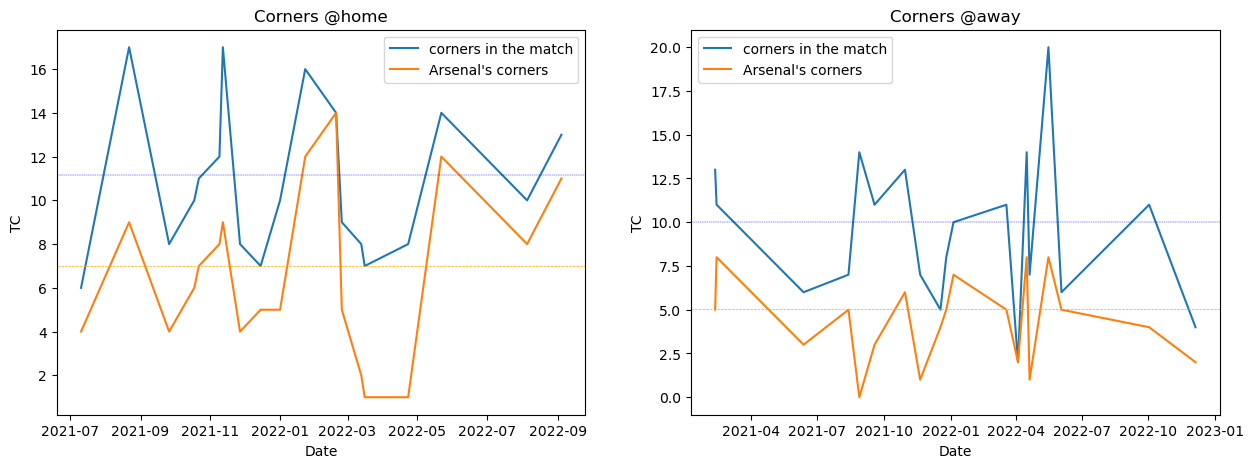

In [53]:
f1 = data['HomeTeam'] == 'Arsenal'
a1 = data[f1][['Date','Season', 'HomeTeam', 'HC', 'TC']]
a1['rolling corners'] = a1['HC'].rolling(10).mean()

f2 = data['AwayTeam'] == 'Arsenal'
a2 = data[f2][['Date','Season', 'AwayTeam', 'AC', 'TC']]
a2['rolling corners'] = a2['AC'].rolling(10).mean()

# #plot timeline of corners in facet grid
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

c1 = sns.lineplot(x='Date', y='TC', data=a1[a1['Season'] == '2021-2022'], ax=axes[0], label='corners in the match')
c1 = sns.lineplot(x='Date', y='HC', data=a1[a1['Season'] == '2021-2022'], ax=axes[0], label="Arsenal's corners")
# add reference lines
c1.axhline(y=a1['HC'].mean(), color='orange', linestyle='--', label='mean', linewidth=0.5)
c1.axhline(y=a1['TC'].mean(), color='blue', linestyle='--', label='mean', linewidth=0.3)
c1.set_title('Corners @home')

c2 = sns.lineplot(x='Date', y='TC', data=a2[a2['Season'] == '2021-2022'], ax=axes[1], label='corners in the match')
c2 = sns.lineplot(x='Date', y='AC', data=a2[a2['Season'] == '2021-2022'], ax=axes[1], label="Arsenal's corners")
c2.axhline(y=a2['AC'].mean(), color='orange', linestyle='--', label='mean', linewidth=0.5)
c2.axhline(y=a2['TC'].mean(), color='blue', linestyle='--', label='mean', linewidth=0.3)
c2.set_title('Corners @away')

del a1, a2, f1, f2, c1, c2

<h2>Average league per season</h2>

Text(997.671568627451, 0.5, '')

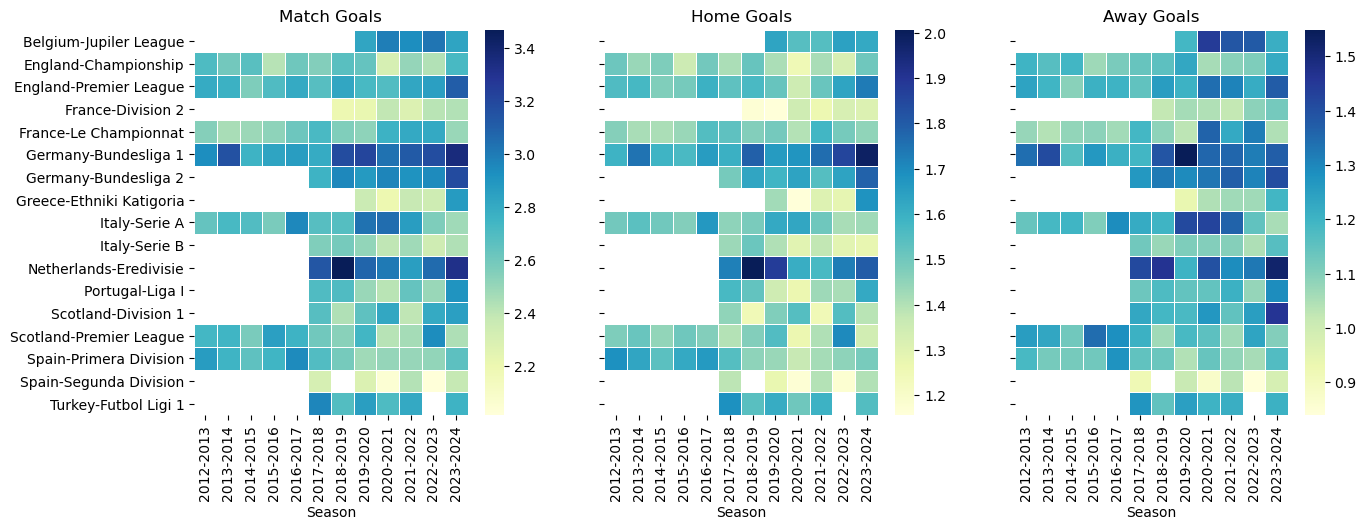

In [55]:
# groupby Country and League sum goals
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

o = data[['Country', 'League', 'Season','FTTG']].groupby(['Country', 'League', 'Season']).mean()\
                                                .dropna().reset_index()\
                                                .pivot(index=['Country', 'League'], columns='Season', values='FTTG')
ov = sns.heatmap(o, annot=False, linewidths=.5, cmap="YlGnBu", ax=axes[0], yticklabels=False,)
ov.set_title('Match Goals')
axes[0].set_ylabel('') 

h = data[['Country', 'League', 'Season','FTHG']].groupby(['Country', 'League', 'Season']).mean()\
                                                .dropna().reset_index()\
                                                .pivot(index=['Country', 'League'], columns='Season', values='FTHG')
hv = sns.heatmap(h, annot=False, linewidths=.5, cmap="YlGnBu", ax=axes[1]).set_title('Home Goals')
axes[1].set_ylabel('') 

a = data[['Country', 'League', 'Season','FTAG']].groupby(['Country', 'League', 'Season']).mean()\
                                                .dropna().reset_index()\
                                                .pivot(index=['Country', 'League'], columns='Season', values='FTAG')

av = sns.heatmap(a, annot=False, linewidths=.5, cmap="YlGnBu", ax=axes[2]).set_title('Away Goals')
axes[2].set_ylabel('') 


<h2>Top 5 team per country FTHG-HST-HS based on FTHG</h2>

C:\Users\Alfredo\AppData\Local\Temp\ipykernel_29104\1559195344.py:16: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_5_per_country = country_home_stats.groupby('Country').apply(top_5_teams).reset_index(drop=True)


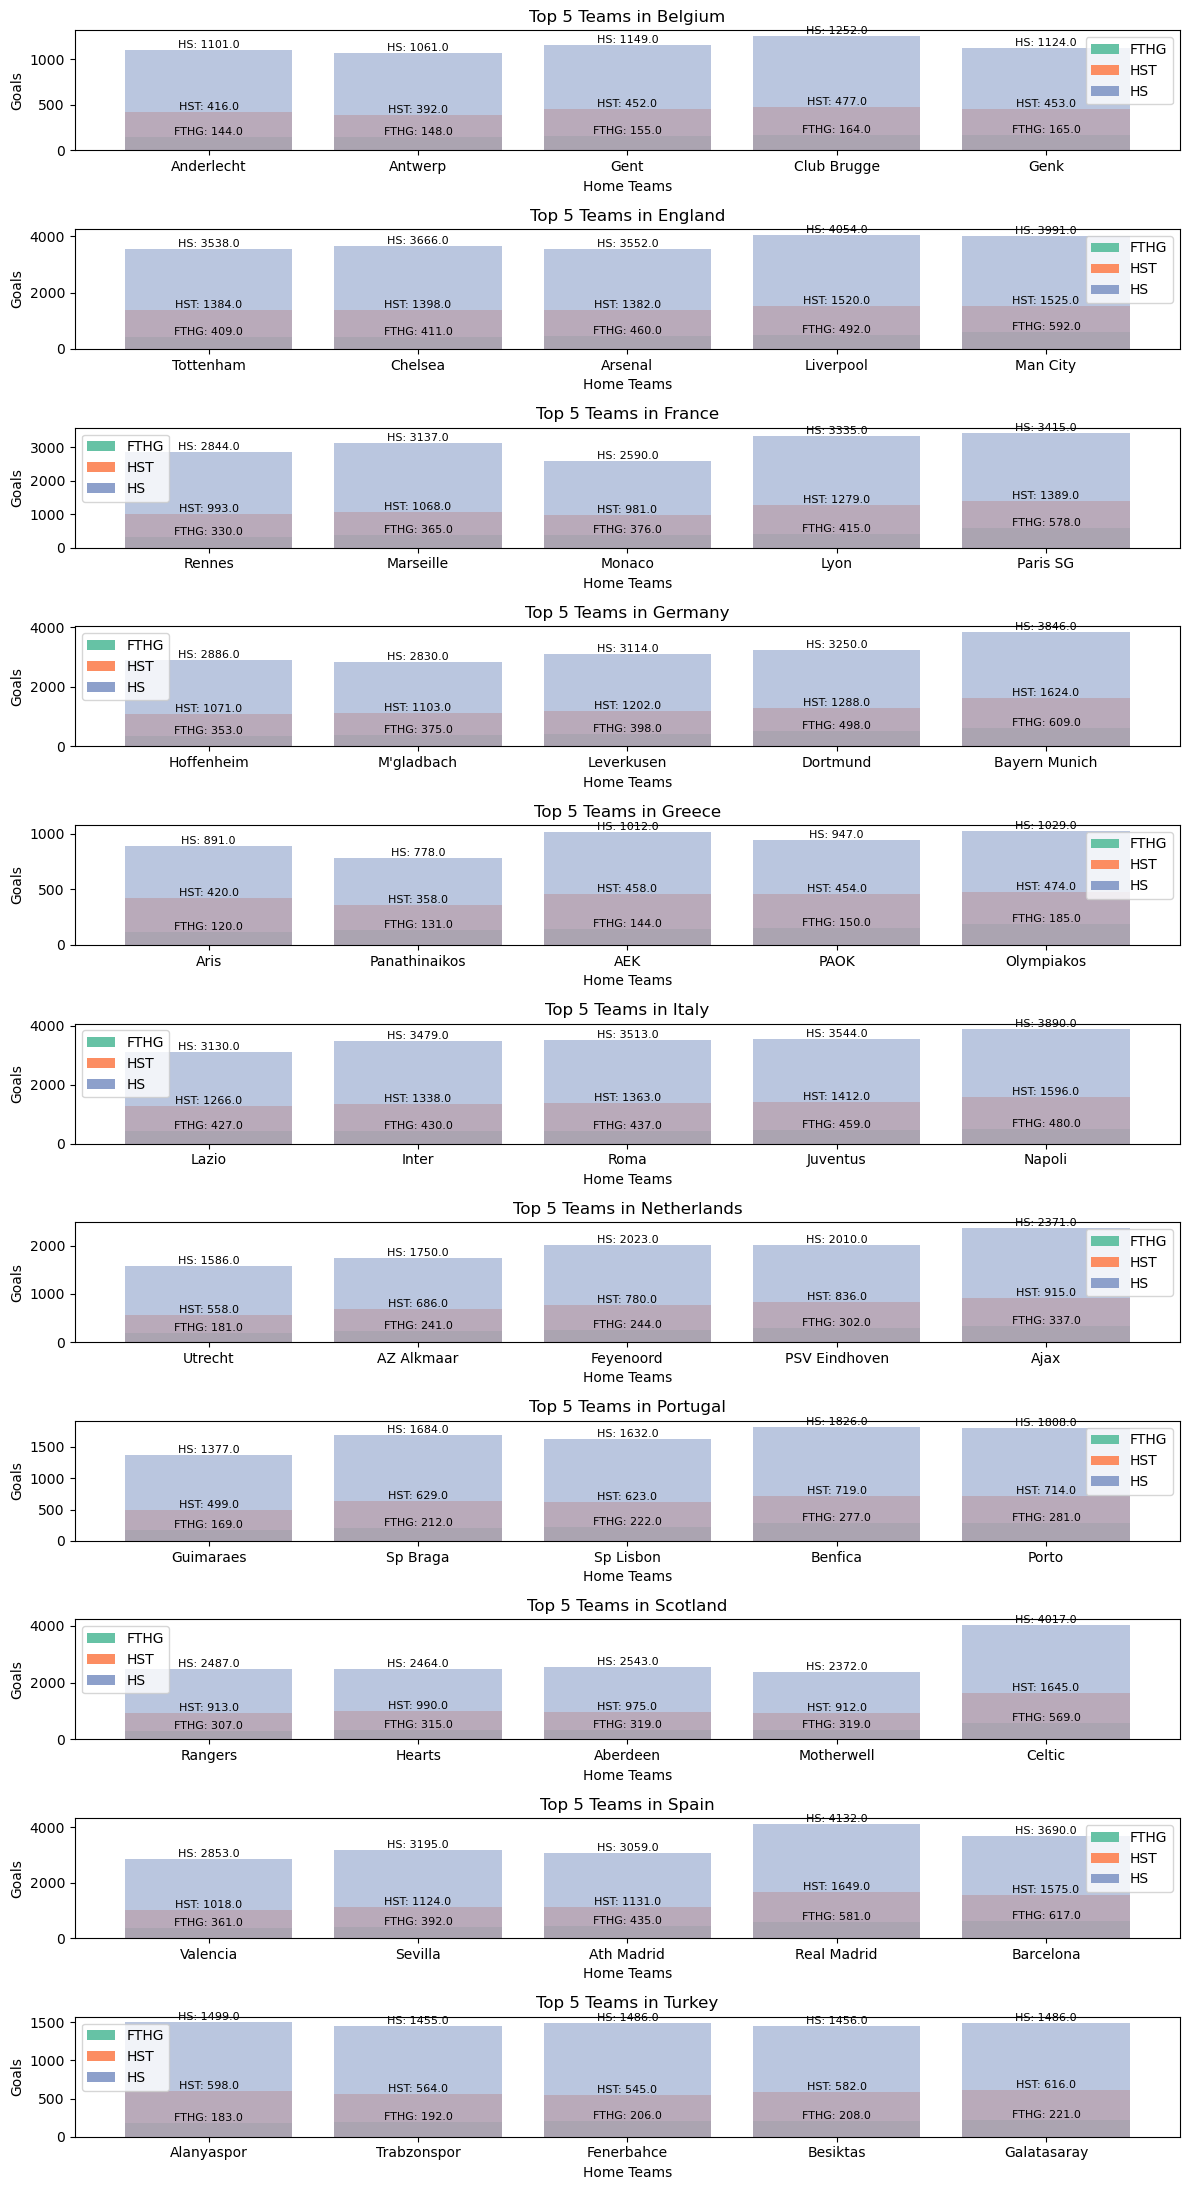

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colormaps


# Group by Country and HomeTeam, calculate sum of FTHG, HST, and HS
country_home_stats = data.groupby(['Country', 'HomeTeam']).agg({'FTHG': 'sum', 'HST': 'sum', 'HS': 'sum'}).reset_index()

# Define a function to get top 5 teams per country with sub-columns
def top_5_teams(df):
    top_teams = df.nlargest(5, 'FTHG').sort_values('FTHG')  # Sort top 3 FTHG from left to right
    return top_teams

# Apply the function to each country group
top_5_per_country = country_home_stats.groupby('Country').apply(top_5_teams).reset_index(drop=True)

# Plotting
fig, axes = plt.subplots(nrows=len(top_5_per_country['Country'].unique()), ncols=1, figsize=(12, 22))

# Define a colormap with distinct colors for each statistic
cmap = plt.get_cmap('Set2')

for idx, (country, group) in enumerate(top_5_per_country.groupby('Country')):
    ax = axes[idx]
    ax.set_title(f"Top 5 Teams in {country}")
    ax.set_ylabel("Goals")
    ax.set_xlabel("Home Teams")
    
    # Iterate over each statistic and assign a distinct color from the colormap
    for i, (stat, color) in enumerate(zip(['FTHG', 'HST', 'HS'], cmap.colors)):
        for team, value in zip(group['HomeTeam'], group[stat]):
            bars = ax.bar(team, value, label=stat, color=color, alpha=0.6)
            # Add total FTHG beside each bar
            ax.text(team, value, f'{stat}: {value}', ha='center', va='bottom', fontsize=8, color='black')
    
    # Create legend with custom colors matching the bars
    legend_labels = [plt.Rectangle((0,0),1,1,fc=color, edgecolor = 'none') for color in cmap.colors]
    ax.legend(legend_labels, ['FTHG', 'HST', 'HS'])

plt.tight_layout()
# Menyimpan plot di direktori spesifik dengan path lengkap
#plt.savefig(r'C:\Users\Alfredo\Downloads\top_5_teams_plot.png', format='png', dpi=300)
plt.show()


<h3><h2>Top 5 team per country FTAG-HST-AS based on FTAG</h2></h3>

C:\Users\Alfredo\AppData\Local\Temp\ipykernel_29104\3591196060.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_5_per_country = country_home_stats.groupby('Country').apply(top_5_teams).reset_index(drop=True)


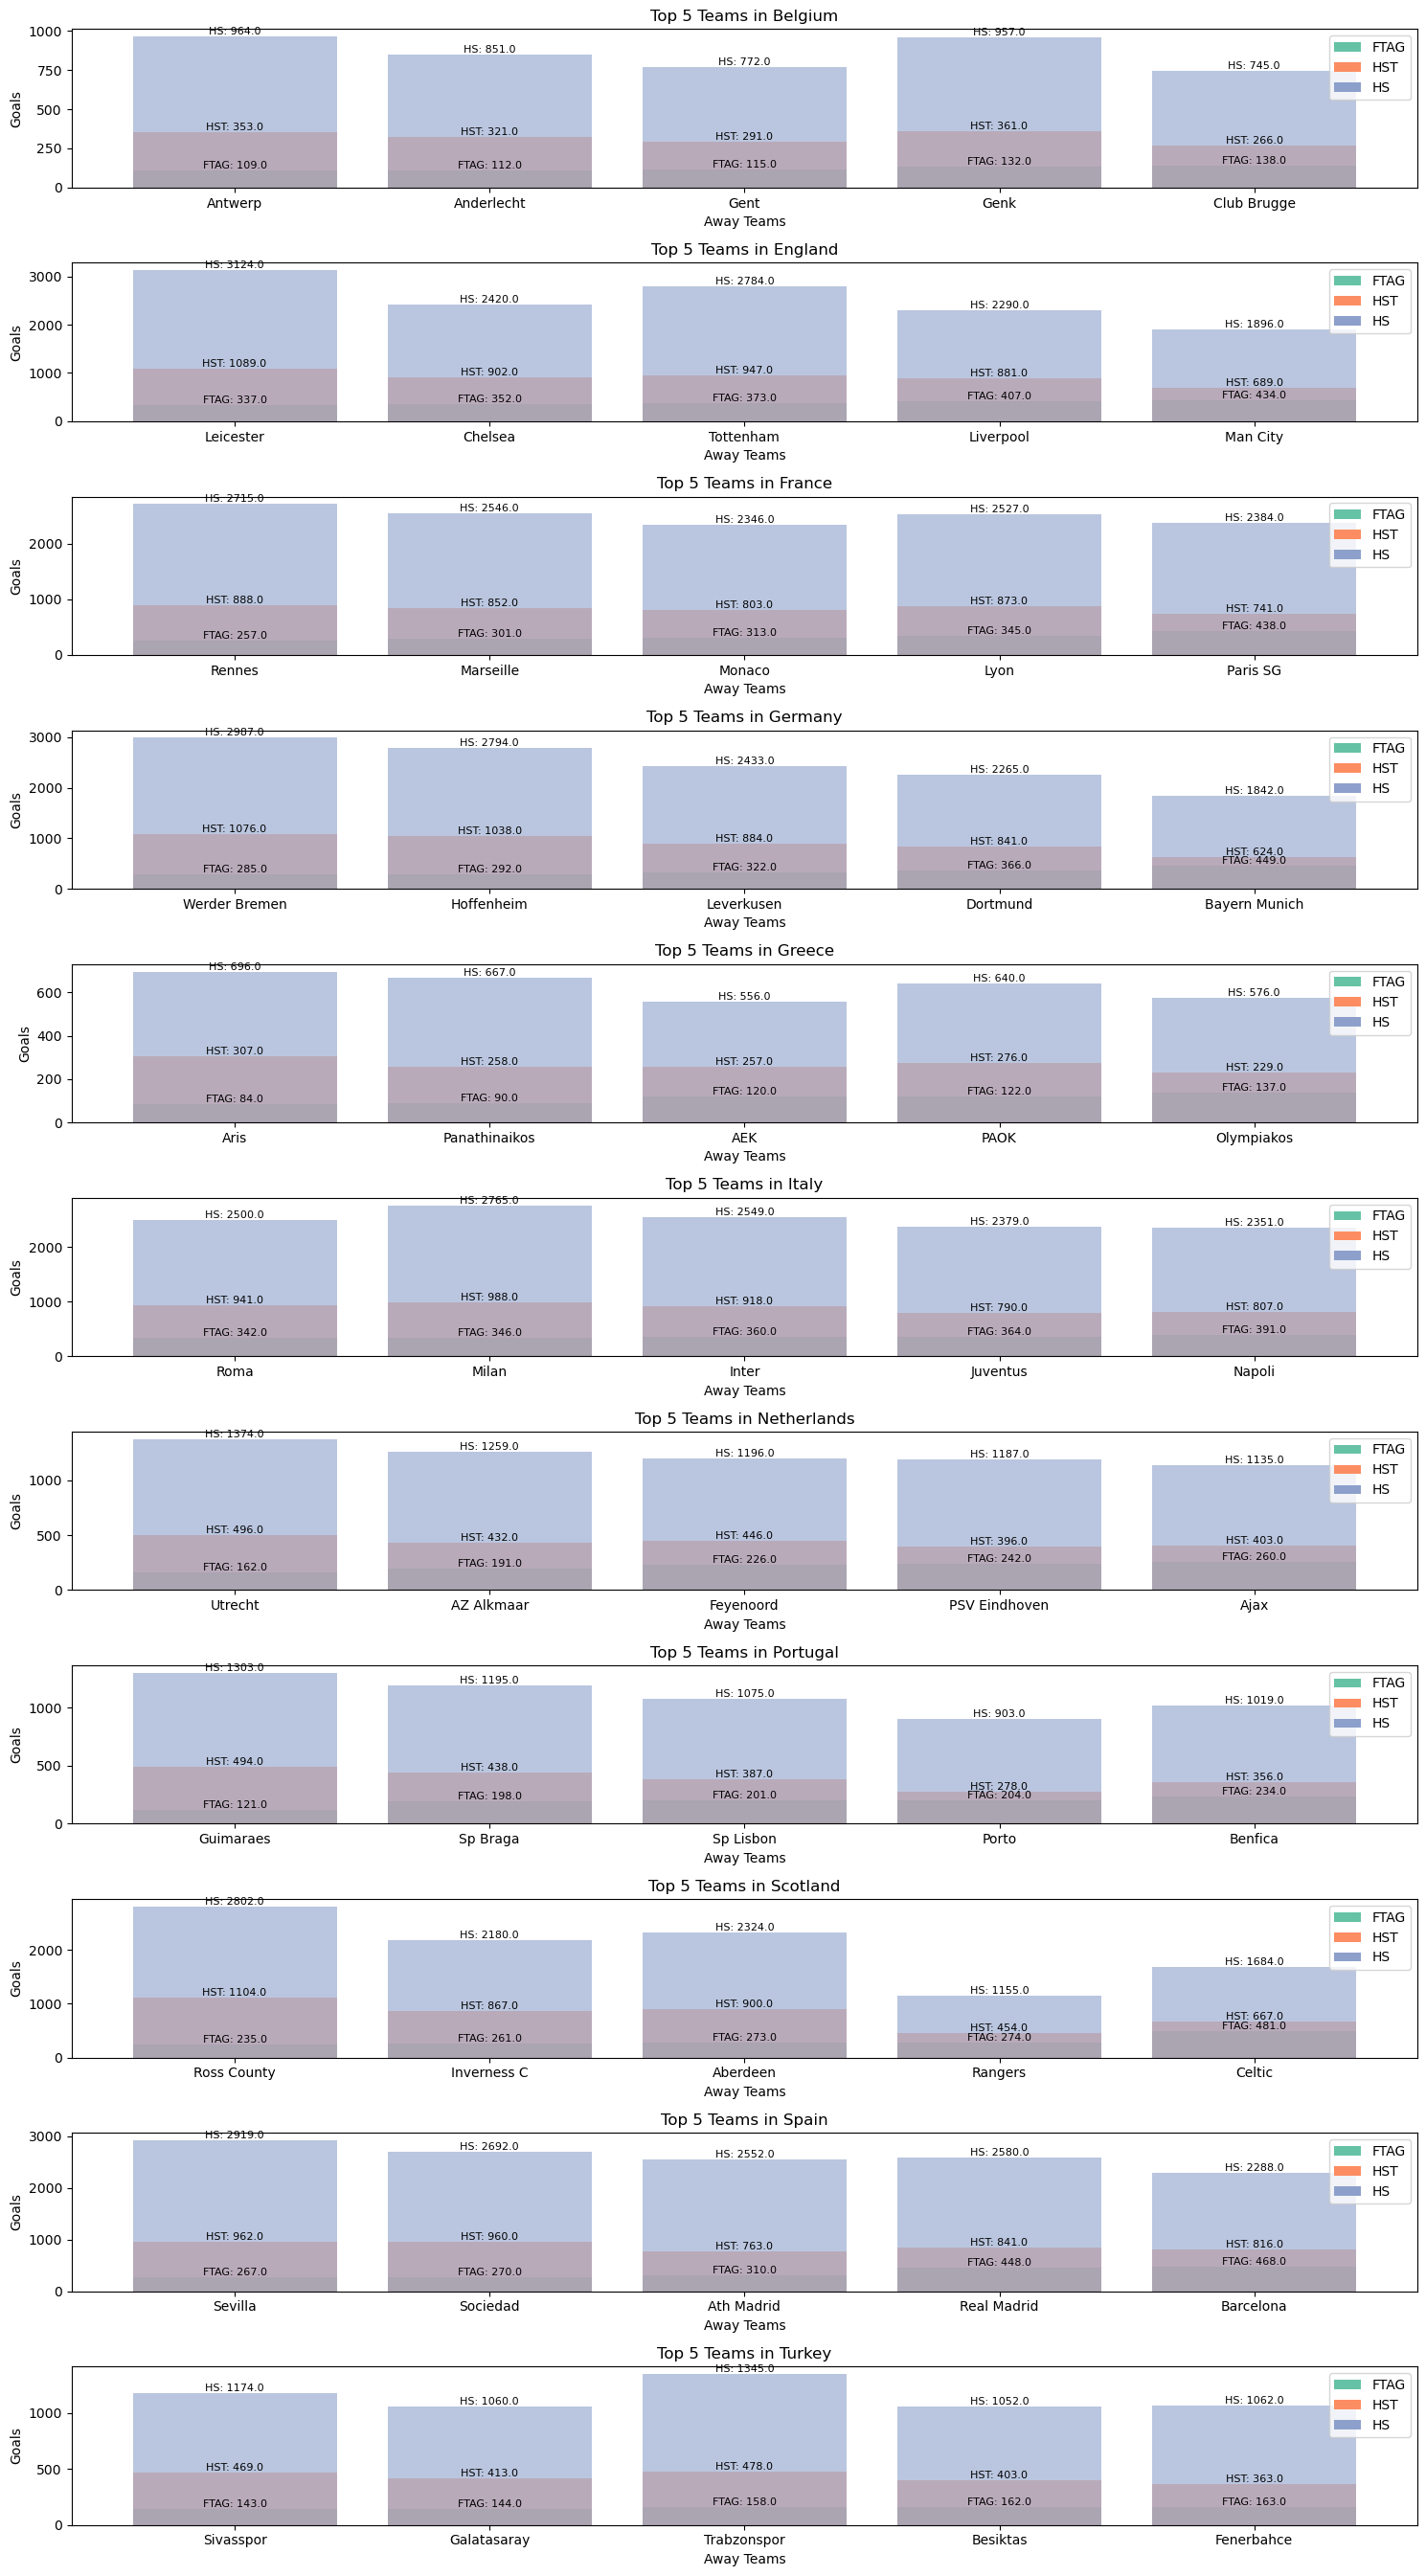

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colormaps

# Group by Country and HomeTeam, calculate sum of FTHG, HST, and HS
country_home_stats = data.groupby(['Country', 'AwayTeam']).agg({'FTAG': 'sum', 'HST': 'sum', 'HS': 'sum'}).reset_index()

# Define a function to get top 5 teams per country with sub-columns
def top_5_teams(df):
    top_teams = df.nlargest(5, 'FTAG').sort_values('FTAG')  # Sort top 3 FTAG from left to right
    return top_teams

# Apply the function to each country group
top_5_per_country = country_home_stats.groupby('Country').apply(top_5_teams).reset_index(drop=True)

# Plotting
fig, axes = plt.subplots(nrows=len(top_5_per_country['Country'].unique()), ncols=1, figsize=(15, 27))

# Define a colormap with distinct colors for each statistic
cmap = plt.get_cmap('Set2')

for idx, (country, group) in enumerate(top_5_per_country.groupby('Country')):
    ax = axes[idx]
    ax.set_title(f"Top 5 Teams in {country}")
    ax.set_ylabel("Goals")
    ax.set_xlabel("Away Teams")
    
    # Iterate over each statistic and assign a distinct color from the colormap
    for i, (stat, color) in enumerate(zip(['FTAG', 'HST', 'HS'], cmap.colors)):
        for team, value in zip(group['AwayTeam'], group[stat]):
            bars = ax.bar(team, value, label=stat, color=color, alpha=0.6)
            # Add total FTHG beside each bar
            ax.text(team, value, f'{stat}: {value}', ha='center', va='bottom', fontsize=8, color='black')
    
    # Create legend with custom colors matching the bars
    legend_labels = [plt.Rectangle((0,0),1,1,fc=color, edgecolor = 'none') for color in cmap.colors]
    ax.legend(legend_labels, ['FTAG', 'HST', 'HS'])

plt.tight_layout()
#plt.savefig(r'C:\Users\Alfredo\Downloads\top_5_teams_plotFTAG.png', format='png', dpi=300)
plt.show()


<h1>MACHINE LEARNING TIMEEEE</h1>

In [61]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_recall_curve, auc, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import LearningCurveDisplay,learning_curve


In [62]:
#DATA DEFINE
features = ['RTLM', 'RTLG', 'RTHG', 'RTAG', 'CALG', 'AGSH', 'AGSA', 'RALG' ] 

target1 = 'H'

target_columns = ['FHR', 'FTR', 'H', 'D', 'A', 'H1',  'D1', 'A1', 'FHTG', 'FTTG', 'FHHG', 'FHAG', 'FTHG', 'FTAG', 
                  'BTTS', 'BTTS1','BTTS2','BTTS3', 'BTTS_D','BTTS_ND', 'CS', 'CS1', 'CS2']


meta = ['1st half result', 'full-time result', 
 'home', 'draw', 'away', 'home 1st half', 'draw 1st half', 'away 1st half', 
 '1st half total goals', 'full-time total goals', '1st half home goals', '1st half away goals', 'full-time home goals', 'full-time away goals',
 'both teams to score (full-time)', 'both teams to score (1st half)', 'both teams to score (2nd half)', 'both teams to score (both halves)',
 'both teams to score & draw', 'both teams to score & no draw', 'clean sheets (full-time)', 'clean sheets (1st half)', 'clean sheets (2nd half)']

meta = dict(zip(target_columns, meta))

In [63]:
#TRAINING DATA
b1 = ['2012-2013', '2013-2014', '2014-2015', '2015-2016', '2016-2017', '2017-2018','2018-2019', '2019-2020', '2020-2021']
b2 = ['2021-2022','2022-2023','2023-2024']
print('Seasons in splits:\n')

# train 1
train = data.loc[data['Season'].isin(b1),:] #.copy()
print(list(train['Season'].unique()))


# test
test = data.loc[data['Season'].isin(b2),:] #.copy()
print(list(test['Season'].unique()))

# X_train1, X_test1, X_train2, X_test2, y_train, y_test
x_train = train[features]
y_train = train[target_columns]
x_test = test[features]
y_test = test[target_columns]

# # Alternative split
# # Split data into train/est - 92%/8%

# # train data
# train = data.loc[data['Season'] !='2023-2024',:] #.copy()

# # test data
# test = data.loc[data['Season'] =='2023-2024',:] #.copy()

# # X_train, X_test, y_train, y_test
# X_train = train[features]
# y_train = train[target_columns]
# X_test = test[features]
# y_test = test[target_columns]

# Hitung jumlah baris pada setiap set
num_train = len(train)
num_test = len(test)
total = len(data)

# Hitung persentase
percent_train = (num_train / total) * 100
percent_test = (num_test / total) * 100

print(f"Jumlah data train: {num_train} ({percent_train:.2f}%)")
print(f"Jumlah data test: {num_test} ({percent_test:.2f}%)")

Seasons in splits:

['2012-2013', '2013-2014', '2014-2015', '2015-2016', '2016-2017', '2017-2018', '2018-2019', '2019-2020', '2020-2021']
['2021-2022', '2022-2023', '2023-2024']
Jumlah data train: 33870 (70.53%)
Jumlah data test: 14150 (29.47%)


In [64]:
#  model results table
results_df = pd.DataFrame(columns=['Target', 'Model', 'Accuracy'], )

<h3>naive bayes</h3>

Accuracy: 0.56
              precision    recall  f1-score   support

           0       0.56      1.00      0.72      7982
           1       1.00      0.00      0.00      6168

    accuracy                           0.56     14150
   macro avg       0.78      0.50      0.36     14150
weighted avg       0.75      0.56      0.41     14150

CPU times: total: 359 ms
Wall time: 377 ms


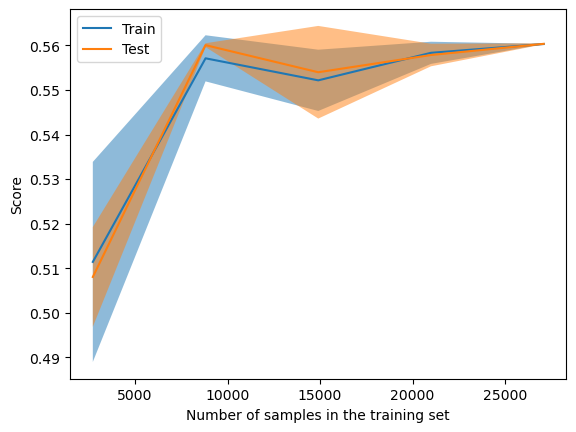

In [66]:
%%time

# create function that trains GaussianNB
def naive_bayes_classifier(target,x_train, y_train, x_test, y_test, params={}, learning_curve=False):
    """Returns trained model, predictions, accuracy in this order.
    Input:
    Xtrain - train data
    ytrain - train target
    Xtest - test data
    ytest - test target
    params - parameters, default = False
    learning_curve - visualization, default = False"""
    
    # Initialize the model
    if len(params) == 0:
        model = GaussianNB()
    else:
        model = GaussianNB(**params)
        
    # Fit the model
    model.fit(x_train, y_train[target])
    
    # Predict
    predictions = model.predict(x_test)
    
    
    # Evaluate
    accuracy = accuracy_score(y_test[target], predictions)
    print(f"Accuracy: {accuracy:.2f}")
    
    # Classification report
    report = classification_report(y_test[target], predictions, zero_division=1, output_dict=True)
    print(classification_report(y_test[target], predictions, zero_division=1))
    
    if learning_curve:
        LearningCurveDisplay.from_estimator(model, x_train, y_train[target])
   
    return model, predictions, accuracy
    #return model, predictions, accuracy, report

# TESTING MODEL
test_model, pred, accu = naive_bayes_classifier(target1, x_train, y_train, x_test, y_test, learning_curve=True)
#test_model, pred, accu, report = naive_bayes_classifier(target1, x_train, y_train, x_test, y_test, learning_curve=True)

# Convert report to DataFrame
#report_df = pd.DataFrame(report).transpose()

# Menyimpan ke Excel di lokasi yang diinginkan
#file_path = "C:/Users/Alfredo/Downloads/classification_report.xlsx"
#report_df.to_excel(file_path, index=True)

#print(f"File saved to {file_path}")


[Text(0.5, 135.7222222222222, 'False Positive Rate'),
 Text(1058.0517676767674, 0.5, 'True Positive Rate')]

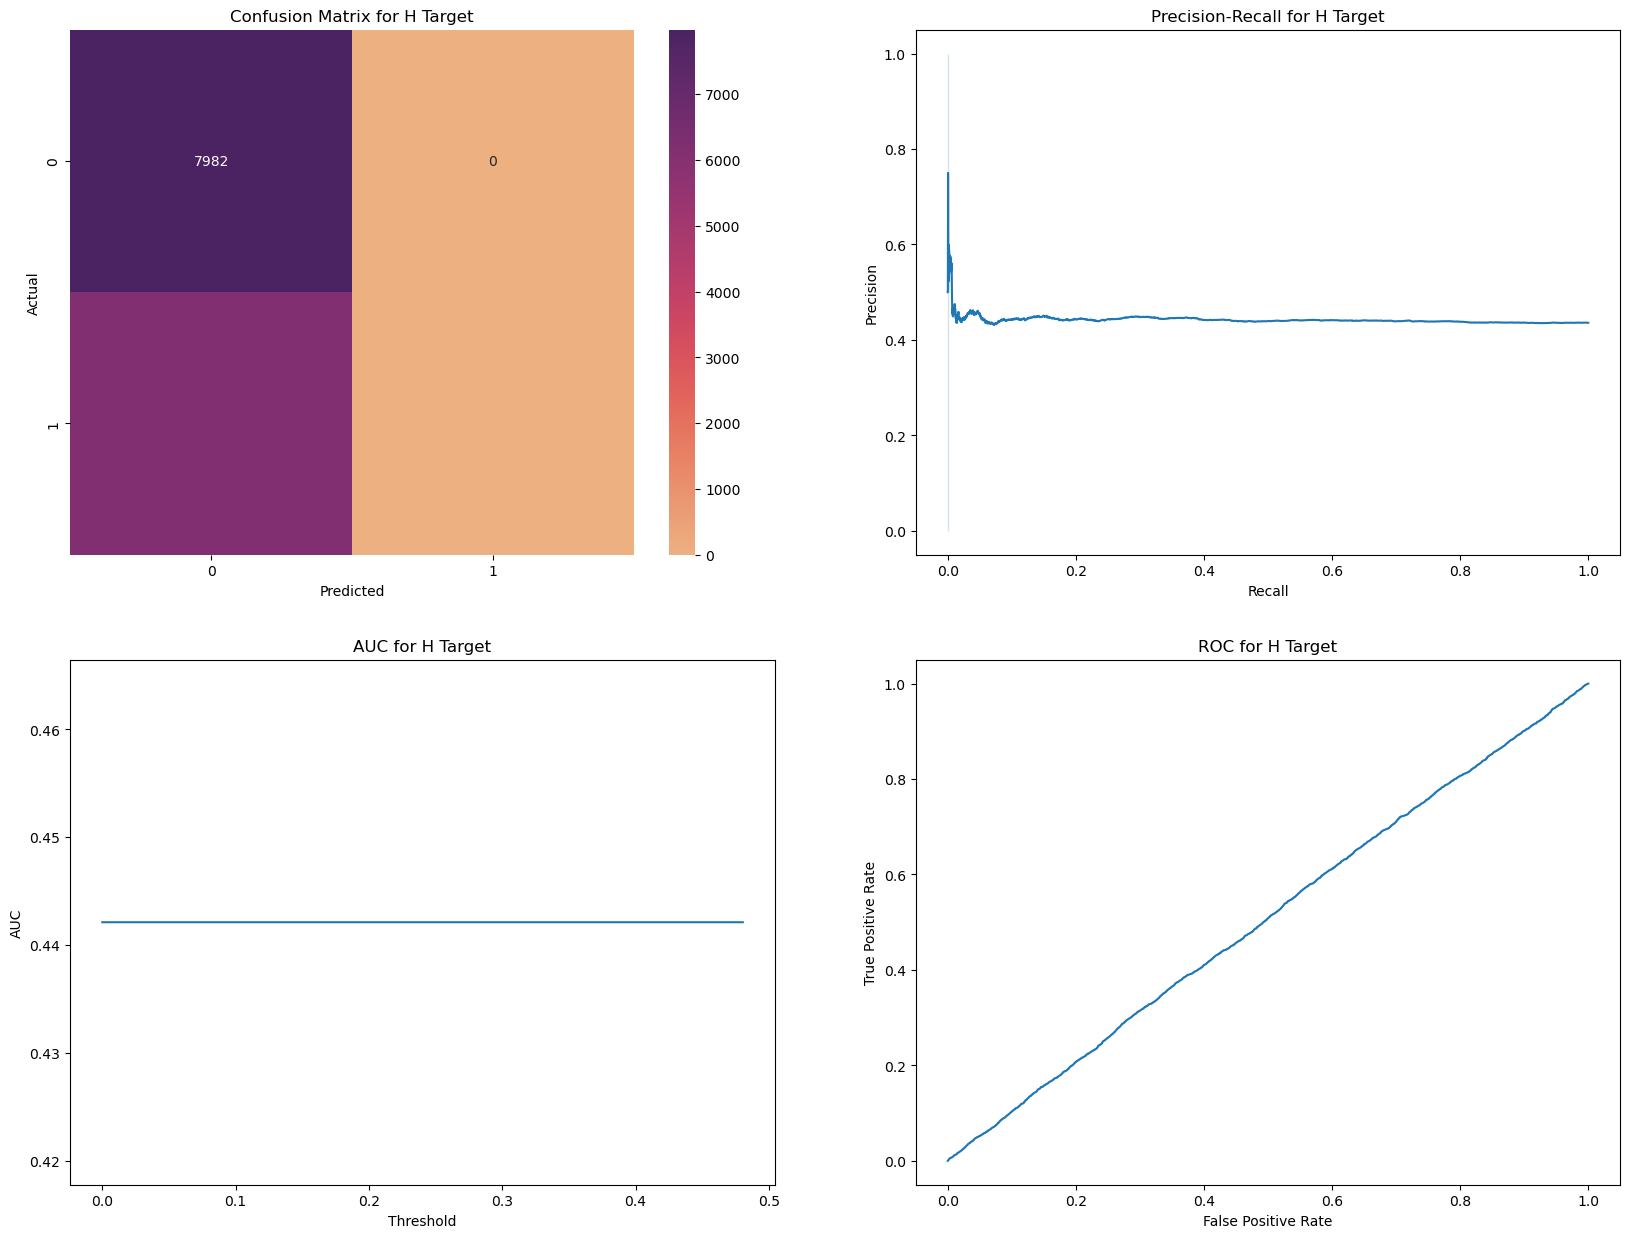

In [67]:
#  precision_recall_curve,
precision, recall, thresholds = precision_recall_curve(y_test[target1], test_model.predict_proba(x_test)[:, 1])

# area_under_curve
area_under_curve = auc(recall, precision)

# roc_curve
roc_fpr, roc_tpr, _ = roc_curve(y_test[target1], test_model.predict_proba(x_test)[:, 1])

# confusion_matrix
cm = confusion_matrix(y_test[target1], test_model.predict(x_test))

fig, ax = plt.subplots( 2, 2, figsize=(20, 15))

cmv = sns.heatmap(cm, annot=True, fmt='d', cmap='flare', ax=ax[0,0]).set(title=f"Confusion Matrix for {target1} Target")
ax[0,0].set(xlabel='Predicted',ylabel= 'Actual')

# plot precision-recall curve
pr = sns.lineplot(x=recall, y=precision, ax=ax[0, 1])
pr.set_title(f"Precision-Recall for {target1} Target")
ax[0,1].set(xlabel='Recall', ylabel='Precision')

# plot auc
aucu = sns.lineplot(x=thresholds, y=area_under_curve, ax=ax[1, 0])
aucu.set_title(f"AUC for {target1} Target")
ax[1,0].set(xlabel='Threshold', ylabel='AUC')

# plot roc
rocc = sns.lineplot(x=roc_fpr, y=roc_tpr, ax=ax[1,1])
rocc.set_title(f"ROC for {target1} Target")
ax[1,1].set(xlabel='False Positive Rate', ylabel='True Positive Rate')


In [68]:
%%time

# train model for each target
name = 'GaussianNB'
for target in meta.keys():
    print('\n>>>>>',target, ':', meta[target],'<<<<<\n')
    mode, pred, accu = naive_bayes_classifier(target, x_train, y_train, x_test, y_test)
    results_df = pd.concat([results_df, pd.DataFrame([[target, name, accu]], columns=results_df.columns)], ignore_index=True)


>>>>> FHR : 1st half result <<<<<

Accuracy: 0.41
              precision    recall  f1-score   support

           A       0.21      0.01      0.02      3508
           D       0.42      0.93      0.58      5894
           H       0.35      0.06      0.10      4748

    accuracy                           0.41     14150
   macro avg       0.33      0.34      0.23     14150
weighted avg       0.35      0.41      0.28     14150


>>>>> FTR : full-time result <<<<<

Accuracy: 0.43
              precision    recall  f1-score   support

           A       0.31      0.08      0.13      4282
           D       1.00      0.00      0.00      3700
           H       0.44      0.92      0.59      6168

    accuracy                           0.43     14150
   macro avg       0.58      0.33      0.24     14150
weighted avg       0.55      0.43      0.30     14150


>>>>> H : home <<<<<

Accuracy: 0.56
              precision    recall  f1-score   support

           0       0.56      1.00      0.7

Text(0.5, 1.0, 'Accuracy Distribution')

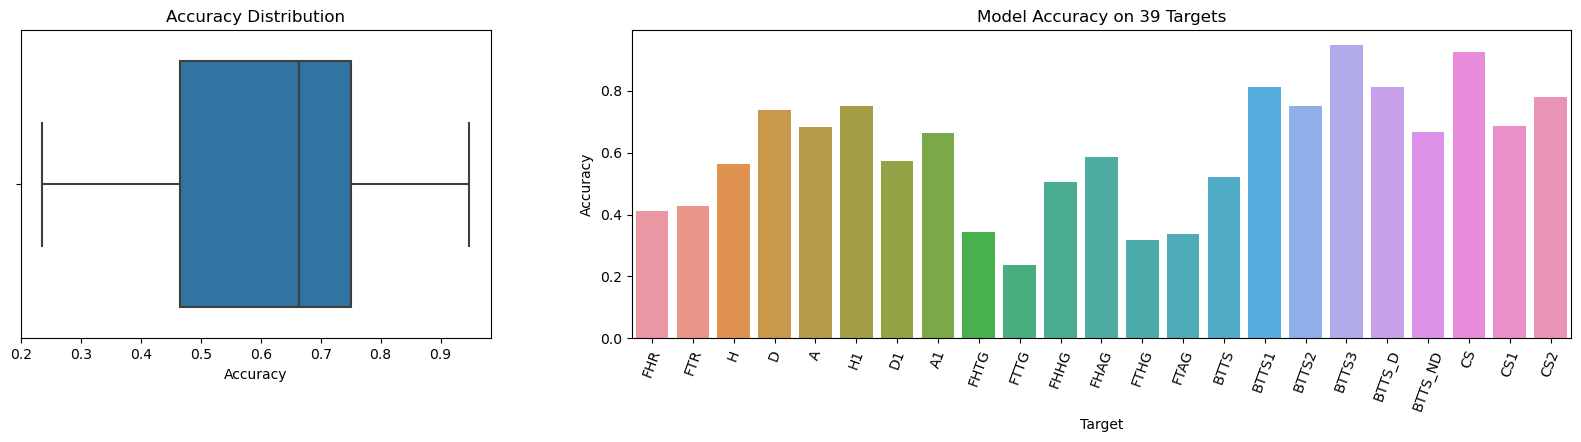

In [69]:
# Visualize
fig, axes = plt.subplots(figsize=(20, 4), nrows=1, ncols=2, width_ratios=[1, 2])
d = sns.barplot(data=results_df.query('Model == "GaussianNB"'), x='Target', y='Accuracy', hue=None, ax=axes[1],)
d.set_xticklabels(d.get_xticklabels(),rotation=70)
d.set_title('Model Accuracy on 39 Targets')
sns.boxplot(data=results_df.query('Model == "GaussianNB"'), x='Accuracy', ax=axes[0]).set_title('Accuracy Distribution')

Accuracy: 0.92
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     13086
           1       1.00      0.00      0.00      1064

    accuracy                           0.92     14150
   macro avg       0.96      0.50      0.48     14150
weighted avg       0.93      0.92      0.89     14150
 

    Actual  Predicted
0        0          0
1        0          0
2        0          0
3        0          0
4        0          0
5        0          0
6        0          0
7        0          0
8        0          0
9        0          0
10       0          0
11       0          0
12       1          0
13       0          0
14       0          0
15       0          0
16       0          0
17       0          0
18       0          0
19       0          0
20       0          0
21       0          0
22       0          0
23       0          0
24       0          0
25       0          0
26       0          0
27       0          0
28       0        

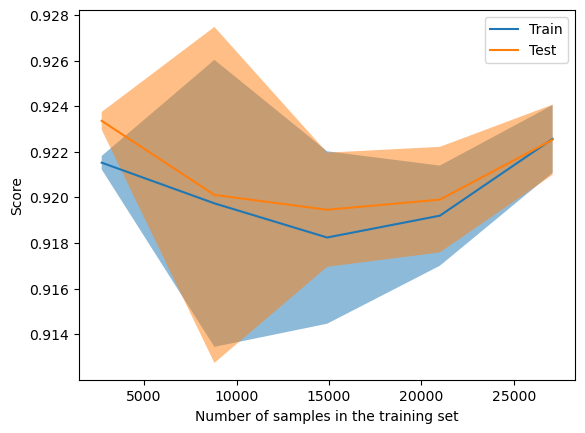

In [70]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Assuming the data is already loaded in `data`

# Features and target as specified
features = ['RTLM', 'RTLG', 'RTHG', 'RTAG', 'CALG', 'AGSH', 'AGSA', 'RALG']
target_ftr = 'CS'



# Train and test split
train = data.loc[data['Season'].isin(b1),:] 
test = data.loc[data['Season'].isin(b2),:]

# Features and target split
x_train = train[features]
y_train_ftr = train[target_ftr]
x_test = test[features]
y_test_ftr = test[target_ftr]

# Function to train and evaluate GaussianNB
def naive_bayes_classifier(target, x_train, y_train, x_test, y_test, params={}, learning_curve=False):
    """Returns trained model, predictions, accuracy in this order."""
    
    # Initialize the model
    if len(params) == 0:
        model = GaussianNB()
    else:
        model = GaussianNB(**params)
        
    # Fit the model
    model.fit(x_train, y_train)
    
    # Predict
    predictions = model.predict(x_test)
    
    # Evaluate
    accuracy = accuracy_score(y_test, predictions)
    print(f"Accuracy: {accuracy:.2f}")
    
    # Classification report and confusion matrix
    report = classification_report(y_test, predictions, zero_division=1)
    print(report, '\n')
    
    if learning_curve:
        LearningCurveDisplay.from_estimator(model, x_train, y_train)
   
    return model, predictions, accuracy

# Train and evaluate the model for 'FTR'
model_ftr, pred_ftr, accu_ftr = naive_bayes_classifier(target_ftr, x_train, y_train_ftr, x_test, y_test_ftr, learning_curve=True)

# Create DataFrame to compare predictions with actual values
comparison_df = pd.DataFrame({'Actual': y_test_ftr.reset_index(drop=True), 'Predicted': pred_ftr})
print(comparison_df.head(30))

# Calculate accuracy per HomeTeam per Season
def accuracy_per_team_season(predictions, x_test, y_test, teams, seasons, target):
    accuracy_results = []

    # Reset index for alignment
    y_test = y_test.reset_index(drop=True)
    x_test = x_test.reset_index()

    for season in seasons:
        season_data = x_test[x_test['Season'] == season]
        for team in teams:
            team_data = season_data[season_data['HomeTeam'] == team]
            if not team_data.empty:
                team_indices = team_data.index
                y_true = y_test.loc[team_indices]
                y_pred = predictions[team_indices]
                accuracy = accuracy_score(y_true, y_pred)
                accuracy_results.append({'Season': season, 'HomeTeam': team, 'Accuracy': accuracy})
    
    return pd.DataFrame(accuracy_results)

# Get unique HomeTeams and Seasons
unique_teams = test['HomeTeam'].unique()
unique_seasons = test['Season'].unique()

# Calculate accuracy per HomeTeam per Season for 'FTR'
accuracy_results_ftr = accuracy_per_team_season(pred_ftr, test, y_test_ftr, unique_teams, unique_seasons, target_ftr)

# Display the accuracy results
print(accuracy_results_ftr)


<h3>KNN</h3>

Accuracy: 0.51
              precision    recall  f1-score   support

           0       0.56      0.61      0.59      7982
           1       0.43      0.38      0.40      6168

    accuracy                           0.51     14150
   macro avg       0.50      0.50      0.50     14150
weighted avg       0.50      0.51      0.51     14150
 

CPU times: total: 23.4 s
Wall time: 23.8 s


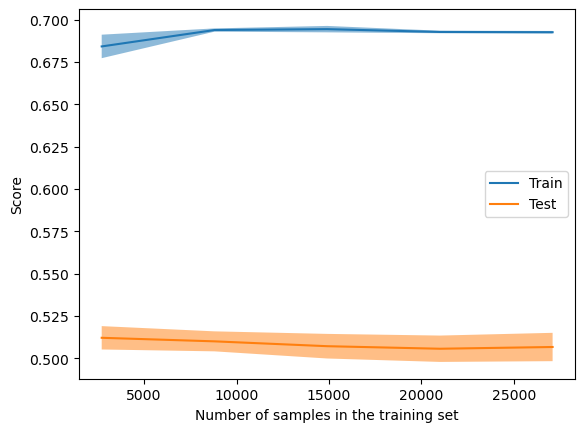

In [72]:
%%time

# create function that trains KNeighborsClassifier
def knn_classifier(target,x_train, y_train, x_test, y_test, params={}, learning_curve=False):
    """Returns trained model, predictions, accuracy in this order.
    Input:
    Xtrain - train data
    ytrain - train target
    Xtest - test data
    ytest - test target
    params - parameters, default = False
    learning_curve - visualization, default = False"""
    
    # Initialize the model
    if params == None:
        model = KNeighborsClassifier()
    else:
        model = KNeighborsClassifier(**params)
        
    # Fit the model
    model.fit(x_train, y_train[target])
    
    # Predict
    predictions = model.predict(x_test)
    
    # Evaluate
    accuracy = accuracy_score(y_test[target], predictions)
    print(f"Accuracy: {accuracy:.2f}")
    
    # Classification report and confusion matrix
    report = classification_report(y_test[target], predictions, zero_division=1)
    print(report, '\n')
    
    if learning_curve == True:
        LearningCurveDisplay.from_estimator(model , x_train, y_train[target])
        
    return model, predictions, accuracy

# TESTING MODEL
# knn_params = {'algorithm' : 'auto', # all: auto, ball_tree, kd_tree, brute
#  'leaf_size': 30,
#  'metric': 'minkowski', # all: minkowski, euclidean, manhattan 
#  'metric_params': None, 
#  'n_jobs': None,
#  'n_neighbors': 5,
#  'p': 2,
#  'weights': 'uniform'} # all: uniform, distance

test_model, pred, accu = knn_classifier(target1, x_train, y_train, x_test, y_test, learning_curve=True)


In [73]:
%%time

# train model for each target
name = 'KNeighborsClassifier'
for target in meta.keys():
    print('\n>>>>>',target, ':', meta[target],'<<<<<\n')
    mode, pred, accu = knn_classifier(target, x_train, y_train, x_test, y_test)
    results_df = pd.concat([results_df, pd.DataFrame([[target, name, accu]], columns=results_df.columns)], ignore_index=True)



>>>>> FHR : 1st half result <<<<<

Accuracy: 0.35
              precision    recall  f1-score   support

           A       0.25      0.30      0.27      3508
           D       0.42      0.49      0.45      5894
           H       0.33      0.21      0.26      4748

    accuracy                           0.35     14150
   macro avg       0.33      0.33      0.33     14150
weighted avg       0.35      0.35      0.34     14150
 


>>>>> FTR : full-time result <<<<<

Accuracy: 0.34
              precision    recall  f1-score   support

           A       0.30      0.38      0.34      4282
           D       0.26      0.22      0.24      3700
           H       0.43      0.38      0.40      6168

    accuracy                           0.34     14150
   macro avg       0.33      0.33      0.33     14150
weighted avg       0.35      0.34      0.34     14150
 


>>>>> H : home <<<<<

Accuracy: 0.51
              precision    recall  f1-score   support

           0       0.56      0.61     

[Text(0.5, 135.7222222222222, 'False Positive Rate'),
 Text(1058.0517676767674, 0.5, 'True Positive Rate')]

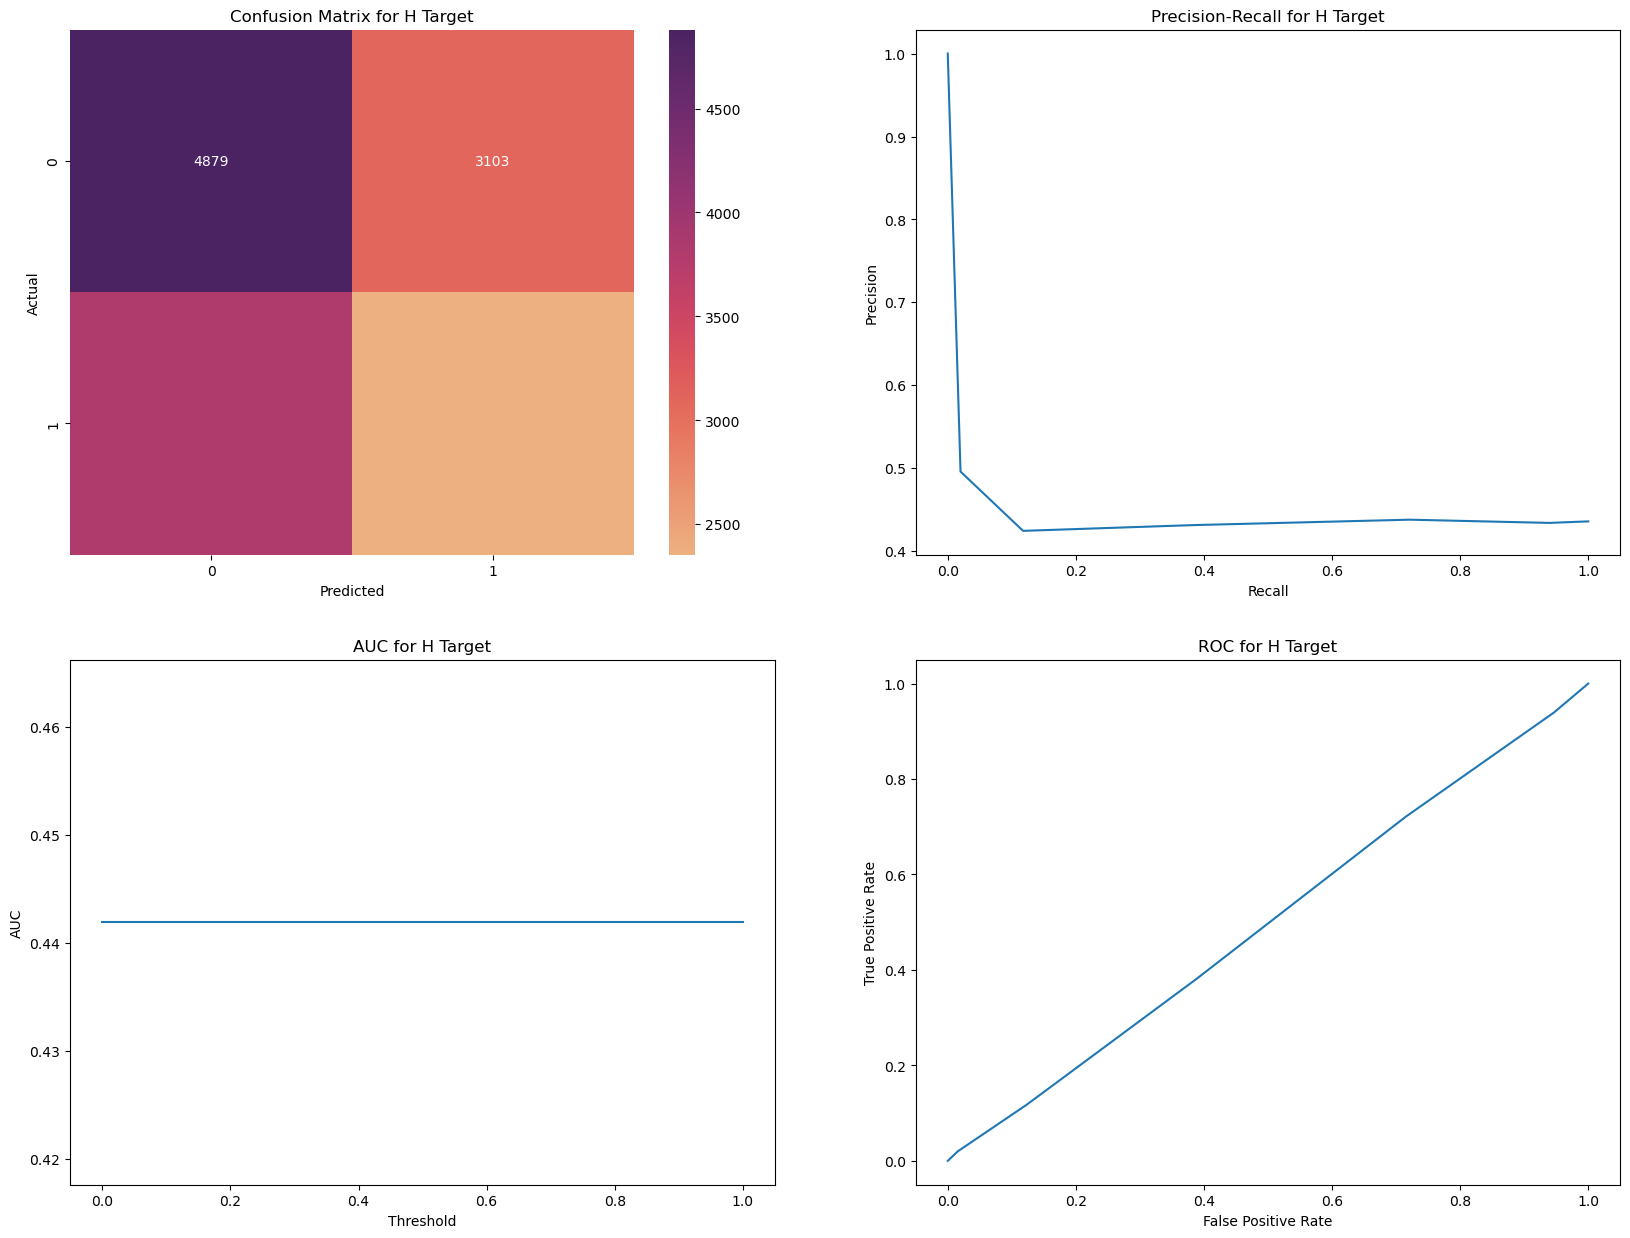

In [74]:
#  precision_recall_curve,

precision, recall, thresholds = precision_recall_curve(y_test[target1], test_model.predict_proba(x_test)[:, 1])

# area_under_curve
area_under_curve = auc(recall, precision)

# roc_curve
roc_fpr, roc_tpr, _ = roc_curve(y_test[target1], test_model.predict_proba(x_test)[:, 1])

# confusion_matrix
cm = confusion_matrix(y_test[target1], test_model.predict(x_test))

fig, ax = plt.subplots( 2, 2, figsize=(20, 15))

cmv = sns.heatmap(cm, annot=True, fmt='d', cmap='flare', ax=ax[0,0]).set(title=f"Confusion Matrix for {target1} Target")
ax[0,0].set(xlabel='Predicted',ylabel= 'Actual')

# plot precision-recall curve
pr = sns.lineplot(x=recall, y=precision, ax=ax[0, 1])
pr.set_title(f"Precision-Recall for {target1} Target")
ax[0,1].set(xlabel='Recall', ylabel='Precision')

# plot auc
aucu = sns.lineplot(x=thresholds, y=area_under_curve, ax=ax[1, 0])
aucu.set_title(f"AUC for {target1} Target")
ax[1,0].set(xlabel='Threshold', ylabel='AUC')

# plot roc
rocc = sns.lineplot(x=roc_fpr, y=roc_tpr, ax=ax[1,1])
rocc.set_title(f"ROC for {target1} Target")
ax[1,1].set(xlabel='False Positive Rate', ylabel='True Positive Rate')

Text(0.5, 1.0, 'Accuracy Distribution')

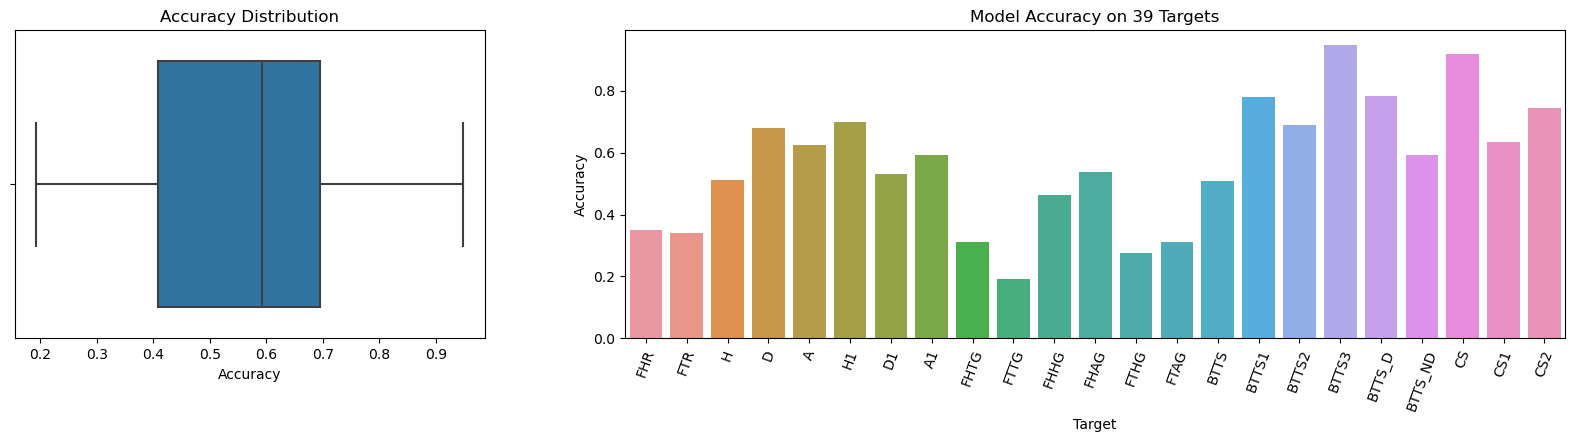

In [75]:
# Visualize
fig, axes = plt.subplots(figsize=(20, 4), nrows=1, ncols=2, width_ratios=[1, 2])
d = sns.barplot(data=results_df.query('Model == "KNeighborsClassifier"'), x='Target', y='Accuracy', hue=None, ax=axes[1],)
d.set_xticklabels(d.get_xticklabels(),rotation=70)
d.set_title('Model Accuracy on 39 Targets')
sns.boxplot(data=results_df.query('Model == "KNeighborsClassifier"'), x='Accuracy', ax=axes[0]).set_title('Accuracy Distribution')


Accuracy: 0.35
              precision    recall  f1-score   support

           A       0.31      0.39      0.34      4282
           D       0.26      0.24      0.25      3700
           H       0.44      0.38      0.41      6168

    accuracy                           0.35     14150
   macro avg       0.34      0.34      0.33     14150
weighted avg       0.35      0.35      0.35     14150
 

   Actual Predicted
0       H         D
1       H         A
2       A         A
3       H         H
4       H         H
5       H         A
6       H         H
7       A         A
8       A         A
9       H         D
10      H         D
11      H         A
12      D         A
13      D         A
14      H         D
15      H         A
16      D         D
17      A         A
18      A         A
19      H         H
20      H         A
21      D         D
22      A         A
23      D         A
24      A         A
25      D         D
26      D         D
27      D         D
28      H         D
29

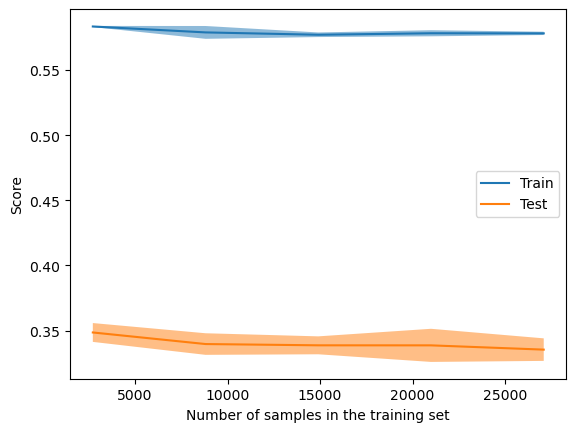

In [76]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

# Assuming the data is already loaded in `data`

# Features and target as specified
features = ['RTLM', 'RTLG', 'RTHG', 'RTAG', 'CALG', 'AGSH', 'AGSA', 'RALG']
target_ftr = 'FTR'



# Train and test split
train = data.loc[data['Season'].isin(b1), :] 
test = data.loc[data['Season'].isin(b2), :]

# Features and target split
x_train = train[features]
y_train_ftr = train[target_ftr]
x_test = test[features]
y_test_ftr = test[target_ftr]

# Scale the data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Function to train and evaluate KNN
def knn_classifier(target, x_train, y_train, x_test, y_test, params={}, learning_curve=False):
    """Returns trained model, predictions, accuracy in this order."""
    
    # Initialize the model
    if len(params) == 0:
        model = KNeighborsClassifier(n_neighbors=5)  # Default to 5 neighbors
    else:
        model = KNeighborsClassifier(**params)
        
    # Fit the model
    model.fit(x_train, y_train)
    
    # Predict
    predictions = model.predict(x_test)
    
    # Evaluate
    accuracy = accuracy_score(y_test, predictions)
    print(f"Accuracy: {accuracy:.2f}")
    
    # Classification report
    report = classification_report(y_test, predictions, zero_division=1)
    print(report, '\n')
    
    if learning_curve:
        LearningCurveDisplay.from_estimator(model, x_train, y_train)
   
    return model, predictions, accuracy

# Train and evaluate the model for 'FTR'
model_ftr_knn, pred_ftr_knn, accu_ftr_knn = knn_classifier(target_ftr, x_train_scaled, y_train_ftr, x_test_scaled, y_test_ftr, learning_curve=True)

# Create DataFrame to compare predictions with actual values
comparison_df_knn = pd.DataFrame({'Actual': y_test_ftr.reset_index(drop=True), 'Predicted': pred_ftr_knn})
print(comparison_df_knn.head(30))  # Print first 30 comparisons

# Calculate accuracy per HomeTeam per Season
def accuracy_per_team_season(predictions, x_test, y_test, teams, seasons, target):
    accuracy_results = []

    # Reset index for alignment
    y_test = y_test.reset_index(drop=True)
    x_test = x_test.reset_index()

    for season in seasons:
        season_data = x_test[x_test['Season'] == season]
        for team in teams:
            team_data = season_data[season_data['HomeTeam'] == team]
            if not team_data.empty:
                team_indices = team_data.index
                y_true = y_test.loc[team_indices]
                y_pred = predictions[team_indices]
                accuracy = accuracy_score(y_true, y_pred)
                accuracy_results.append({'Season': season, 'HomeTeam': team, 'Accuracy': accuracy})
    
    return pd.DataFrame(accuracy_results)

# Get unique HomeTeams and Seasons
unique_teams = test['HomeTeam'].unique()
unique_seasons = test['Season'].unique()

# Calculate accuracy per HomeTeam per Season for 'FTR'
accuracy_results_ftr_knn = accuracy_per_team_season(pred_ftr_knn, test, y_test_ftr, unique_teams, unique_seasons, target_ftr)

# Display the accuracy results
print(accuracy_results_ftr_knn)


<h3>Decision tree classifier</h3>

Accuracy: 0.51
              precision    recall  f1-score   support

           0       0.56      0.55      0.56      7982
           1       0.44      0.44      0.44      6168

    accuracy                           0.51     14150
   macro avg       0.50      0.50      0.50     14150
weighted avg       0.51      0.51      0.51     14150
 

CPU times: total: 6.91 s
Wall time: 7 s


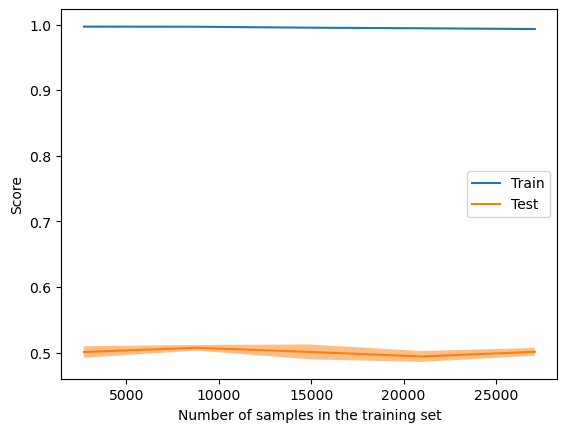

In [78]:
%%time

# create function that trains Decision Tree Classifier
def decision_tree_classifier(target,x_train, y_train, x_test, y_test, params={}, learning_curve=False):
    """Returns trained model, predictions, accuracy in this order.
    Input:
    Xtrain - train data
    ytrain - train target
    Xtest - test data
    ytest - test target
    params - parameters, default = False
    learning_curve - visualization, default = False"""
    
    # Initialize the model
    if len(params) == 0:
        model = DecisionTreeClassifier(random_state=22)
    else:
        model = DecisionTreeClassifier(**params)
        
    # Fit the model
    model.fit(x_train, y_train[target])
    
    # Predict
    predictions = model.predict(x_test)
    
    # Evaluate
    accuracy = accuracy_score(y_test[target], predictions)
    print(f"Accuracy: {accuracy:.2f}")
    
    # Classification report and confusion matrix
    report = classification_report(y_test[target], predictions, zero_division=1)
    print(report, '\n')
    
    if learning_curve == True:
        LearningCurveDisplay.from_estimator(model , x_train, y_train[target])
        
    return model, predictions, accuracy

# TESTING MODEL

params = {
    'criterion': 'gini',# entropy
    'max_depth': 10,
    'min_samples_split': 20,
    'min_samples_leaf': 5
}

test_model, pred, accu = decision_tree_classifier(target1, x_train, y_train, x_test, y_test, learning_curve=True)



[Text(0.5, 135.7222222222222, 'False Positive Rate'),
 Text(1058.0517676767674, 0.5, 'True Positive Rate')]

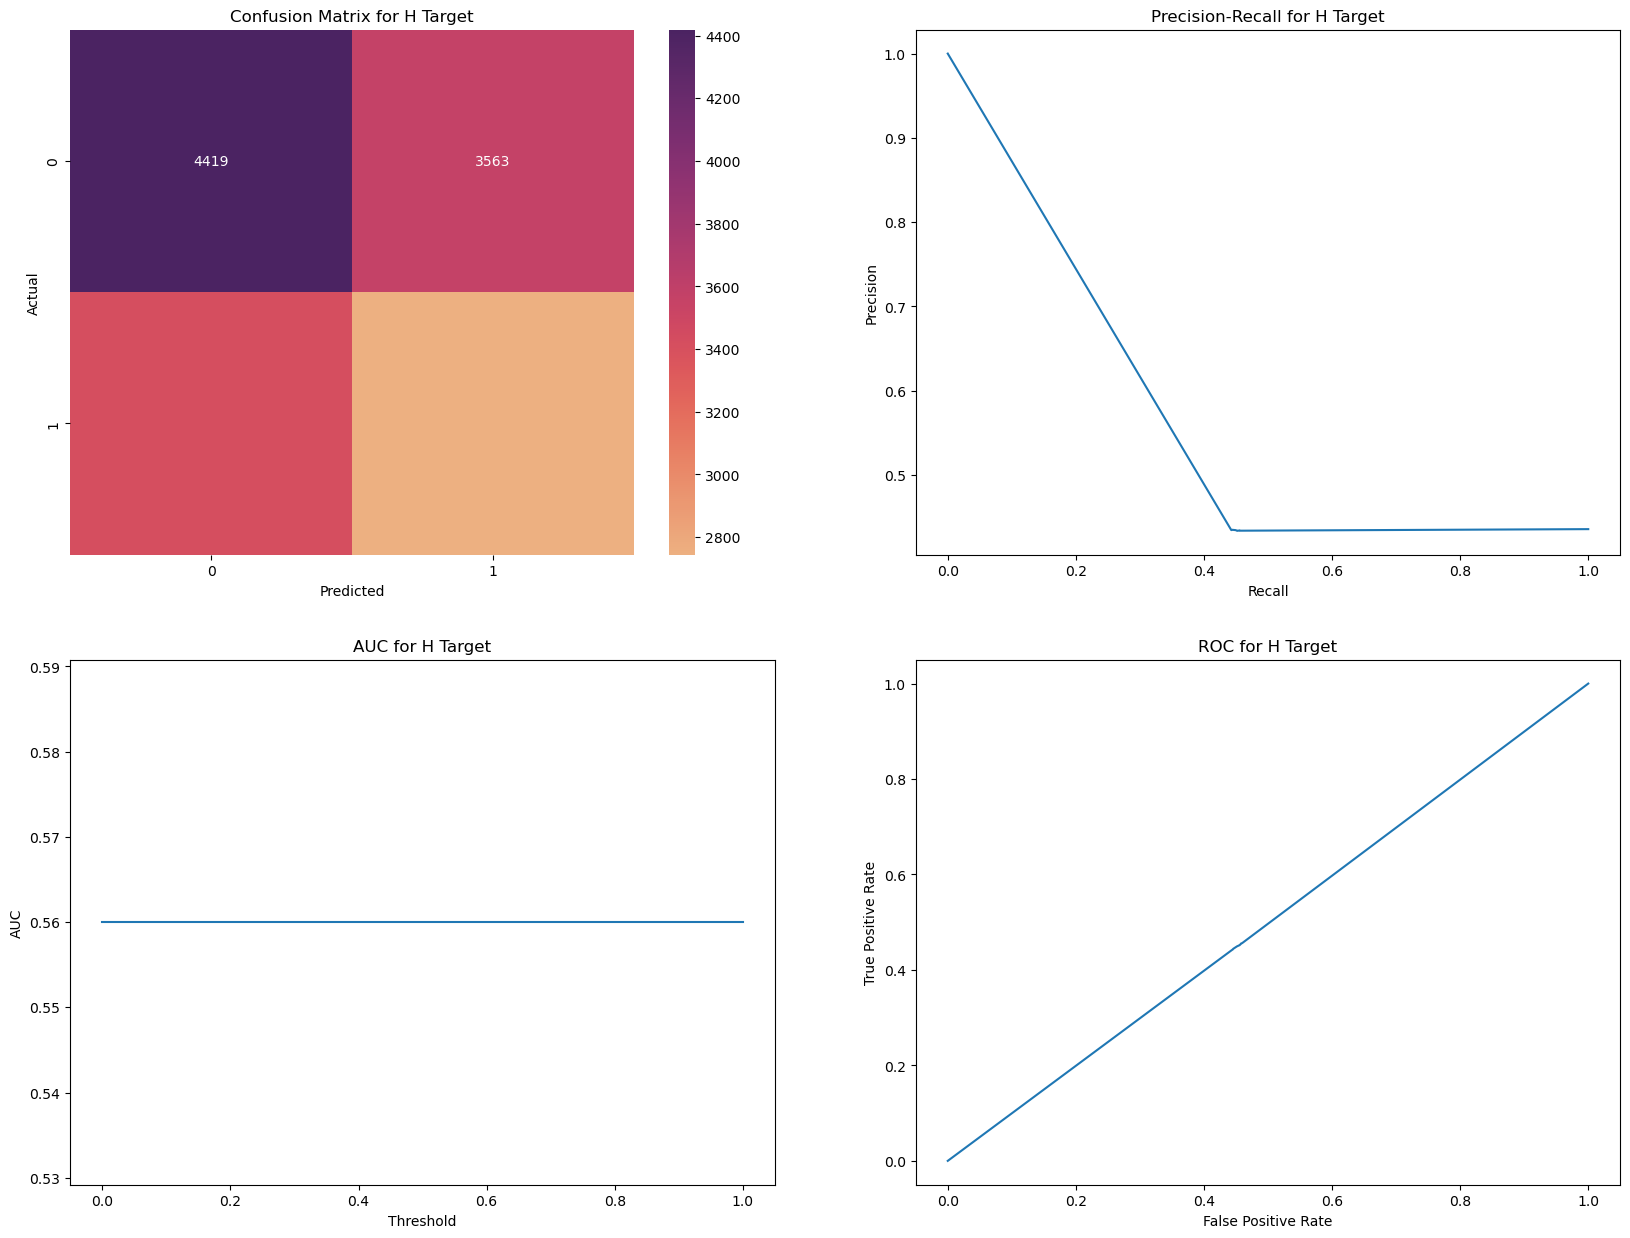

In [79]:
# get the feature importance # dict(zip(test_model.feature_name_, test_model.feature_importances_))
fi = pd.DataFrame({"features" : test_model.feature_names_in_, "importance" : test_model.feature_importances_})

#  precision_recall_curve,
precision, recall, thresholds = precision_recall_curve(y_test[target1], test_model.predict_proba(x_test)[:, 1])

# area_under_curve
area_under_curve = auc(recall, precision)

# roc_curve
roc_fpr, roc_tpr, _ = roc_curve(y_test[target1], test_model.predict_proba(x_test)[:, 1])

# confusion_matrix
cm = confusion_matrix(y_test[target1], test_model.predict(x_test))

fig, ax = plt.subplots( 2, 2, figsize=(20, 15))

cmv = sns.heatmap(cm, annot=True, fmt='d', cmap='flare', ax=ax[0,0]).set(title=f"Confusion Matrix for {target1} Target")
ax[0,0].set(xlabel='Predicted',ylabel= 'Actual')

# plot precision-recall curve
pr = sns.lineplot(x=recall, y=precision, ax=ax[0, 1])
pr.set_title(f"Precision-Recall for {target1} Target")
ax[0,1].set(xlabel='Recall', ylabel='Precision')

# plot auc
aucu = sns.lineplot(x=thresholds, y=area_under_curve, ax=ax[1, 0])
aucu.set_title(f"AUC for {target1} Target")
ax[1,0].set(xlabel='Threshold', ylabel='AUC')

# plot roc
rocc = sns.lineplot(x=roc_fpr, y=roc_tpr, ax=ax[1,1])
rocc.set_title(f"ROC for {target1} Target")
ax[1,1].set(xlabel='False Positive Rate', ylabel='True Positive Rate')


Zero Importance Features:
 [] 

Top Importance Features:
 ['AGSH', 'AGSA']


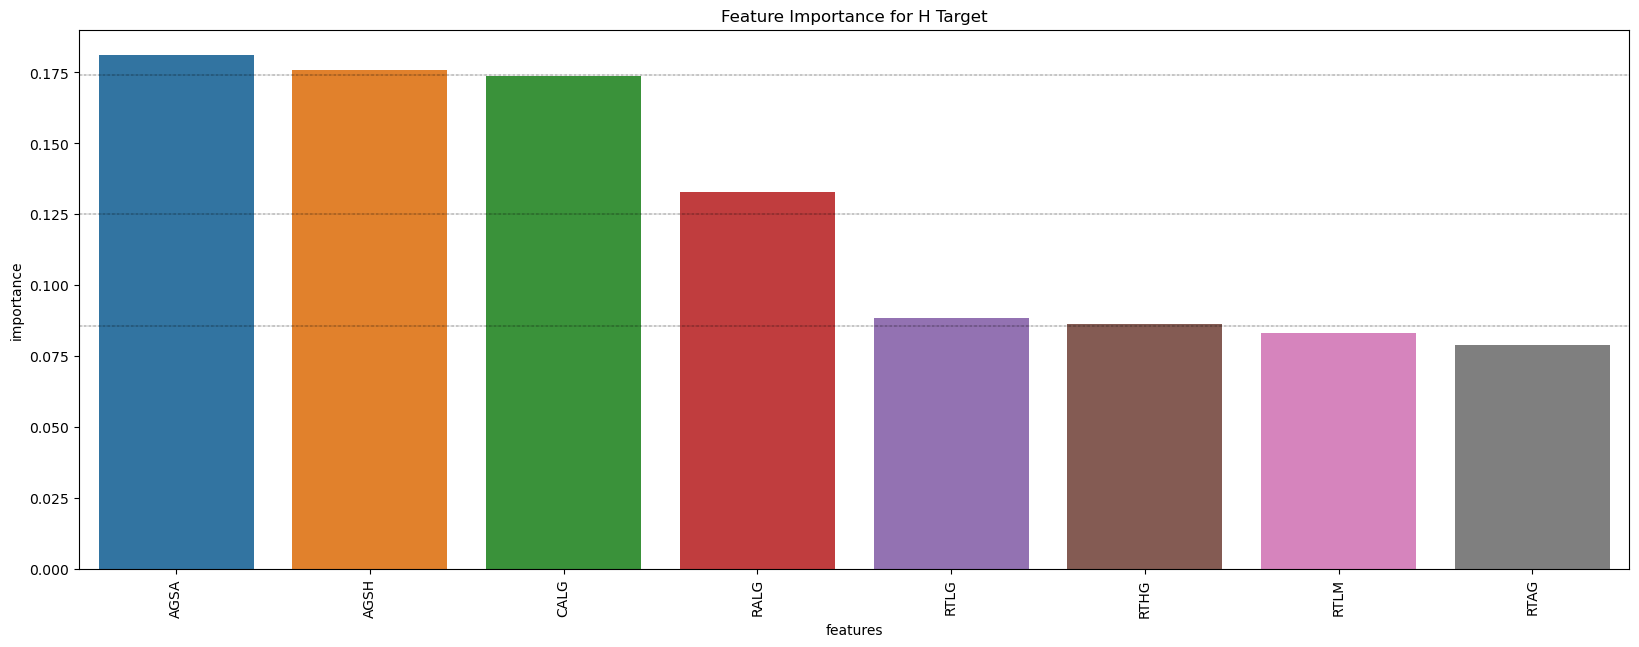

In [80]:
# plot fi
fiv = sns.barplot(data=fi, x="features", y="importance", order=fi.sort_values("importance", ascending=False).features)
fiv.set_xticklabels(fiv.get_xticklabels(), rotation=90)
fiv.set_title(f"Feature Importance for {target1} Target")

#add horizontal line
fiv.axhline(y=fi['importance'].mean(), color='black', linestyle='dashdot', linewidth=.32)
fiv.axhline(y=fi['importance'].quantile(.75), color='black', linestyle='dashdot', linewidth=.32)
fiv.axhline(y=fi['importance'].quantile(.25), color='black', linestyle='dashdot', linewidth=.32)

#set plot width
fiv.figure.set_size_inches(20, 7)
# rotate x labels

print('Zero Importance Features:\n', list(fi[fi['importance'] == 0]['features'].unique()),'\n')
print('Top Importance Features:\n', list(fi[fi['importance'] > fi['importance'].quantile(.75)]['features'].unique()))

In [81]:
%%time

# train model for each target
name = 'DecisionTreeClassifier'
for target in meta.keys():
    print('\n>>>>>',target, ':', meta[target],'<<<<<\n')
    mode, pred, accu = decision_tree_classifier(target, x_train, y_train, x_test, y_test)
    results_df = pd.concat([results_df, pd.DataFrame([[target, name, accu]], columns=results_df.columns)], ignore_index=True)


>>>>> FHR : 1st half result <<<<<

Accuracy: 0.34
              precision    recall  f1-score   support

           A       0.25      0.28      0.27      3508
           D       0.41      0.39      0.40      5894
           H       0.34      0.34      0.34      4748

    accuracy                           0.34     14150
   macro avg       0.33      0.33      0.33     14150
weighted avg       0.35      0.34      0.35     14150
 


>>>>> FTR : full-time result <<<<<

Accuracy: 0.35
              precision    recall  f1-score   support

           A       0.31      0.34      0.32      4282
           D       0.27      0.26      0.26      3700
           H       0.44      0.41      0.42      6168

    accuracy                           0.35     14150
   macro avg       0.34      0.34      0.34     14150
weighted avg       0.35      0.35      0.35     14150
 


>>>>> H : home <<<<<

Accuracy: 0.51
              precision    recall  f1-score   support

           0       0.56      0.55     

Text(0.5, 1.0, 'Accuracy Distribution')

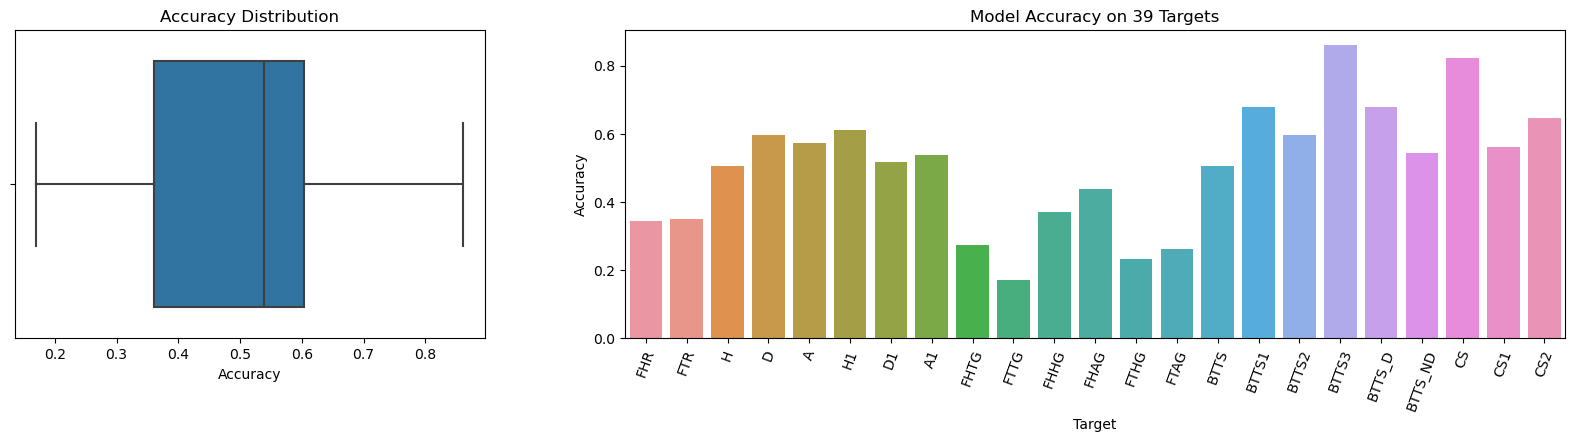

In [82]:
# Visualize
fig, axes = plt.subplots(figsize=(20, 4), nrows=1, ncols=2, width_ratios=[1, 2])
d = sns.barplot(data=results_df.query('Model == "DecisionTreeClassifier"'), x='Target', y='Accuracy', hue=None, ax=axes[1],)
d.set_xticklabels(d.get_xticklabels(),rotation=70)
d.set_title('Model Accuracy on 39 Targets')
sns.boxplot(data=results_df.query('Model == "DecisionTreeClassifier"'), x='Accuracy', ax=axes[0]).set_title('Accuracy Distribution')


Accuracy: 0.35
              precision    recall  f1-score   support

           A       0.30      0.33      0.32      4282
           D       0.27      0.26      0.27      3700
           H       0.44      0.41      0.42      6168

    accuracy                           0.35     14150
   macro avg       0.34      0.34      0.34     14150
weighted avg       0.35      0.35      0.35     14150
 

   Actual Predicted
0       H         H
1       H         A
2       A         A
3       H         H
4       H         H
5       H         A
6       H         A
7       A         A
8       A         A
9       H         H
10      H         A
11      H         A
12      D         A
13      D         A
14      H         D
15      H         A
16      D         H
17      A         A
18      A         D
19      H         H
20      H         A
21      D         H
22      A         A
23      D         A
24      A         A
25      D         A
26      D         D
27      D         A
28      H         A
29

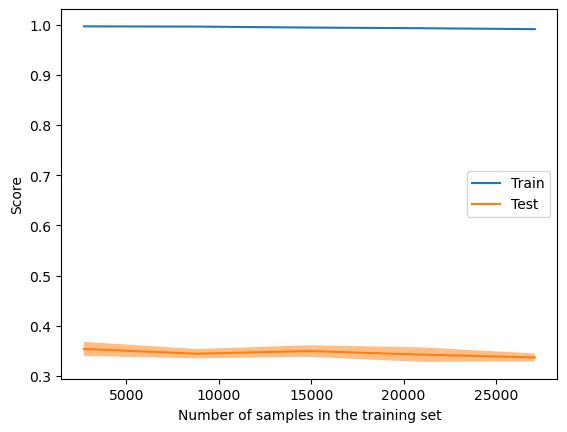

In [83]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

# Assuming the data is already loaded in `data`

# Features and target as specified
features = ['RTLM', 'RTLG', 'RTHG', 'RTAG', 'CALG', 'AGSH', 'AGSA', 'RALG']
target_ftr = 'FTR'



# Train and test split
train = data.loc[data['Season'].isin(b1), :] 
test = data.loc[data['Season'].isin(b2), :]

# Features and target split
x_train = train[features]
y_train_ftr = train[target_ftr]
x_test = test[features]
y_test_ftr = test[target_ftr]

# Scale the data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Function to train and evaluate Decision Tree
def decision_tree_classifier(target, x_train, y_train, x_test, y_test, params={}, learning_curve=False):
    """Returns trained model, predictions, accuracy in this order."""
    
    # Initialize the model
    if len(params) == 0:
        model = DecisionTreeClassifier(random_state=42)
    else:
        model = DecisionTreeClassifier(**params)
        
    # Fit the model
    model.fit(x_train, y_train)
    
    # Predict
    predictions = model.predict(x_test)
    
    # Evaluate
    accuracy = accuracy_score(y_test, predictions)
    print(f"Accuracy: {accuracy:.2f}")
    
    # Classification report
    report = classification_report(y_test, predictions, zero_division=1)
    print(report, '\n')
    
    if learning_curve:
        LearningCurveDisplay.from_estimator(model, x_train, y_train)
   
    return model, predictions, accuracy

# Train and evaluate the model for 'FTR'
model_ftr_dt, pred_ftr_dt, accu_ftr_dt = decision_tree_classifier(target_ftr, x_train_scaled, y_train_ftr, x_test_scaled, y_test_ftr, learning_curve=True)

# Create DataFrame to compare predictions with actual values
comparison_df_dt = pd.DataFrame({'Actual': y_test_ftr.reset_index(drop=True), 'Predicted': pred_ftr_dt})
print(comparison_df_dt.head(30))  # Print first 30 comparisons

# Calculate accuracy per HomeTeam per Season
def accuracy_per_team_season(predictions, x_test, y_test, teams, seasons, target):
    accuracy_results = []

    # Reset index for alignment
    y_test = y_test.reset_index(drop=True)
    x_test = x_test.reset_index()

    for season in seasons:
        season_data = x_test[x_test['Season'] == season]
        for team in teams:
            team_data = season_data[season_data['HomeTeam'] == team]
            if not team_data.empty:
                team_indices = team_data.index
                y_true = y_test.loc[team_indices]
                y_pred = predictions[team_indices]
                accuracy = accuracy_score(y_true, y_pred)
                accuracy_results.append({'Season': season, 'HomeTeam': team, 'Accuracy': accuracy})
    
    return pd.DataFrame(accuracy_results)

# Get unique HomeTeams and Seasons
unique_teams = test['HomeTeam'].unique()
unique_seasons = test['Season'].unique()

# Calculate accuracy per HomeTeam per Season for 'FTR'
accuracy_results_ftr_dt = accuracy_per_team_season(pred_ftr_dt, test, y_test_ftr, unique_teams, unique_seasons, target_ftr)

# Display the accuracy results
print(accuracy_results_ftr_dt)


<h3>logistic regression</h3>

Accuracy: 0.56
              precision    recall  f1-score   support

           0       0.56      1.00      0.72      7982
           1       0.40      0.00      0.00      6168

    accuracy                           0.56     14150
   macro avg       0.48      0.50      0.36     14150
weighted avg       0.49      0.56      0.41     14150
 

CPU times: total: 625 ms
Wall time: 654 ms


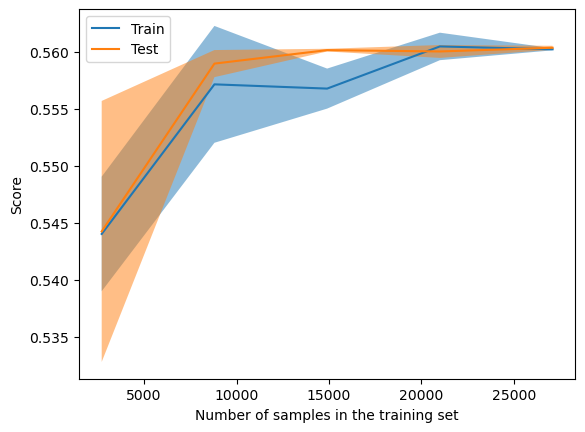

In [85]:
%%time

# create function that trains Logistic Regression
def logistic_regression(target,x_train, y_train, x_test, y_test, params={}, learning_curve=False):
    """Returns trained model, predictions, accuracy in this order.
    Input:
    Xtrain - train data
    ytrain - train target
    Xtest - test data
    ytest - test target
    params - parameters, default = False
    learning_curve - visualization, default = False"""
    
    # Initialize the model
    if params == None:
        model = make_pipeline(StandardScaler(), LogisticRegression(random_state=42, max_iter=2000))
    else:
        model = make_pipeline(StandardScaler(), LogisticRegression(random_state=42, max_iter=2000, **params))

    # Fit the model
    model.fit(x_train, y_train[target])
    
    # Predict
    predictions = model.predict(x_test)
    
    # Evaluate
    accuracy = accuracy_score(y_test[target], predictions)
    print(f"Accuracy: {accuracy:.2f}")
    
    # Classification report and confusion matrix
    report = classification_report(y_test[target], predictions, zero_division=1)
    print(report, '\n')
    
    if learning_curve == True:
        LearningCurveDisplay.from_estimator(model , x_train, y_train[target])
        
    return model, predictions, accuracy

# TESTING MODEL

param_grid_logreg = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

test_model, pred, accu = logistic_regression(target1, x_train, y_train, x_test, y_test, learning_curve=True)

[Text(0.5, 135.7222222222222, 'False Positive Rate'),
 Text(1058.0517676767674, 0.5, 'True Positive Rate')]

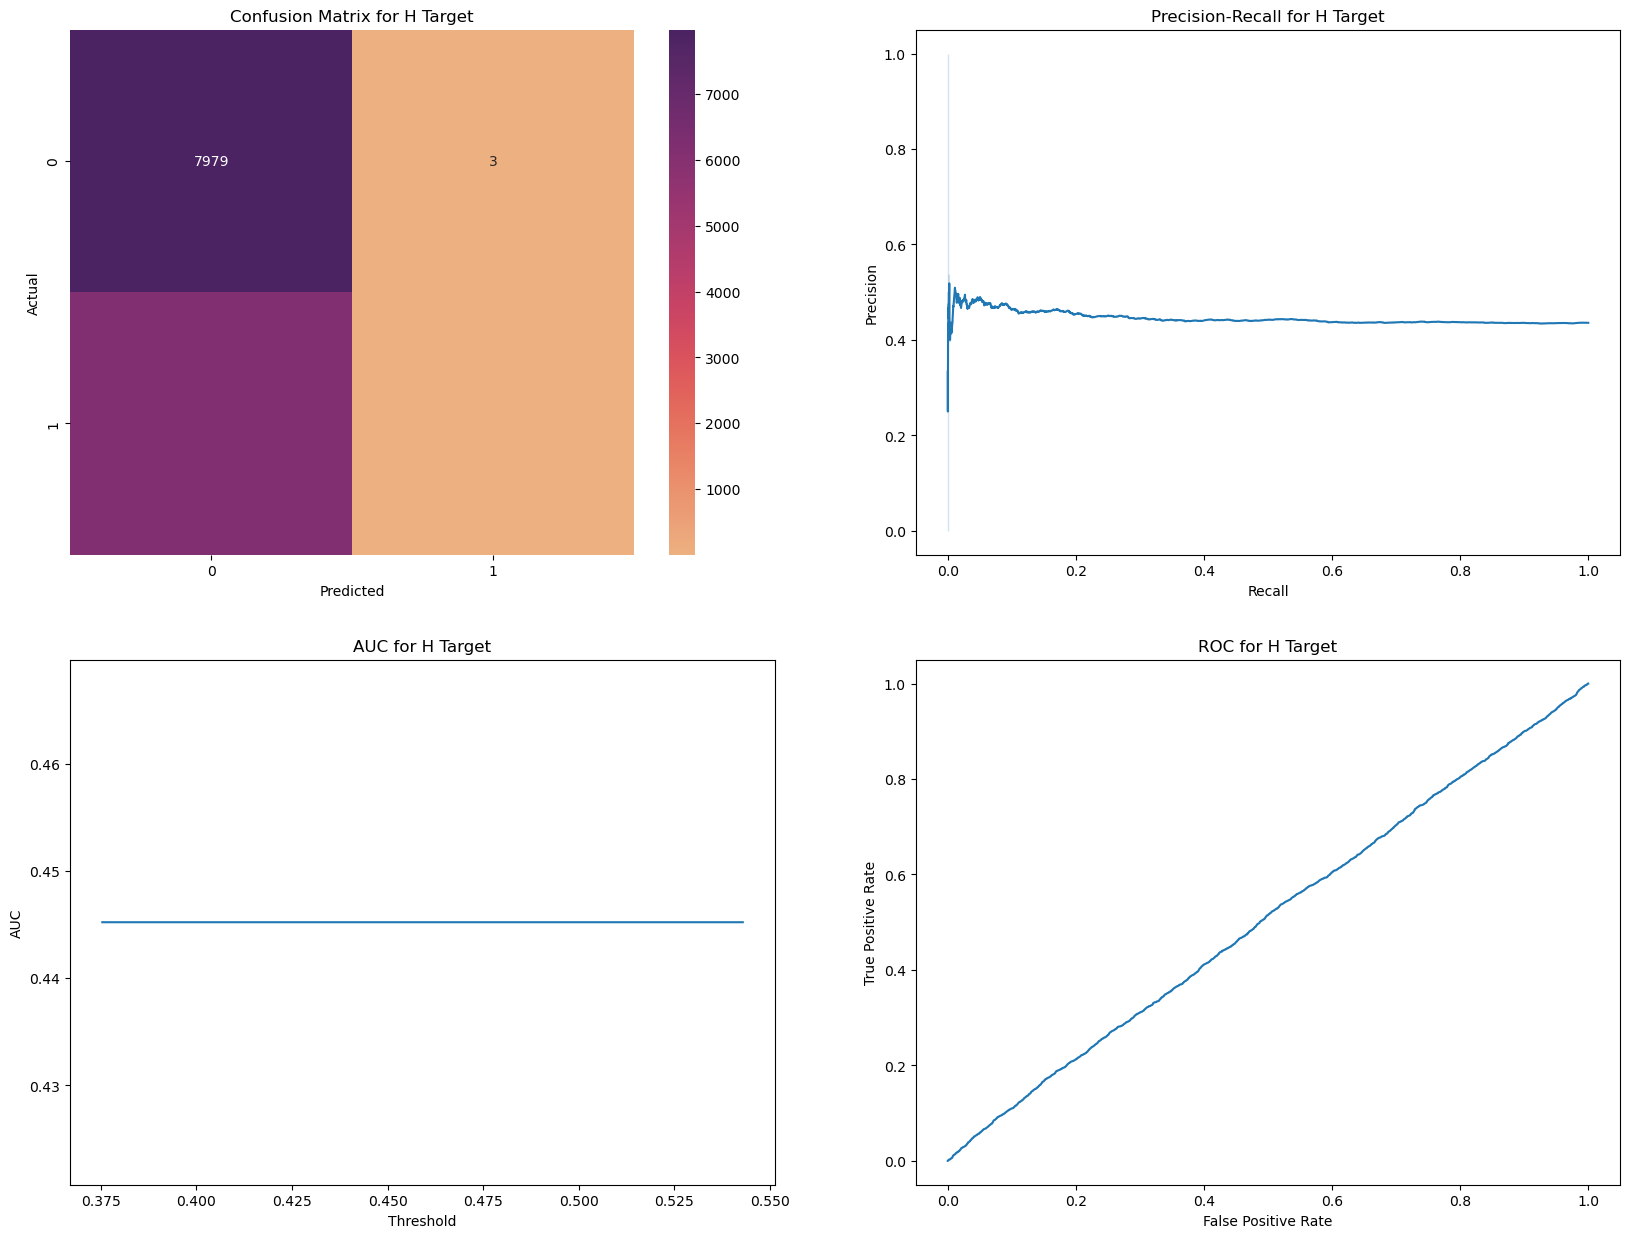

In [86]:
#  precision_recall_curve,

precision, recall, thresholds = precision_recall_curve(y_test[target1], test_model.predict_proba(x_test)[:, 1])

# area_under_curve
area_under_curve = auc(recall, precision)

# roc_curve
roc_fpr, roc_tpr, _ = roc_curve(y_test[target1], test_model.predict_proba(x_test)[:, 1])

# confusion_matrix
cm = confusion_matrix(y_test[target1], test_model.predict(x_test))

fig, ax = plt.subplots( 2, 2, figsize=(20, 15))

cmv = sns.heatmap(cm, annot=True, fmt='d', cmap='flare', ax=ax[0,0]).set(title=f"Confusion Matrix for {target1} Target")
ax[0,0].set(xlabel='Predicted',ylabel= 'Actual')

# plot precision-recall curve
pr = sns.lineplot(x=recall, y=precision, ax=ax[0, 1])
pr.set_title(f"Precision-Recall for {target1} Target")
ax[0,1].set(xlabel='Recall', ylabel='Precision')

# plot auc
aucu = sns.lineplot(x=thresholds, y=area_under_curve, ax=ax[1, 0])
aucu.set_title(f"AUC for {target1} Target")
ax[1,0].set(xlabel='Threshold', ylabel='AUC')

# plot roc
rocc = sns.lineplot(x=roc_fpr, y=roc_tpr, ax=ax[1,1])
rocc.set_title(f"ROC for {target1} Target")
ax[1,1].set(xlabel='False Positive Rate', ylabel='True Positive Rate')

In [87]:
%%time

# train model for each target
name = 'LogisticRegression'
for target in meta.keys():
    print('\n>>>>>',target, ':', meta[target],'<<<<<\n')
    mode, pred, accu = logistic_regression(target, x_train, y_train, x_test, y_test)
    results_df = pd.concat([results_df, pd.DataFrame([[target, name, accu]], columns=results_df.columns)], ignore_index=True)


>>>>> FHR : 1st half result <<<<<

Accuracy: 0.42
              precision    recall  f1-score   support

           A       0.67      0.00      0.00      3508
           D       0.42      1.00      0.59      5894
           H       1.00      0.00      0.00      4748

    accuracy                           0.42     14150
   macro avg       0.69      0.33      0.20     14150
weighted avg       0.67      0.42      0.25     14150
 


>>>>> FTR : full-time result <<<<<

Accuracy: 0.44
              precision    recall  f1-score   support

           A       0.75      0.00      0.00      4282
           D       1.00      0.00      0.00      3700
           H       0.44      1.00      0.61      6168

    accuracy                           0.44     14150
   macro avg       0.73      0.33      0.20     14150
weighted avg       0.68      0.44      0.27     14150
 


>>>>> H : home <<<<<

Accuracy: 0.56
              precision    recall  f1-score   support

           0       0.56      1.00     

Text(0.5, 1.0, 'Accuracy Distribution')

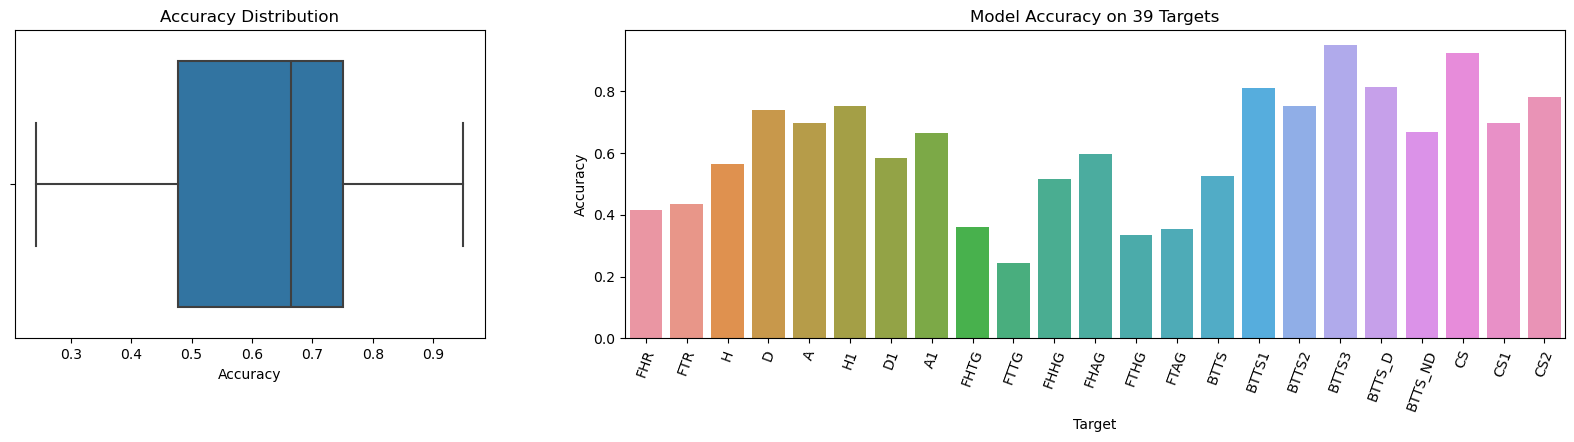

In [88]:
# Visualize
fig, axes = plt.subplots(figsize=(20, 4), nrows=1, ncols=2, width_ratios=[1, 2])
d = sns.barplot(data=results_df.query('Model == "LogisticRegression"'), x='Target', y='Accuracy', hue=None, ax=axes[1],)
d.set_xticklabels(d.get_xticklabels(),rotation=70)
d.set_title('Model Accuracy on 39 Targets')
sns.boxplot(data=results_df.query('Model == "LogisticRegression"'), x='Accuracy', ax=axes[0]).set_title('Accuracy Distribution')

Accuracy: 0.44
              precision    recall  f1-score   support

           A       0.67      0.00      0.00      4282
           D       1.00      0.00      0.00      3700
           H       0.44      1.00      0.61      6168

    accuracy                           0.44     14150
   macro avg       0.70      0.33      0.20     14150
weighted avg       0.65      0.44      0.26     14150
 

   Actual Predicted
0       H         H
1       H         H
2       A         H
3       H         H
4       H         H
5       H         H
6       H         H
7       A         H
8       A         H
9       H         H
10      H         H
11      H         H
12      D         H
13      D         H
14      H         H
15      H         H
16      D         H
17      A         H
18      A         H
19      H         H
20      H         H
21      D         H
22      A         H
23      D         H
24      A         H
25      D         H
26      D         H
27      D         H
28      H         H
29

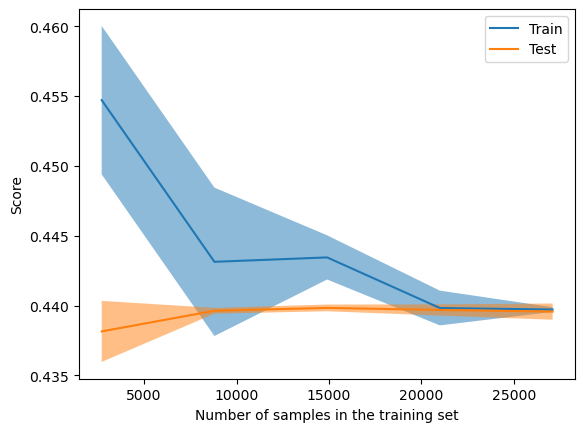

In [89]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

# Assuming the data is already loaded in `data`

# Features and target as specified
features = ['RTLM', 'RTLG', 'RTHG', 'RTAG', 'CALG', 'AGSH', 'AGSA', 'RALG']
target_ftr = 'FTR'


# Train and test split
train = data.loc[data['Season'].isin(b1), :]
test = data.loc[data['Season'].isin(b2), :]

# Features and target split
x_train = train[features]
y_train_ftr = train[target_ftr]
x_test = test[features]
y_test_ftr = test[target_ftr]

# Scale the data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Function to train and evaluate Logistic Regression
def logistic_regression_classifier(target, x_train, y_train, x_test, y_test, params={}, learning_curve=False):
    """Returns trained model, predictions, accuracy in this order."""
    
    # Initialize the model
    if len(params) == 0:
        model = LogisticRegression(max_iter=2000, solver='saga')  # Increased max_iter and changed solver to 'saga'
    else:
        model = LogisticRegression(**params)
        
    # Fit the model
    model.fit(x_train, y_train)
    
    # Predict
    predictions = model.predict(x_test)
    
    # Evaluate
    accuracy = accuracy_score(y_test, predictions)
    print(f"Accuracy: {accuracy:.2f}")
    
    # Classification report
    report = classification_report(y_test, predictions, zero_division=1)
    print(report, '\n')
    
    if learning_curve:
        LearningCurveDisplay.from_estimator(model, x_train, y_train)
   
    return model, predictions, accuracy

# Train and evaluate the model for 'FTR'
model_ftr_lr, pred_ftr_lr, accu_ftr_lr = logistic_regression_classifier(target_ftr, x_train_scaled, y_train_ftr, x_test_scaled, y_test_ftr, learning_curve=True)

# Create DataFrame to compare predictions with actual values
comparison_df_lr = pd.DataFrame({'Actual': y_test_ftr.reset_index(drop=True), 'Predicted': pred_ftr_lr})
print(comparison_df_lr.head(30))

# Calculate accuracy per HomeTeam per Season
def accuracy_per_team_season(predictions, x_test, y_test, teams, seasons, target):
    accuracy_results = []

    # Reset index for alignment
    y_test = y_test.reset_index(drop=True)
    x_test = x_test.reset_index()

    for season in seasons:
        season_data = x_test[x_test['Season'] == season]
        for team in teams:
            team_data = season_data[season_data['HomeTeam'] == team]
            if not team_data.empty:
                team_indices = team_data.index
                y_true = y_test.loc[team_indices]
                y_pred = predictions[team_indices]
                accuracy = accuracy_score(y_true, y_pred)
                accuracy_results.append({'Season': season, 'HomeTeam': team, 'Accuracy': accuracy})
    
    return pd.DataFrame(accuracy_results)

# Get unique HomeTeams and Seasons
unique_teams = test['HomeTeam'].unique()
unique_seasons = test['Season'].unique()

# Calculate accuracy per HomeTeam per Season for 'FTR'
accuracy_results_ftr_lr = accuracy_per_team_season(pred_ftr_lr, test, y_test_ftr, unique_teams, unique_seasons, target_ftr)

# Display the accuracy results
print(accuracy_results_ftr_lr)


<h3>final result</h3>

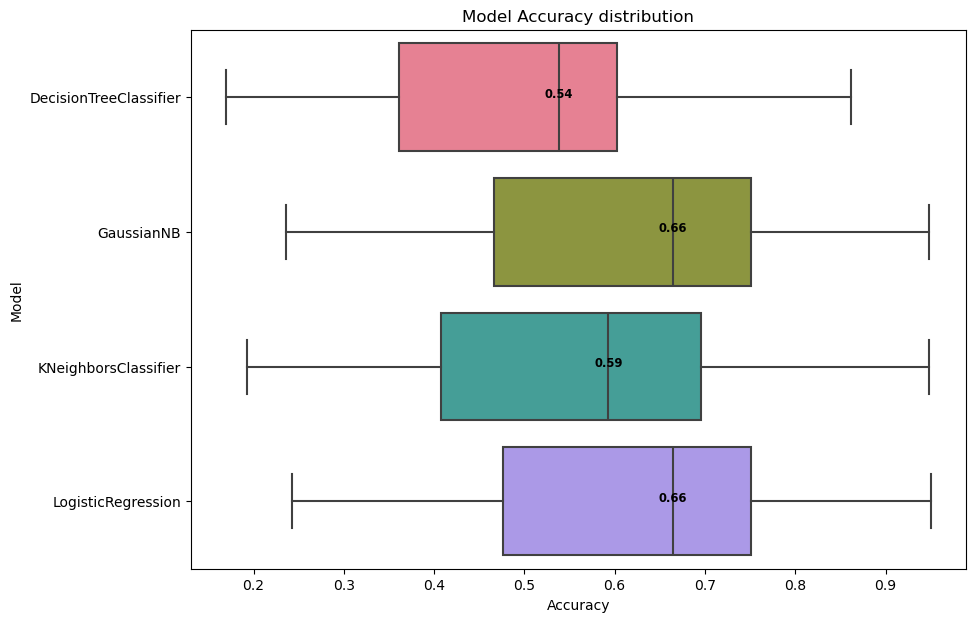

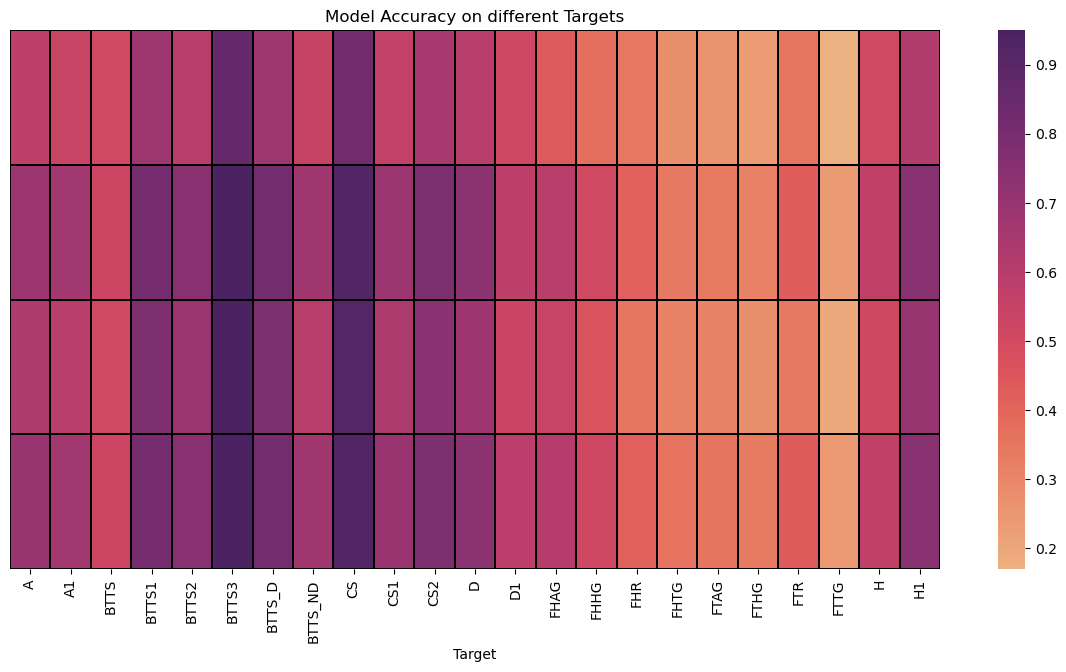

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming `results_df` is your DataFrame

# Assuming `results_df` is your DataFrame

# Create the boxplot with annotations
plt.figure(figsize=(10, 7))
boxplot = sns.boxplot(data=results_df.sort_values(by='Model'), x="Accuracy", y="Model", width=.8, palette="husl")
plt.title("Model Accuracy distribution")

# Annotate each boxplot with median value
medians = results_df.groupby(['Model'])['Accuracy'].median()
median_labels = [f'{s:0.2f}' for s in medians]

for xtick, model in enumerate(medians.index):
    boxplot.text(medians[model], xtick, median_labels[xtick],
                 horizontalalignment='center', size='small', color='black', weight='semibold')

plt.show()

# Create the heatmap
res = results_df.pivot_table(index='Model', columns='Target', values='Accuracy')
plt.figure(figsize=(15, 7))
sns.heatmap(res, cmap='flare', yticklabels=False, linewidths=0.1, linecolor="black")
plt.title("Model Accuracy on different Targets")
plt.ylabel('')
plt.show()


Evaluation table saved to C:/Users/Alfredo/Downloads/model_evaluation_results.xlsx and as a PNG image at the same location.


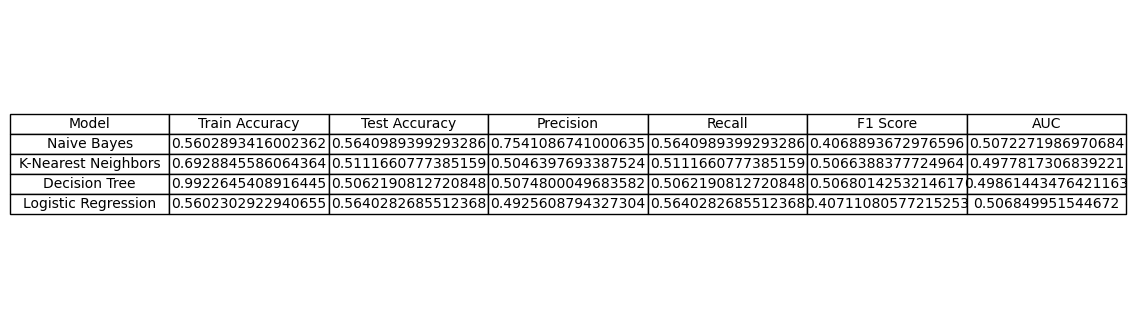

In [92]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, accuracy_score, classification_report, roc_auc_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

# Assuming x_train, y_train, x_test, y_test are already defined

# Initialize classifiers
classifiers = {
    "Naive Bayes": GaussianNB(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=22),
    "Logistic Regression": make_pipeline(StandardScaler(), LogisticRegression(random_state=42, max_iter=2000))
}

# Prepare a DataFrame to store evaluation results
eval_df = pd.DataFrame(columns=["Model", "Train Accuracy", "Test Accuracy", "Precision", "Recall", "F1 Score", "AUC"])

# Evaluate each classifier
for clf_name, clf in classifiers.items():
    # Fit the model
    clf.fit(x_train, y_train[target1])
    
    # Predict
    y_train_pred = clf.predict(x_train)
    y_test_pred = clf.predict(x_test)
    
    # Calculate metrics
    train_accuracy = accuracy_score(y_train[target1], y_train_pred)
    test_accuracy = accuracy_score(y_test[target1], y_test_pred)
    classification_rep = classification_report(y_test[target1], y_test_pred, zero_division=1, output_dict=True)
    precision = classification_rep['weighted avg']['precision']
    recall = classification_rep['weighted avg']['recall']
    f1_score = classification_rep['weighted avg']['f1-score']
    
    if hasattr(clf, "predict_proba"):
        y_score = clf.predict_proba(x_test)[:, 1]
        auc_score = roc_auc_score(y_test[target1], y_score)
    else:
        auc_score = "N/A"
    
    # Append to DataFrame
    eval_df = pd.concat([eval_df, pd.DataFrame({
        "Model": [clf_name],
        "Train Accuracy": [train_accuracy],
        "Test Accuracy": [test_accuracy],
        "Precision": [precision],
        "Recall": [recall],
        "F1 Score": [f1_score],
        "AUC": [auc_score]
    })], ignore_index=True)

# Save evaluation results to Excel
file_path = "C:/Users/Alfredo/Downloads/model_evaluation_results.xlsx"
eval_df.to_excel(file_path, index=False)

# Function to save DataFrame as a PNG image
def save_df_as_image(df, path):
    fig, ax = plt.subplots(figsize=(12, 4))  # Set size frame
    ax.axis('tight')
    ax.axis('off')
    table = ax.table(cellText=df.values, colLabels=df.columns, cellLoc='center', loc='center')
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1.2, 1.2)
    plt.savefig(path, bbox_inches='tight', pad_inches=0.1)  # Save image with tight layout

# Save the DataFrame as a PNG image
save_df_as_image(eval_df, 'C:/Users/Alfredo/Downloads/model_evaluation_results.png')

print(f"Evaluation table saved to {file_path} and as a PNG image at the same location.")


C:\Users\Alfredo\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Alfredo\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Alfredo\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


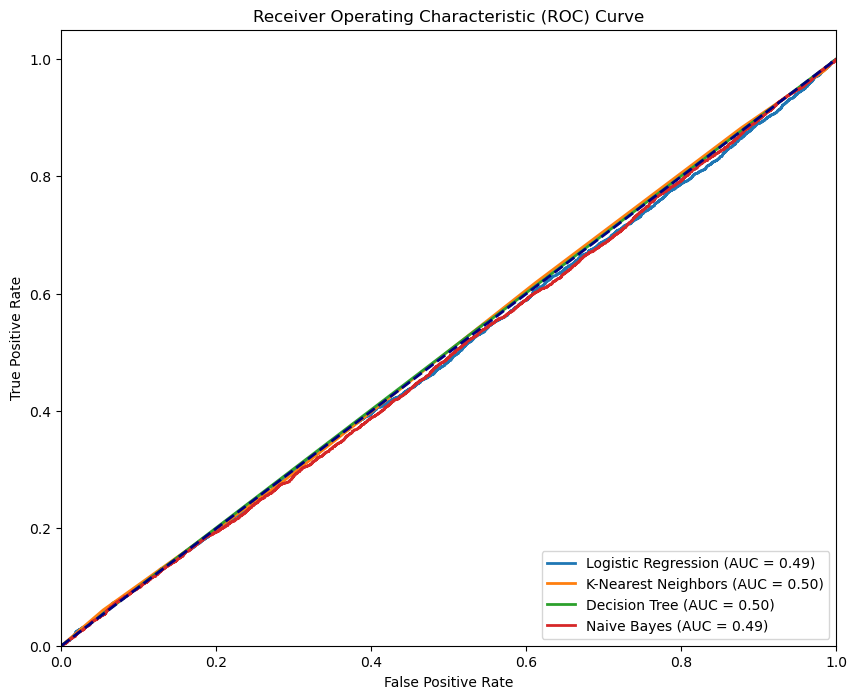

In [93]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# Assume x_train, y_train, x_test, y_test are already defined
# If not, please define them using the provided data

# Binarize the target
y_train_bin = label_binarize(y_train[target1], classes=[0, 1])
y_test_bin = label_binarize(y_test[target1], classes=[0, 1])

# Initialize classifiers
classifiers = {
    "Logistic Regression": make_pipeline(StandardScaler(), LogisticRegression(random_state=42, max_iter=2000)),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=22),
    "Naive Bayes": GaussianNB()
}

# Plot ROC curve for each classifier
plt.figure(figsize=(10, 8))

for clf_name, clf in classifiers.items():
    clf.fit(x_train, y_train_bin)
    y_score = clf.predict_proba(x_test)
    
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(y_test_bin.shape[1]):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    
    # Plot ROC curve
    for i in range(y_test_bin.shape[1]):
        plt.plot(fpr[i], tpr[i], lw=2, label=f'{clf_name} (AUC = {roc_auc[i]:0.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


<h2>Predict and evaluation</h2>

<h3>Tipe A </h3>

<h4>"D"</h4>

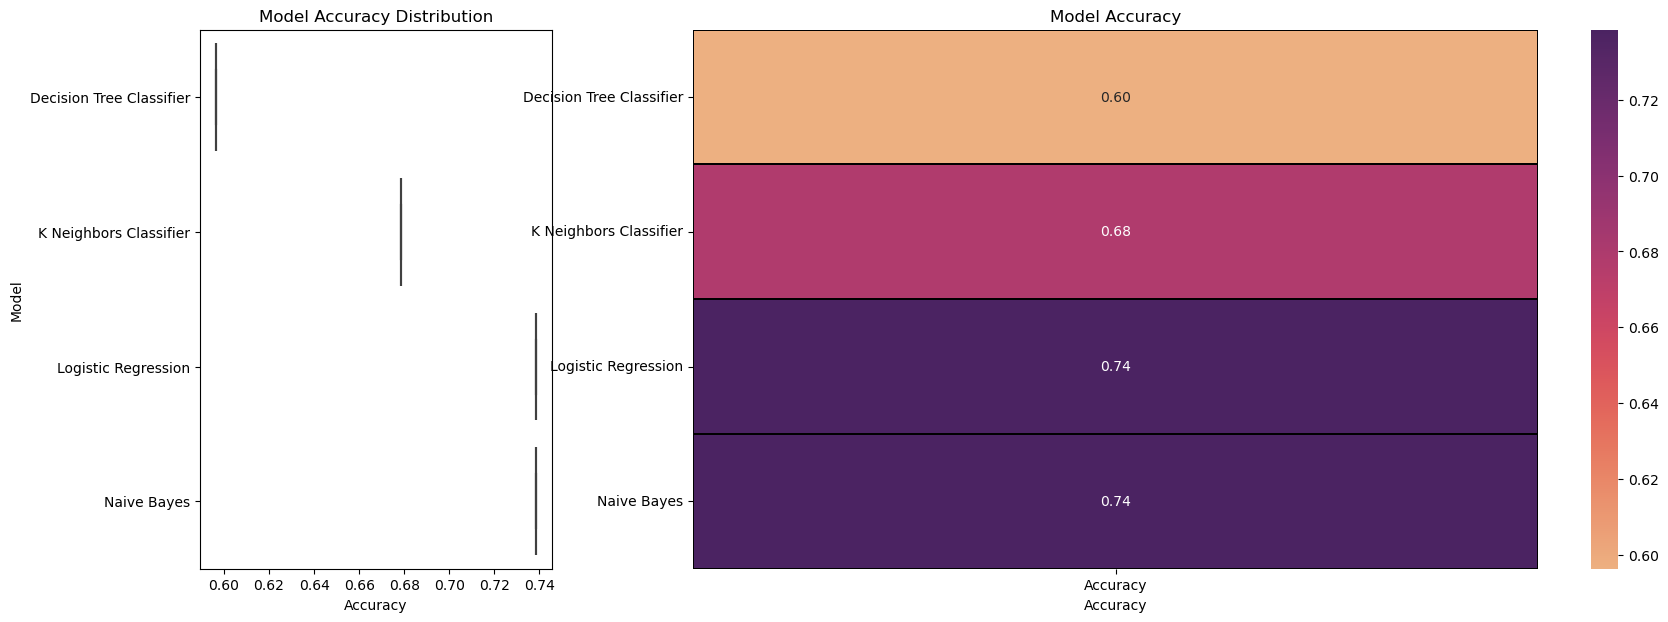


Classification Report for Logistic Regression :
              precision    recall  f1-score   support

           0       0.74      1.00      0.85     10450
           1       1.00      0.00      0.00      3700

    accuracy                           0.74     14150
   macro avg       0.87      0.50      0.42     14150
weighted avg       0.81      0.74      0.63     14150


Sample Predictions vs Actual values for Logistic Regression :
        id     Season  Country HomeTeam     AwayTeam  Actual  Predicted
3802  3802  2022-2023  England   Fulham    Liverpool       1          0
3824  3824  2022-2023  England   Fulham    Brentford       0          0
3842  3842  2022-2023  England   Fulham     Brighton       0          0
3871  3871  2022-2023  England   Fulham    Newcastle       0          0
3890  3890  2022-2023  England   Fulham  Bournemouth       1          0
3905  3905  2022-2023  England   Fulham  Aston Villa       0          0
3923  3923  2022-2023  England   Fulham      Everton     

In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


train = data.loc[data['Season'].isin(b1), :]
test = data.loc[data['Season'].isin(b2), :]

# Define the features and target
features = ['RTLM', 'RTLG', 'RTHG', 'RTAG', 'CALG', 'AGSH', 'AGSA', 'RALG']
target = 'D'

x_train = train[features]
y_train = train[target]
x_test = test[features]
y_test = test[target]

# Save original indices for alignment later
test_indices = x_test.index

# Standardize the data
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=2000),
    'Naive Bayes': GaussianNB(),
    'K Neighbors Classifier': KNeighborsClassifier(),
    'Decision Tree Classifier': DecisionTreeClassifier()
}

# Train and evaluate models
results = []

for model_name, model in models.items():
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    accuracy = accuracy_score(y_test, predictions)
    results.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Classification Report': classification_report(y_test, predictions, zero_division=1),
        'Predictions': predictions
    })

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Plotting the results
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 7), width_ratios=[1, 3])

# Boxplot of the accuracy distribution
sns.boxplot(data=results_df.sort_values(by='Model'), x="Accuracy", y="Model", width=.8, ax=axes[0], palette="husl").set_title("Model Accuracy Distribution")

# Heatmap of accuracy
res = results_df.pivot_table(index='Model', values='Accuracy')
heatmap = sns.heatmap(res, cmap='flare', ax=axes[1], annot=True, fmt=".2f", linewidths=0.1, linecolor="black")
heatmap.set_title("Model Accuracy")
heatmap.set_ylabel('')
heatmap.set_xlabel('Accuracy')

plt.show()

# Filter test set for "Fulham" HomeTeam
fulham_test = test[test['HomeTeam'] == 'Fulham']

# Print detailed classification reports and predictions for Fulham games
for result in results:
    print(f"\nClassification Report for {result['Model']} :\n{result['Classification Report']}\n")
    print(f"Sample Predictions vs Actual values for {result['Model']} :")
    
    # Convert predictions to a pandas Series with the original test indices
    predictions_series = pd.Series(result['Predictions'], index=test_indices)
    
    # Align the indices for Fulham home games
    fulham_predictions = predictions_series.loc[fulham_test.index]

    # Displaying the first 10 predictions and actual values for Fulham games
    sample_results = pd.DataFrame({
        'id': fulham_test['id'],
        'Season': fulham_test['Season'],
        'Country': fulham_test['Country'],
        'HomeTeam': fulham_test['HomeTeam'],
        'AwayTeam': fulham_test['AwayTeam'],
        'Actual': y_test.loc[fulham_test.index],
        'Predicted': fulham_predictions
    }).head(10)
    
    print(sample_results)
    print("\n")


In [98]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

# Assume `data`, `b1`, and `b2` are defined
# Define the features and target
features = ['RTLM', 'RTLG', 'RTHG', 'RTAG', 'CALG', 'AGSH', 'AGSA', 'RALG']
target = 'D'

train = data.loc[data['Season'].isin(b1), :]
test = data.loc[data['Season'].isin(b2), :]

x_train = train[features]
y_train = train[target]
x_test = test[features]
y_test = test[target]

# Save original indices for alignment later
test_indices = x_test.index

# Standardize the data
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=2000),
    'Naive Bayes': GaussianNB(),
    'K Neighbors Classifier': KNeighborsClassifier(),
    'Decision Tree Classifier': DecisionTreeClassifier()
}

# Train and evaluate models
results = []

for model_name, model in models.items():
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    accuracy = accuracy_score(y_test, predictions)
    class_report = classification_report(y_test, predictions, zero_division=1, output_dict=True)
    
    # Filter test set for "Fulham" HomeTeam
    fulham_test = test[test['HomeTeam'] == 'Fulham']
    
    # Convert predictions to a pandas Series with the original test indices
    predictions_series = pd.Series(predictions, index=test_indices)
    
    # Align the indices for Fulham home games
    fulham_predictions = predictions_series.loc[fulham_test.index].head(10)  # Limit to 10 data points
    
    # Create DataFrame for Fulham predictions
    fulham_results = pd.DataFrame({
        'id': fulham_test['id'].head(10),
        'Season': fulham_test['Season'].head(10),
        'Country': fulham_test['Country'].head(10),
        'HomeTeam': fulham_test['HomeTeam'].head(10),
        'AwayTeam': fulham_test['AwayTeam'].head(10),
        'Actual': y_test.loc[fulham_test.index].head(10),
        'Predicted': fulham_predictions
    })
    
    results.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Classification Report': class_report,
        'Fulham Predictions': fulham_results
    })

# Function to save classification report to Excel
def save_classification_report_to_excel(reports, file_path):
    with pd.ExcelWriter(file_path) as writer:
        for result in reports:
            # Save classification report
            report_df = pd.DataFrame(result['Classification Report']).transpose()
            report_df.to_excel(writer, sheet_name=result['Model'][:20] + '_Report')
            
            # Save Fulham predictions
            fulham_df = result['Fulham Predictions']
            fulham_df.to_excel(writer, sheet_name=result['Model'][:20] + '_Fulham')

# Save the classification reports to an Excel file
save_classification_report_to_excel(results, "C:/Users/Alfredo/Downloads/classification_report_D.xlsx")

print(f"Classification reports and Fulham predictions saved to C:/Users/Alfredo/Downloads/classification_report_D.xlsx")

# Extract Naive Bayes and Logistic Regression reports for comparison
naive_bayes_report = next((result for result in results if result['Model'] == 'Naive Bayes'), None)
logistic_regression_report = next((result for result in results if result['Model'] == 'Logistic Regression'), None)

# Print the comparison
print("\nComparison of Classification Reports:\n")

print(f"Naive Bayes Classification Report:\n{pd.DataFrame(naive_bayes_report['Classification Report']).transpose()}\n")
print(f"Logistic Regression Classification Report:\n{pd.DataFrame(logistic_regression_report['Classification Report']).transpose()}\n")


Classification reports and Fulham predictions saved to C:/Users/Alfredo/Downloads/classification_report_D.xlsx

Comparison of Classification Reports:

Naive Bayes Classification Report:
              precision    recall  f1-score       support
0              0.738516  1.000000  0.849593  10450.000000
1              1.000000  0.000000  0.000000   3700.000000
accuracy       0.738516  0.738516  0.738516      0.738516
macro avg      0.869258  0.500000  0.424797  14150.000000
weighted avg   0.806890  0.738516  0.627438  14150.000000

Logistic Regression Classification Report:
              precision    recall  f1-score       support
0              0.738516  1.000000  0.849593  10450.000000
1              1.000000  0.000000  0.000000   3700.000000
accuracy       0.738516  0.738516  0.738516      0.738516
macro avg      0.869258  0.500000  0.424797  14150.000000
weighted avg   0.806890  0.738516  0.627438  14150.000000



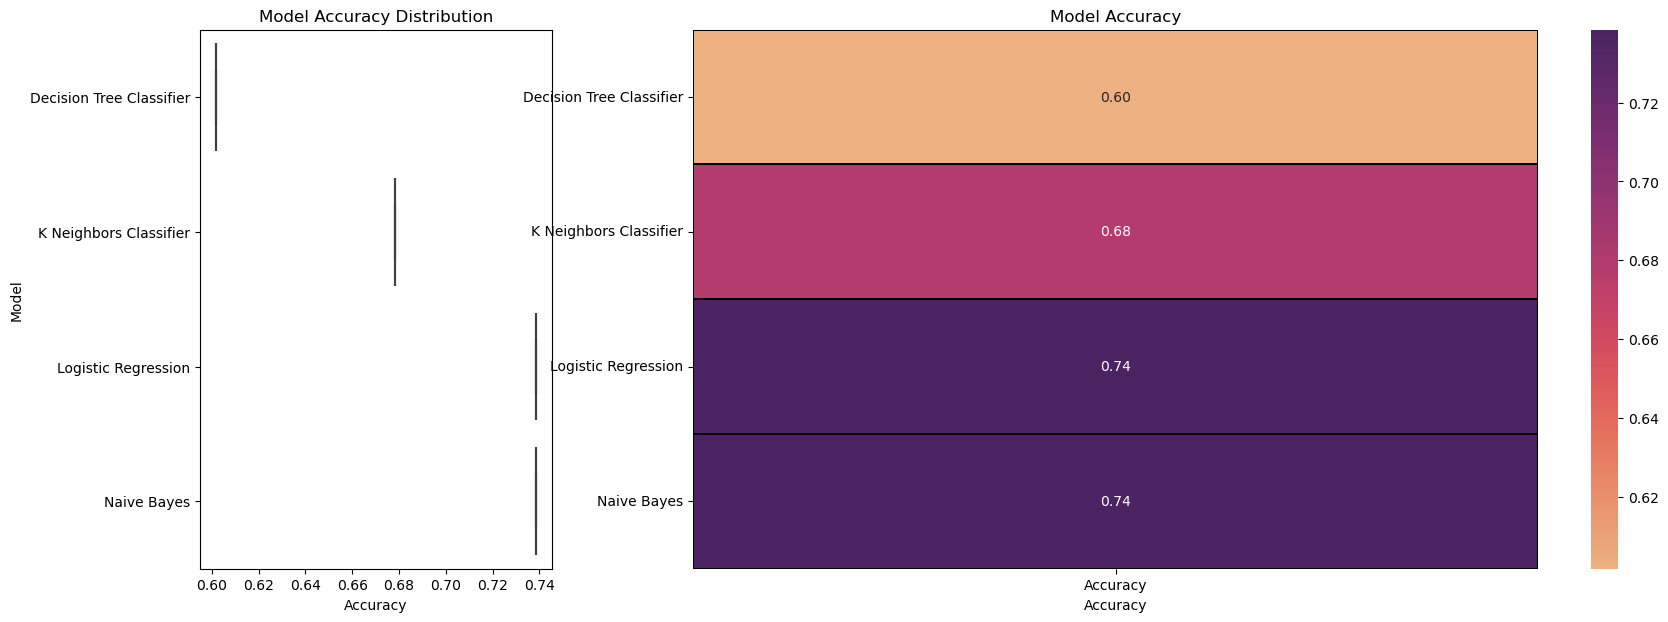

Total Matches: 14150
Total Draws: 3700
Percentage of actual draws: 26.15%
Percentage of correct draw predictions for Logistic Regression: 0.00%
Percentage of correct draw predictions for Naive Bayes: 0.00%
Percentage of correct draw predictions for K Neighbors Classifier: 25.96%
Percentage of correct draw predictions for Decision Tree Classifier: 26.88%


In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


train = data.loc[data['Season'].isin(b1), :]
test = data.loc[data['Season'].isin(b2), :]

# Define the features and target
features = ['RTLM', 'RTLG', 'RTHG', 'RTAG', 'CALG', 'AGSH', 'AGSA', 'RALG']
target = 'D'

x_train = train[features]
y_train = train[target]
x_test = test[features]
y_test = test[target]

# Save original indices for alignment later
test_indices = x_test.index

# Standardize the data
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=2000),
    'Naive Bayes': GaussianNB(),
    'K Neighbors Classifier': KNeighborsClassifier(),
    'Decision Tree Classifier': DecisionTreeClassifier()
}

# Train and evaluate models
results = []

for model_name, model in models.items():
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    accuracy = accuracy_score(y_test, predictions)
    results.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Classification Report': classification_report(y_test, predictions, zero_division=1),
        'Predictions': predictions
    })

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Plotting the results
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 7), width_ratios=[1, 3])

# Boxplot of the accuracy distribution
sns.boxplot(data=results_df.sort_values(by='Model'), x="Accuracy", y="Model", width=.8, ax=axes[0], palette="husl").set_title("Model Accuracy Distribution")

# Heatmap of accuracy
res = results_df.pivot_table(index='Model', values='Accuracy')
heatmap = sns.heatmap(res, cmap='flare', ax=axes[1], annot=True, fmt=".2f", linewidths=0.1, linecolor="black")
heatmap.set_title("Model Accuracy")
heatmap.set_ylabel('')
heatmap.set_xlabel('Accuracy')

plt.show()

# Calculate the percentage of actual draws
total_matches = len(test)
actual_draws = test[target].sum()
percentage_actual_draws = (actual_draws / total_matches) * 100
print(f"Total Matches: {total_matches}")
print(f"Total Draws: {actual_draws}")
print(f"Percentage of actual draws: {percentage_actual_draws:.2f}%")

# Calculate the percentage of correct draw predictions
for result in results:
    draw_predictions = (result['Predictions'] == 1)
    correct_draw_predictions = (draw_predictions & (y_test == 1)).sum()
    total_draw_predictions = draw_predictions.sum()
    if total_draw_predictions > 0:
        percentage_correct_draw_predictions = (correct_draw_predictions / total_draw_predictions) * 100
    else:
        percentage_correct_draw_predictions = 0
    print(f"Percentage of correct draw predictions for {result['Model']}: {percentage_correct_draw_predictions:.2f}%")



# Function to save classification report to Excel
def save_classification_report_to_excel(reports, file_path):
    with pd.ExcelWriter(file_path) as writer:
        for result in reports:
            # Save classification report
            report_df = pd.DataFrame(result['Classification Report']).transpose()
            report_df.to_excel(writer, sheet_name=result['Model'][:30] + '_Report')
            
            # Save sample predictions
            sample_df = result['Sample Predictions']
            sample_df.to_excel(writer, sheet_name=result['Model'][:30] + '_Sample_Predictions')

# Save the classification reports to an Excel file
#save_classification_report_to_excel(results, "C:/Users/Alfredo/Downloads/classification_report_D.xlsx")

#print(f"Classification reports and sample predictions saved to C:/Users/Alfredo/Downloads/classification_report_D.xlsx")


<h4>BTTS1</h4>

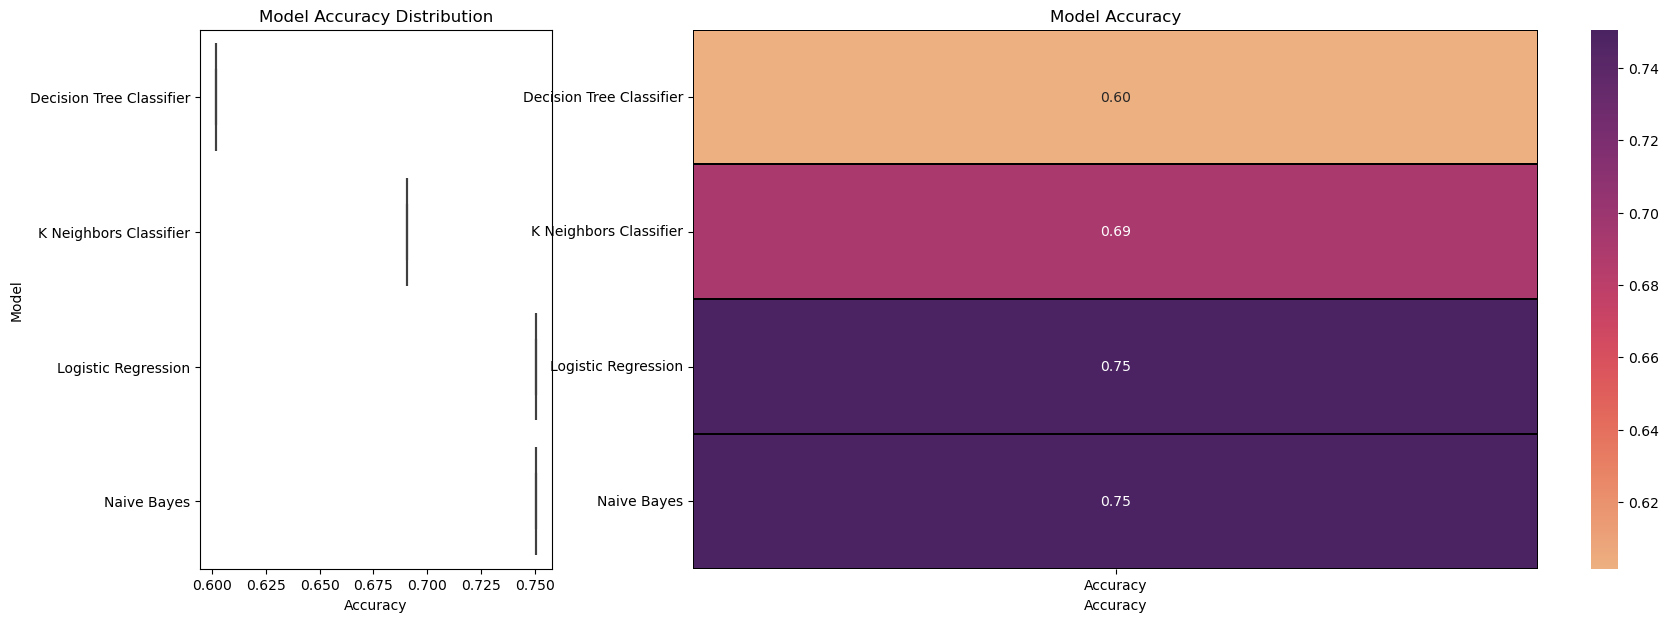


Classification Report for Logistic Regression :
              precision    recall  f1-score   support

           0       0.75      1.00      0.86     10621
           1       1.00      0.00      0.00      3529

    accuracy                           0.75     14150
   macro avg       0.88      0.50      0.43     14150
weighted avg       0.81      0.75      0.64     14150


Sample Predictions vs Actual values for Logistic Regression :
        id     Season  Country HomeTeam     AwayTeam  Actual  Predicted
3802  3802  2022-2023  England   Fulham    Liverpool       1          0
3824  3824  2022-2023  England   Fulham    Brentford       1          0
3842  3842  2022-2023  England   Fulham     Brighton       1          0
3871  3871  2022-2023  England   Fulham    Newcastle       1          0
3890  3890  2022-2023  England   Fulham  Bournemouth       0          0
3905  3905  2022-2023  England   Fulham  Aston Villa       0          0
3923  3923  2022-2023  England   Fulham      Everton     

In [101]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


train = data.loc[data['Season'].isin(b1), :]
test = data.loc[data['Season'].isin(b2), :]

# Define the features and target
features = ['RTLM', 'RTLG', 'RTHG', 'RTAG', 'CALG', 'AGSH', 'AGSA', 'RALG']
target = 'BTTS2'

x_train = train[features]
y_train = train[target]
x_test = test[features]
y_test = test[target]

# Save original indices for alignment later
test_indices = x_test.index

# Standardize the data
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=2000),
    'Naive Bayes': GaussianNB(),
    'K Neighbors Classifier': KNeighborsClassifier(),
    'Decision Tree Classifier': DecisionTreeClassifier()
}

# Train and evaluate models
results = []

for model_name, model in models.items():
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    accuracy = accuracy_score(y_test, predictions)
    results.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Classification Report': classification_report(y_test, predictions, zero_division=1),
        'Predictions': predictions
    })

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Plotting the results
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 7), width_ratios=[1, 3])

# Boxplot of the accuracy distribution
sns.boxplot(data=results_df.sort_values(by='Model'), x="Accuracy", y="Model", width=.8, ax=axes[0], palette="husl").set_title("Model Accuracy Distribution")

# Heatmap of accuracy
res = results_df.pivot_table(index='Model', values='Accuracy')
heatmap = sns.heatmap(res, cmap='flare', ax=axes[1], annot=True, fmt=".2f", linewidths=0.1, linecolor="black")
heatmap.set_title("Model Accuracy")
heatmap.set_ylabel('')
heatmap.set_xlabel('Accuracy')

plt.show()

# Filter test set for "Fulham" HomeTeam
fulham_test = test[test['HomeTeam'] == 'Fulham']

# Print detailed classification reports and predictions for Fulham games
for result in results:
    print(f"\nClassification Report for {result['Model']} :\n{result['Classification Report']}\n")
    print(f"Sample Predictions vs Actual values for {result['Model']} :")
    
    # Convert predictions to a pandas Series with the original test indices
    predictions_series = pd.Series(result['Predictions'], index=test_indices)
    
    # Align the indices for Fulham home games
    fulham_predictions = predictions_series.loc[fulham_test.index]

    # Displaying the first 10 predictions and actual values for Fulham games
    sample_results = pd.DataFrame({
        'id': fulham_test['id'],
        'Season': fulham_test['Season'],
        'Country': fulham_test['Country'],
        'HomeTeam': fulham_test['HomeTeam'],
        'AwayTeam': fulham_test['AwayTeam'],
        'Actual': y_test.loc[fulham_test.index],
        'Predicted': fulham_predictions
    }).head(10)
    
    print(sample_results)
    print("\n")


<h4>BTTS3</h4>

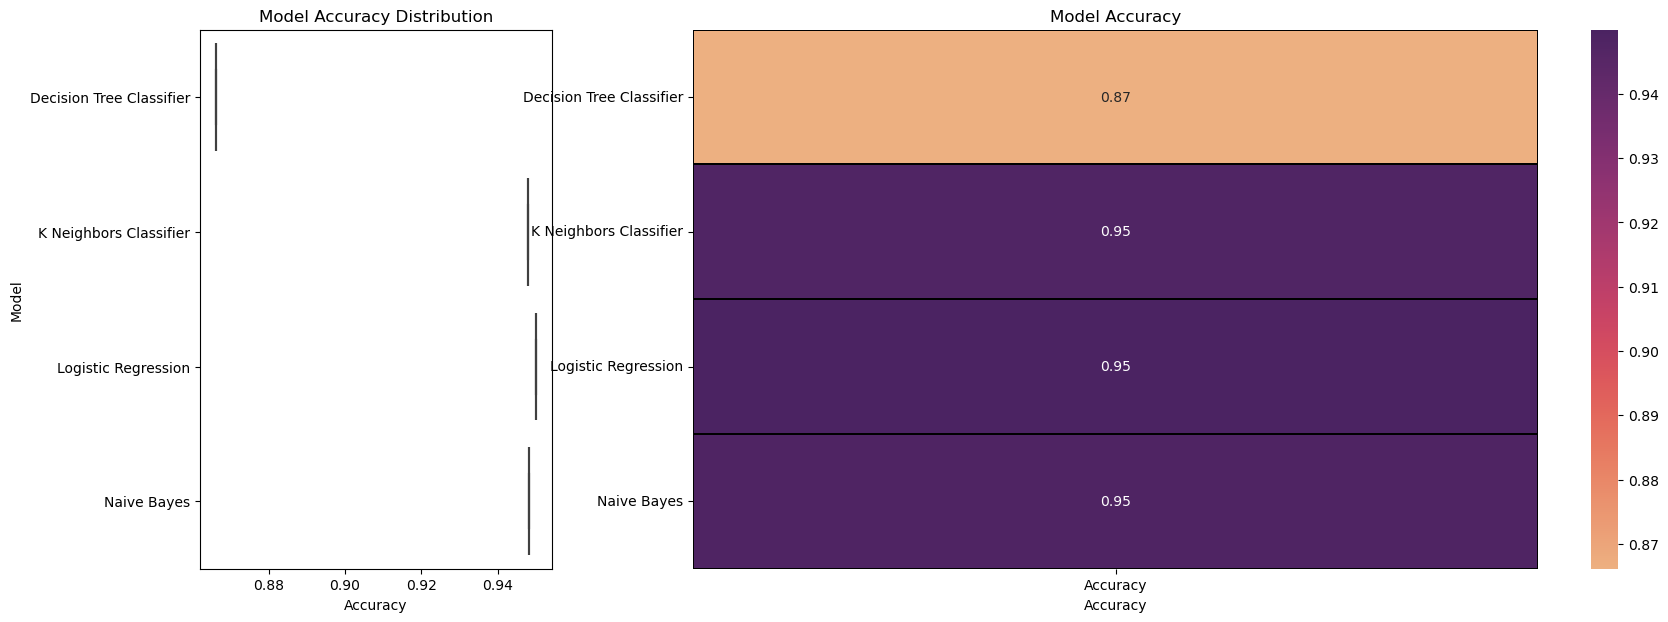


Classification Report for Logistic Regression :
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     13442
           1       1.00      0.00      0.00       708

    accuracy                           0.95     14150
   macro avg       0.97      0.50      0.49     14150
weighted avg       0.95      0.95      0.93     14150


Sample Predictions vs Actual values for Logistic Regression :
        id     Season  Country HomeTeam     AwayTeam  Actual  Predicted
3802  3802  2022-2023  England   Fulham    Liverpool       0          0
3824  3824  2022-2023  England   Fulham    Brentford       1          0
3842  3842  2022-2023  England   Fulham     Brighton       0          0
3871  3871  2022-2023  England   Fulham    Newcastle       0          0
3890  3890  2022-2023  England   Fulham  Bournemouth       0          0
3905  3905  2022-2023  England   Fulham  Aston Villa       0          0
3923  3923  2022-2023  England   Fulham      Everton     

In [103]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


train = data.loc[data['Season'].isin(b1), :]
test = data.loc[data['Season'].isin(b2), :]

# Define the features and target
features = ['RTLM', 'RTLG', 'RTHG', 'RTAG', 'CALG', 'AGSH', 'AGSA', 'RALG']
target = 'BTTS3'

x_train = train[features]
y_train = train[target]
x_test = test[features]
y_test = test[target]

# Save original indices for alignment later
test_indices = x_test.index

# Standardize the data
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=2000),
    'Naive Bayes': GaussianNB(),
    'K Neighbors Classifier': KNeighborsClassifier(),
    'Decision Tree Classifier': DecisionTreeClassifier()
}

# Train and evaluate models
results = []

for model_name, model in models.items():
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    accuracy = accuracy_score(y_test, predictions)
    results.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Classification Report': classification_report(y_test, predictions, zero_division=1),
        'Predictions': predictions
    })

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Plotting the results
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 7), width_ratios=[1, 3])

# Boxplot of the accuracy distribution
sns.boxplot(data=results_df.sort_values(by='Model'), x="Accuracy", y="Model", width=.8, ax=axes[0], palette="husl").set_title("Model Accuracy Distribution")

# Heatmap of accuracy
res = results_df.pivot_table(index='Model', values='Accuracy')
heatmap = sns.heatmap(res, cmap='flare', ax=axes[1], annot=True, fmt=".2f", linewidths=0.1, linecolor="black")
heatmap.set_title("Model Accuracy")
heatmap.set_ylabel('')
heatmap.set_xlabel('Accuracy')

plt.show()

# Filter test set for "Fulham" HomeTeam
fulham_test = test[test['HomeTeam'] == 'Fulham']

# Print detailed classification reports and predictions for Fulham games
for result in results:
    print(f"\nClassification Report for {result['Model']} :\n{result['Classification Report']}\n")
    print(f"Sample Predictions vs Actual values for {result['Model']} :")
    
    # Convert predictions to a pandas Series with the original test indices
    predictions_series = pd.Series(result['Predictions'], index=test_indices)
    
    # Align the indices for Fulham home games
    fulham_predictions = predictions_series.loc[fulham_test.index]

    # Displaying the first 10 predictions and actual values for Fulham games
    sample_results = pd.DataFrame({
        'id': fulham_test['id'],
        'Season': fulham_test['Season'],
        'Country': fulham_test['Country'],
        'HomeTeam': fulham_test['HomeTeam'],
        'AwayTeam': fulham_test['AwayTeam'],
        'Actual': y_test.loc[fulham_test.index],
        'Predicted': fulham_predictions
    }).head(10)
    
    print(sample_results)
    print("\n")


<h4>BTTS_D</h4>

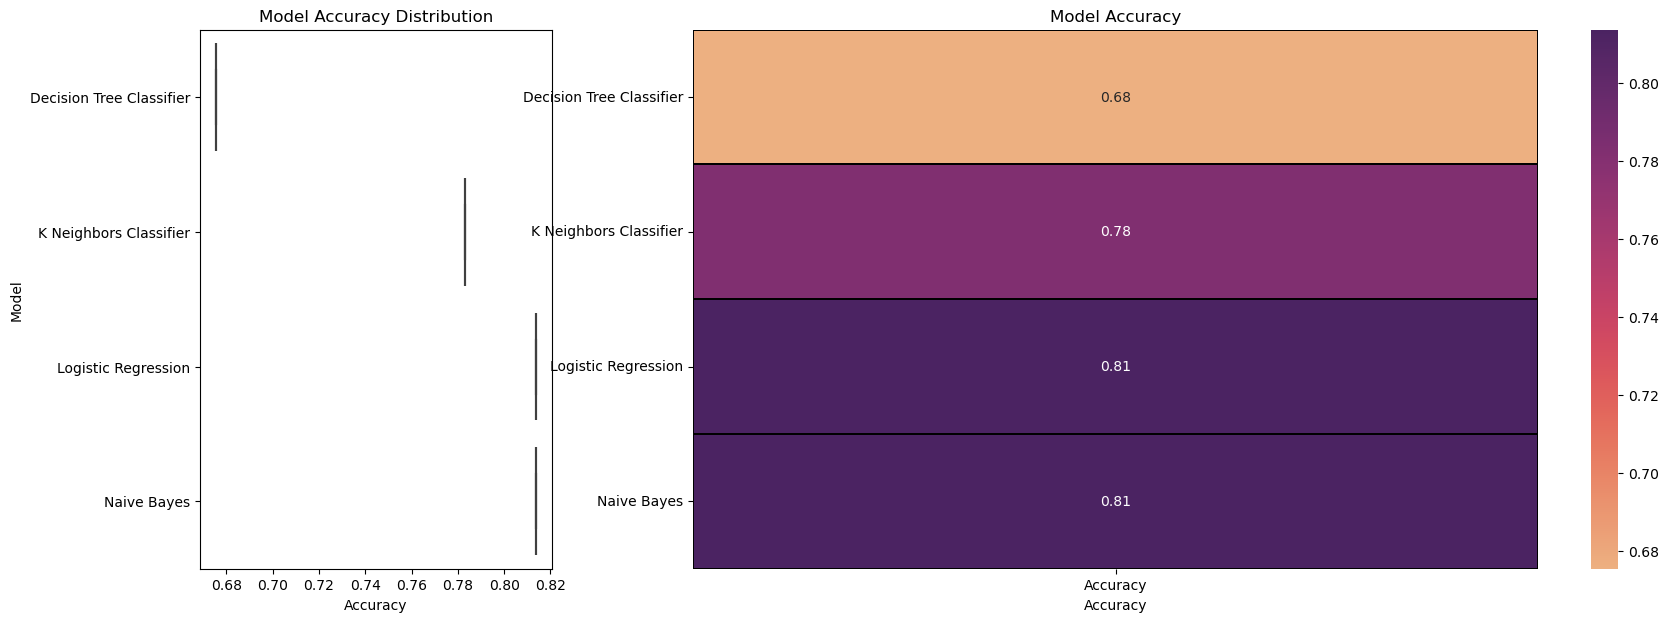


Classification Report for Logistic Regression :
              precision    recall  f1-score   support

           0       0.81      1.00      0.90     11514
           1       1.00      0.00      0.00      2636

    accuracy                           0.81     14150
   macro avg       0.91      0.50      0.45     14150
weighted avg       0.85      0.81      0.73     14150


Sample Predictions vs Actual values for Logistic Regression :
        id     Season  Country HomeTeam     AwayTeam  Actual  Predicted
3802  3802  2022-2023  England   Fulham    Liverpool       1          0
3824  3824  2022-2023  England   Fulham    Brentford       0          0
3842  3842  2022-2023  England   Fulham     Brighton       0          0
3871  3871  2022-2023  England   Fulham    Newcastle       0          0
3890  3890  2022-2023  England   Fulham  Bournemouth       1          0
3905  3905  2022-2023  England   Fulham  Aston Villa       0          0
3923  3923  2022-2023  England   Fulham      Everton     

In [105]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


train = data.loc[data['Season'].isin(b1), :]
test = data.loc[data['Season'].isin(b2), :]

# Define the features and target
features = ['RTLM', 'RTLG', 'RTHG', 'RTAG', 'CALG', 'AGSH', 'AGSA', 'RALG']
target = 'BTTS_D'

x_train = train[features]
y_train = train[target]
x_test = test[features]
y_test = test[target]

# Save original indices for alignment later
test_indices = x_test.index

# Standardize the data
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=2000),
    'Naive Bayes': GaussianNB(),
    'K Neighbors Classifier': KNeighborsClassifier(),
    'Decision Tree Classifier': DecisionTreeClassifier()
}

# Train and evaluate models
results = []

for model_name, model in models.items():
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    accuracy = accuracy_score(y_test, predictions)
    results.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Classification Report': classification_report(y_test, predictions, zero_division=1),
        'Predictions': predictions
    })

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Plotting the results
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 7), width_ratios=[1, 3])

# Boxplot of the accuracy distribution
sns.boxplot(data=results_df.sort_values(by='Model'), x="Accuracy", y="Model", width=.8, ax=axes[0], palette="husl").set_title("Model Accuracy Distribution")

# Heatmap of accuracy
res = results_df.pivot_table(index='Model', values='Accuracy')
heatmap = sns.heatmap(res, cmap='flare', ax=axes[1], annot=True, fmt=".2f", linewidths=0.1, linecolor="black")
heatmap.set_title("Model Accuracy")
heatmap.set_ylabel('')
heatmap.set_xlabel('Accuracy')

plt.show()

# Filter test set for "Fulham" HomeTeam
fulham_test = test[test['HomeTeam'] == 'Fulham']

# Print detailed classification reports and predictions for Fulham games
for result in results:
    print(f"\nClassification Report for {result['Model']} :\n{result['Classification Report']}\n")
    print(f"Sample Predictions vs Actual values for {result['Model']} :")
    
    # Convert predictions to a pandas Series with the original test indices
    predictions_series = pd.Series(result['Predictions'], index=test_indices)
    
    # Align the indices for Fulham home games
    fulham_predictions = predictions_series.loc[fulham_test.index]

    # Displaying the first 10 predictions and actual values for Fulham games
    sample_results = pd.DataFrame({
        'id': fulham_test['id'],
        'Season': fulham_test['Season'],
        'Country': fulham_test['Country'],
        'HomeTeam': fulham_test['HomeTeam'],
        'AwayTeam': fulham_test['AwayTeam'],
        'Actual': y_test.loc[fulham_test.index],
        'Predicted': fulham_predictions
    }).head(10)
    
    print(sample_results)
    print("\n")


In [106]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

# Assume `data`, `b1`, and `b2` are defined
# Define the features and target
features = ['RTLM', 'RTLG', 'RTHG', 'RTAG', 'CALG', 'AGSH', 'AGSA', 'RALG']
target = 'BTTS_D'

train = data.loc[data['Season'].isin(b1), :]
test = data.loc[data['Season'].isin(b2), :]

x_train = train[features]
y_train = train[target]
x_test = test[features]
y_test = test[target]

# Save original indices for alignment later
test_indices = x_test.index

# Standardize the data
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=2000),
    'Naive Bayes': GaussianNB()
}

# Train and evaluate models
results = []

for model_name, model in models.items():
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    accuracy = accuracy_score(y_test, predictions)
    class_report = classification_report(y_test, predictions, zero_division=1, output_dict=True)
    
    # Filter test set for "Fulham" HomeTeam
    fulham_test = test[test['HomeTeam'] == 'Fulham']
    
    # Convert predictions to a pandas Series with the original test indices
    predictions_series = pd.Series(predictions, index=test_indices)
    
    # Align the indices for Fulham home games
    fulham_predictions = predictions_series.loc[fulham_test.index].head(10)  # Limit to 10 data points
    
    # Create DataFrame for Fulham predictions
    fulham_results = pd.DataFrame({
        'id': fulham_test['id'].head(10),
        'Season': fulham_test['Season'].head(10),
        'Country': fulham_test['Country'].head(10),
        'HomeTeam': fulham_test['HomeTeam'].head(10),
        'AwayTeam': fulham_test['AwayTeam'].head(10),
        'Actual': y_test.loc[fulham_test.index].head(10),
        'Predicted': fulham_predictions
    })
    
    results.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Classification Report': class_report,
        'Fulham Predictions': fulham_results
    })

# Function to save classification report to Excel
def save_classification_report_to_excel(reports, file_path):
    with pd.ExcelWriter(file_path) as writer:
        for result in reports:
            # Save classification report
            report_df = pd.DataFrame(result['Classification Report']).transpose()
            report_df.to_excel(writer, sheet_name=result['Model'][:20] + '_Report')
            
            # Save Fulham predictions
            fulham_df = result['Fulham Predictions']
            fulham_df.to_excel(writer, sheet_name=result['Model'][:20] + '_Fulham')

# Save the classification reports to an Excel file
save_classification_report_to_excel(results, "C:/Users/Alfredo/Downloads/classification_report_BTTS_D.xlsx")

print(f"Classification reports and Fulham predictions saved to C:/Users/Alfredo/Downloads/classification_report_BTTS_D.xlsx")



Classification reports and Fulham predictions saved to C:/Users/Alfredo/Downloads/classification_report_BTTS_D.xlsx


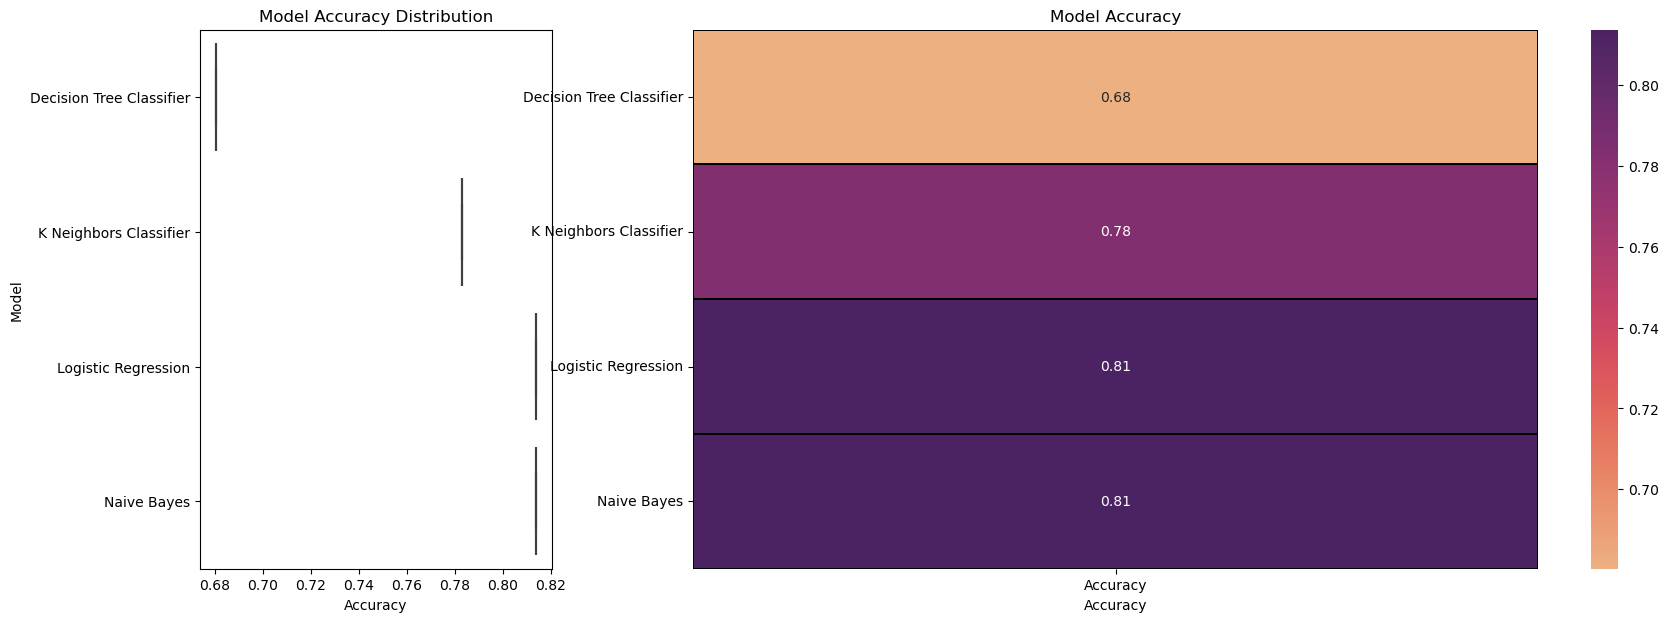

Total Matches: 14150
Total Draws: 2636
Percentage of actual draws: 18.63%
Percentage of correct draw predictions for Logistic Regression: 0.00%
Percentage of correct draw predictions for Naive Bayes: 0.00%
Percentage of correct draw predictions for K Neighbors Classifier: 17.37%
Percentage of correct draw predictions for Decision Tree Classifier: 19.79%


In [107]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assume `data`, `b1`, and `b2` are defined

train = data.loc[data['Season'].isin(b1), :]
test = data.loc[data['Season'].isin(b2), :]

# Define the features and target
features = ['RTLM', 'RTLG', 'RTHG', 'RTAG', 'CALG', 'AGSH', 'AGSA', 'RALG']
target = 'BTTS_D'

x_train = train[features]
y_train = train[target]
x_test = test[features]
y_test = test[target]

# Save original indices for alignment later
test_indices = x_test.index

# Standardize the data
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=2000),
    'Naive Bayes': GaussianNB(),
    'K Neighbors Classifier': KNeighborsClassifier(),
    'Decision Tree Classifier': DecisionTreeClassifier()
}

# Train and evaluate models
results = []

for model_name, model in models.items():
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    accuracy = accuracy_score(y_test, predictions)
    results.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Classification Report': classification_report(y_test, predictions, zero_division=1, output_dict=True),
        'Predictions': predictions
    })

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Plotting the results
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 7), width_ratios=[1, 3])

# Boxplot of the accuracy distribution
sns.boxplot(data=results_df.sort_values(by='Model'), x="Accuracy", y="Model", width=.8, ax=axes[0], palette="husl").set_title("Model Accuracy Distribution")

# Heatmap of accuracy
res = results_df.pivot_table(index='Model', values='Accuracy')
heatmap = sns.heatmap(res, cmap='flare', ax=axes[1], annot=True, fmt=".2f", linewidths=0.1, linecolor="black")
heatmap.set_title("Model Accuracy")
heatmap.set_ylabel('')
heatmap.set_xlabel('Accuracy')

plt.show()

# Calculate the percentage of actual draws
total_matches = len(test)
actual_draws = test[target].sum()
percentage_actual_draws = (actual_draws / total_matches) * 100
print(f"Total Matches: {total_matches}")
print(f"Total Draws: {actual_draws}")
print(f"Percentage of actual draws: {percentage_actual_draws:.2f}%")

# Calculate the percentage of correct draw predictions
for result in results:
    draw_predictions = (result['Predictions'] == 1)
    correct_draw_predictions = (draw_predictions & (y_test == 1)).sum()
    total_draw_predictions = draw_predictions.sum()
    if total_draw_predictions > 0:
        percentage_correct_draw_predictions = (correct_draw_predictions / total_draw_predictions) * 100
    else:
        percentage_correct_draw_predictions = 0
    print(f"Percentage of correct draw predictions for {result['Model']}: {percentage_correct_draw_predictions:.2f}%")




<h4>CS</h4>

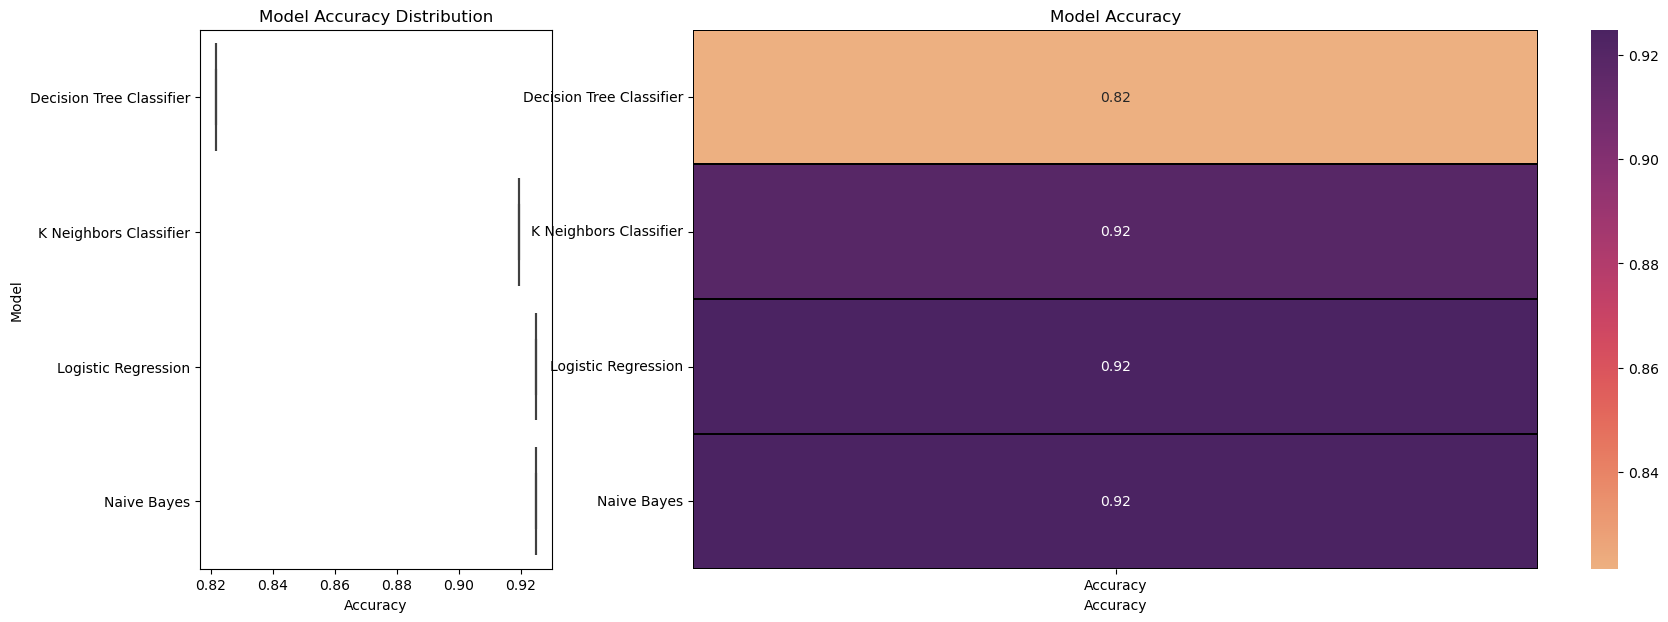


Classification Report for Logistic Regression :
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     13086
           1       1.00      0.00      0.00      1064

    accuracy                           0.92     14150
   macro avg       0.96      0.50      0.48     14150
weighted avg       0.93      0.92      0.89     14150


Sample Predictions vs Actual values for Logistic Regression :
        id     Season  Country HomeTeam     AwayTeam  Actual  Predicted
3802  3802  2022-2023  England   Fulham    Liverpool       0          0
3824  3824  2022-2023  England   Fulham    Brentford       0          0
3842  3842  2022-2023  England   Fulham     Brighton       0          0
3871  3871  2022-2023  England   Fulham    Newcastle       0          0
3890  3890  2022-2023  England   Fulham  Bournemouth       0          0
3905  3905  2022-2023  England   Fulham  Aston Villa       0          0
3923  3923  2022-2023  England   Fulham      Everton     

In [109]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


train = data.loc[data['Season'].isin(b1), :]
test = data.loc[data['Season'].isin(b2), :]

# Define the features and target
features = ['RTLM', 'RTLG', 'RTHG', 'RTAG', 'CALG', 'AGSH', 'AGSA', 'RALG']
target = 'CS'

x_train = train[features]
y_train = train[target]
x_test = test[features]
y_test = test[target]

# Save original indices for alignment later
test_indices = x_test.index

# Standardize the data
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=2000),
    'Naive Bayes': GaussianNB(),
    'K Neighbors Classifier': KNeighborsClassifier(),
    'Decision Tree Classifier': DecisionTreeClassifier()
}

# Train and evaluate models
results = []

for model_name, model in models.items():
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    accuracy = accuracy_score(y_test, predictions)
    results.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Classification Report': classification_report(y_test, predictions, zero_division=1),
        'Predictions': predictions
    })

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Plotting the results
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 7), width_ratios=[1, 3])

# Boxplot of the accuracy distribution
sns.boxplot(data=results_df.sort_values(by='Model'), x="Accuracy", y="Model", width=.8, ax=axes[0], palette="husl").set_title("Model Accuracy Distribution")

# Heatmap of accuracy
res = results_df.pivot_table(index='Model', values='Accuracy')
heatmap = sns.heatmap(res, cmap='flare', ax=axes[1], annot=True, fmt=".2f", linewidths=0.1, linecolor="black")
heatmap.set_title("Model Accuracy")
heatmap.set_ylabel('')
heatmap.set_xlabel('Accuracy')

plt.show()

# Filter test set for "Fulham" HomeTeam
fulham_test = test[test['HomeTeam'] == 'Fulham']

# Print detailed classification reports and predictions for Fulham games
for result in results:
    print(f"\nClassification Report for {result['Model']} :\n{result['Classification Report']}\n")
    print(f"Sample Predictions vs Actual values for {result['Model']} :")
    
    # Convert predictions to a pandas Series with the original test indices
    predictions_series = pd.Series(result['Predictions'], index=test_indices)
    
    # Align the indices for Fulham home games
    fulham_predictions = predictions_series.loc[fulham_test.index]

    # Displaying the first 10 predictions and actual values for Fulham games
    sample_results = pd.DataFrame({
        'id': fulham_test['id'],
        'Season': fulham_test['Season'],
        'Country': fulham_test['Country'],
        'HomeTeam': fulham_test['HomeTeam'],
        'AwayTeam': fulham_test['AwayTeam'],
        'Actual': y_test.loc[fulham_test.index],
        'Predicted': fulham_predictions
    }).head(10)
    
    print(sample_results)
    print("\n")


In [110]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

# Assume `data`, `b1`, and `b2` are defined
# Define the features and target
features = ['RTLM', 'RTLG', 'RTHG', 'RTAG', 'CALG', 'AGSH', 'AGSA', 'RALG']
target = 'CS'

train = data.loc[data['Season'].isin(b1), :]
test = data.loc[data['Season'].isin(b2), :]

x_train = train[features]
y_train = train[target]
x_test = test[features]
y_test = test[target]

# Save original indices for alignment later
test_indices = x_test.index

# Standardize the data
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=2000),
    'Naive Bayes': GaussianNB(),
    'K Neighbors Classifier': KNeighborsClassifier(),
    'Decision Tree Classifier': DecisionTreeClassifier()
}

# Train and evaluate models
results = []

for model_name, model in models.items():
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    accuracy = accuracy_score(y_test, predictions)
    class_report = classification_report(y_test, predictions, zero_division=1, output_dict=True)
    
    # Filter test set for "Fulham" HomeTeam
    fulham_test = test[test['HomeTeam'] == 'Fulham']
    
    # Convert predictions to a pandas Series with the original test indices
    predictions_series = pd.Series(predictions, index=test_indices)
    
    # Align the indices for Fulham home games
    fulham_predictions = predictions_series.loc[fulham_test.index].head(10)  # Limit to 10 data points
    
    # Create DataFrame for Fulham predictions
    fulham_results = pd.DataFrame({
        'id': fulham_test['id'].head(10),
        'Season': fulham_test['Season'].head(10),
        'Country': fulham_test['Country'].head(10),
        'HomeTeam': fulham_test['HomeTeam'].head(10),
        'AwayTeam': fulham_test['AwayTeam'].head(10),
        'Actual': y_test.loc[fulham_test.index].head(10),
        'Predicted': fulham_predictions
    })
    
    results.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Classification Report': class_report,
        'Fulham Predictions': fulham_results
    })

# Function to save classification report to Excel
def save_classification_report_to_excel(reports, file_path):
    with pd.ExcelWriter(file_path) as writer:
        for result in reports:
            # Save classification report
            report_df = pd.DataFrame(result['Classification Report']).transpose()
            report_df.to_excel(writer, sheet_name=result['Model'][:20] + '_Report')
            
            # Save Fulham predictions
            fulham_df = result['Fulham Predictions']
            fulham_df.to_excel(writer, sheet_name=result['Model'][:20] + '_Fulham')

# Save the classification reports to an Excel file
save_classification_report_to_excel(results, "C:/Users/Alfredo/Downloads/classification_report_CS.xlsx")

print(f"Classification reports and Fulham predictions saved to C:/Users/Alfredo/Downloads/classification_report_CS.xlsx")


Classification reports and Fulham predictions saved to C:/Users/Alfredo/Downloads/classification_report_CS.xlsx


In [111]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assume `data`, `b1`, and `b2` are already defined
# Define the features and target
features = ['RTLM', 'RTLG', 'RTHG', 'RTAG', 'CALG', 'AGSH', 'AGSA', 'RALG']
target = 'CS'

train = data.loc[data['Season'].isin(b1), :]
test = data.loc[data['Season'].isin(b2), :]

x_train = train[features]
y_train = train[target]
x_test = test[features]
y_test = test[target]

# Save original indices for alignment later
test_indices = x_test.index

# Standardize the data
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=2000),
    'Naive Bayes': GaussianNB(),
    'K Neighbors Classifier': KNeighborsClassifier(),
    'Decision Tree Classifier': DecisionTreeClassifier()
}

# Train and evaluate models
results = []

for model_name, model in models.items():
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    accuracy = accuracy_score(y_test, predictions)
    class_report = classification_report(y_test, predictions, zero_division=1, output_dict=True)
    
    # Create DataFrame for all predictions
    all_predictions = pd.DataFrame({
        'id': test['id'],
        'Season': test['Season'],
        'Country': test['Country'],
        'HomeTeam': test['HomeTeam'],
        'AwayTeam': test['AwayTeam'],
        'Actual': y_test,
        'Predicted': predictions
    })
    
    results.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Classification Report': class_report,
        'All Predictions': all_predictions
    })

# Calculate and print the total number of matches and the percentage of actual vs predicted draws
total_matches = len(test)
actual_draws = test[target].sum()
percentage_actual_draws = (actual_draws / total_matches) * 100

print(f"Total Matches: {total_matches}")
print(f"Total Draws: {actual_draws}")
print(f"Percentage of actual CS: {percentage_actual_draws:.2f}%")

# Calculate the percentage of correct draw predictions
for result in results:
    draw_predictions = (result['All Predictions']['Predicted'] == 1)
    correct_draw_predictions = (draw_predictions & (result['All Predictions']['Actual'] == 1)).sum()
    total_draw_predictions = draw_predictions.sum()
    if total_draw_predictions > 0:
        percentage_correct_draw_predictions = (correct_draw_predictions / total_draw_predictions) * 100
    else:
        percentage_correct_draw_predictions = 0
    print(f"Percentage of correct draw predictions for {result['Model']}: {percentage_correct_draw_predictions:.2f}%")


Total Matches: 14150
Total Draws: 1064
Percentage of actual CS: 7.52%
Percentage of correct draw predictions for Logistic Regression: 0.00%
Percentage of correct draw predictions for Naive Bayes: 0.00%
Percentage of correct draw predictions for K Neighbors Classifier: 4.60%
Percentage of correct draw predictions for Decision Tree Classifier: 7.70%


<h3> Tipe B </h3>

<h4>FTR</h4>

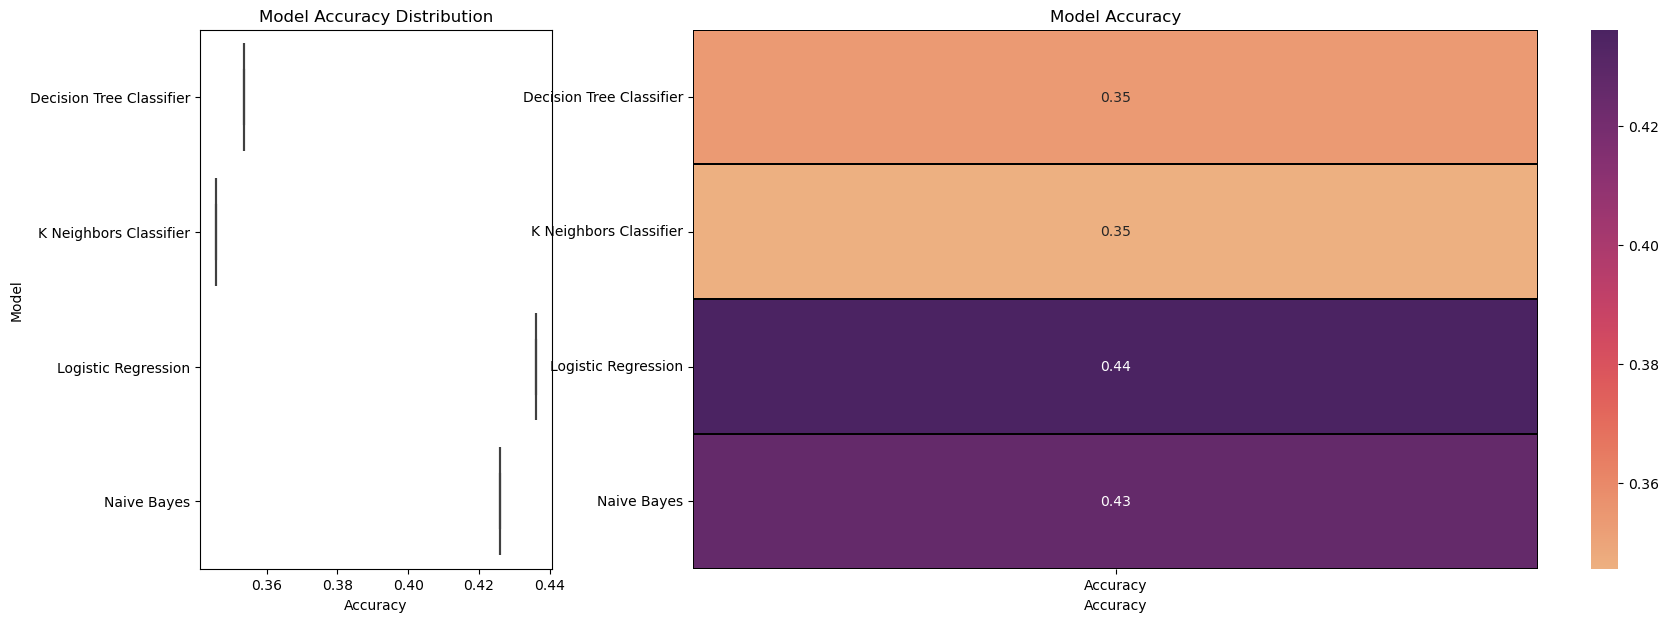


Classification Report for Logistic Regression :
              precision    recall  f1-score   support

           A       0.75      0.00      0.00      4282
           D       1.00      0.00      0.00      3700
           H       0.44      1.00      0.61      6168

    accuracy                           0.44     14150
   macro avg       0.73      0.33      0.20     14150
weighted avg       0.68      0.44      0.27     14150


Sample Predictions vs Actual values for Logistic Regression :
        id     Season  Country HomeTeam     AwayTeam Actual Predicted
3802  3802  2022-2023  England   Fulham    Liverpool      D         H
3824  3824  2022-2023  England   Fulham    Brentford      H         H
3842  3842  2022-2023  England   Fulham     Brighton      H         H
3871  3871  2022-2023  England   Fulham    Newcastle      A         H
3890  3890  2022-2023  England   Fulham  Bournemouth      D         H
3905  3905  2022-2023  England   Fulham  Aston Villa      H         H
3923  3923  2022-

In [114]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


train = data.loc[data['Season'].isin(b1), :]
test = data.loc[data['Season'].isin(b2), :]

# Define the features and target
features = ['RTLM', 'RTLG', 'RTHG', 'RTAG', 'CALG', 'AGSH', 'AGSA', 'RALG']
target = 'FTR'

x_train = train[features]
y_train = train[target]
x_test = test[features]
y_test = test[target]

# Save original indices for alignment later
test_indices = x_test.index

# Standardize the data
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=2000),
    'Naive Bayes': GaussianNB(),
    'K Neighbors Classifier': KNeighborsClassifier(),
    'Decision Tree Classifier': DecisionTreeClassifier()
}

# Train and evaluate models
results = []

for model_name, model in models.items():
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    accuracy = accuracy_score(y_test, predictions)
    results.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Classification Report': classification_report(y_test, predictions, zero_division=1),
        'Predictions': predictions
    })

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Plotting the results
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 7), width_ratios=[1, 3])

# Boxplot of the accuracy distribution
sns.boxplot(data=results_df.sort_values(by='Model'), x="Accuracy", y="Model", width=.8, ax=axes[0], palette="husl").set_title("Model Accuracy Distribution")

# Heatmap of accuracy
res = results_df.pivot_table(index='Model', values='Accuracy')
heatmap = sns.heatmap(res, cmap='flare', ax=axes[1], annot=True, fmt=".2f", linewidths=0.1, linecolor="black")
heatmap.set_title("Model Accuracy")
heatmap.set_ylabel('')
heatmap.set_xlabel('Accuracy')

plt.show()

# Filter test set for "Fulham" HomeTeam
fulham_test = test[test['HomeTeam'] == 'Fulham']

# Print detailed classification reports and predictions for Fulham games
for result in results:
    print(f"\nClassification Report for {result['Model']} :\n{result['Classification Report']}\n")
    print(f"Sample Predictions vs Actual values for {result['Model']} :")
    
    # Convert predictions to a pandas Series with the original test indices
    predictions_series = pd.Series(result['Predictions'], index=test_indices)
    
    # Align the indices for Fulham home games
    fulham_predictions = predictions_series.loc[fulham_test.index]

    # Displaying the first 10 predictions and actual values for Fulham games
    sample_results = pd.DataFrame({
        'id': fulham_test['id'],
        'Season': fulham_test['Season'],
        'Country': fulham_test['Country'],
        'HomeTeam': fulham_test['HomeTeam'],
        'AwayTeam': fulham_test['AwayTeam'],
        'Actual': y_test.loc[fulham_test.index],
        'Predicted': fulham_predictions
    }).head(10)
    
    print(sample_results)
    print("\n")


In [115]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

# Assume `data`, `b1`, and `b2` are defined
# Define the features and target
features = ['RTLM', 'RTLG', 'RTHG', 'RTAG', 'CALG', 'AGSH', 'AGSA', 'RALG']
target = 'FTR'

train = data.loc[data['Season'].isin(b1), :]
test = data.loc[data['Season'].isin(b2), :]

x_train = train[features]
y_train = train[target]
x_test = test[features]
y_test = test[target]

# Save original indices for alignment later
test_indices = x_test.index

# Standardize the data
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=2000),
    'Naive Bayes': GaussianNB(),
    'K Neighbors Classifier': KNeighborsClassifier(),
    'Decision Tree Classifier': DecisionTreeClassifier()
}

# Train and evaluate models
results = []

for model_name, model in models.items():
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    accuracy = accuracy_score(y_test, predictions)
    class_report = classification_report(y_test, predictions, zero_division=1, output_dict=True)
    
    # Filter test set for "Fulham" HomeTeam
    fulham_test = test[test['HomeTeam'] == 'Fulham']
    
    # Convert predictions to a pandas Series with the original test indices
    predictions_series = pd.Series(predictions, index=test_indices)
    
    # Align the indices for Fulham home games
    fulham_predictions = predictions_series.loc[fulham_test.index].head(10)  # Limit to 10 data points
    
    # Create DataFrame for Fulham predictions
    fulham_results = pd.DataFrame({
        'id': fulham_test['id'].head(10),
        'Season': fulham_test['Season'].head(10),
        'Country': fulham_test['Country'].head(10),
        'HomeTeam': fulham_test['HomeTeam'].head(10),
        'AwayTeam': fulham_test['AwayTeam'].head(10),
        'Actual': y_test.loc[fulham_test.index].head(10),
        'Predicted': fulham_predictions
    })
    
    results.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Classification Report': class_report,
        'Fulham Predictions': fulham_results
    })

# Function to save classification report to Excel
def save_classification_report_to_excel(reports, file_path):
    with pd.ExcelWriter(file_path) as writer:
        for result in reports:
            # Save classification report
            report_df = pd.DataFrame(result['Classification Report']).transpose()
            sheet_name_report = result['Model'][:30] + '_Report'
            if len(sheet_name_report) > 31:
                sheet_name_report = sheet_name_report[:28] + '...'
            report_df.to_excel(writer, sheet_name=sheet_name_report)
            
            # Save Fulham predictions
            fulham_df = result['Fulham Predictions']
            sheet_name_fulham = result['Model'][:30] + '_Fulham_Predictions'
            if len(sheet_name_fulham) > 31:
                sheet_name_fulham = sheet_name_fulham[:28] + '...'
            fulham_df.to_excel(writer, sheet_name=sheet_name_fulham)

# Save the classification reports to an Excel file
save_classification_report_to_excel(results, "C:/Users/Alfredo/Downloads/classification_report_FTR.xlsx")

print(f"Classification reports and Fulham predictions saved to C:/Users/Alfredo/Downloads/classification_report_FTR.xlsx")


Classification reports and Fulham predictions saved to C:/Users/Alfredo/Downloads/classification_report_FTR.xlsx


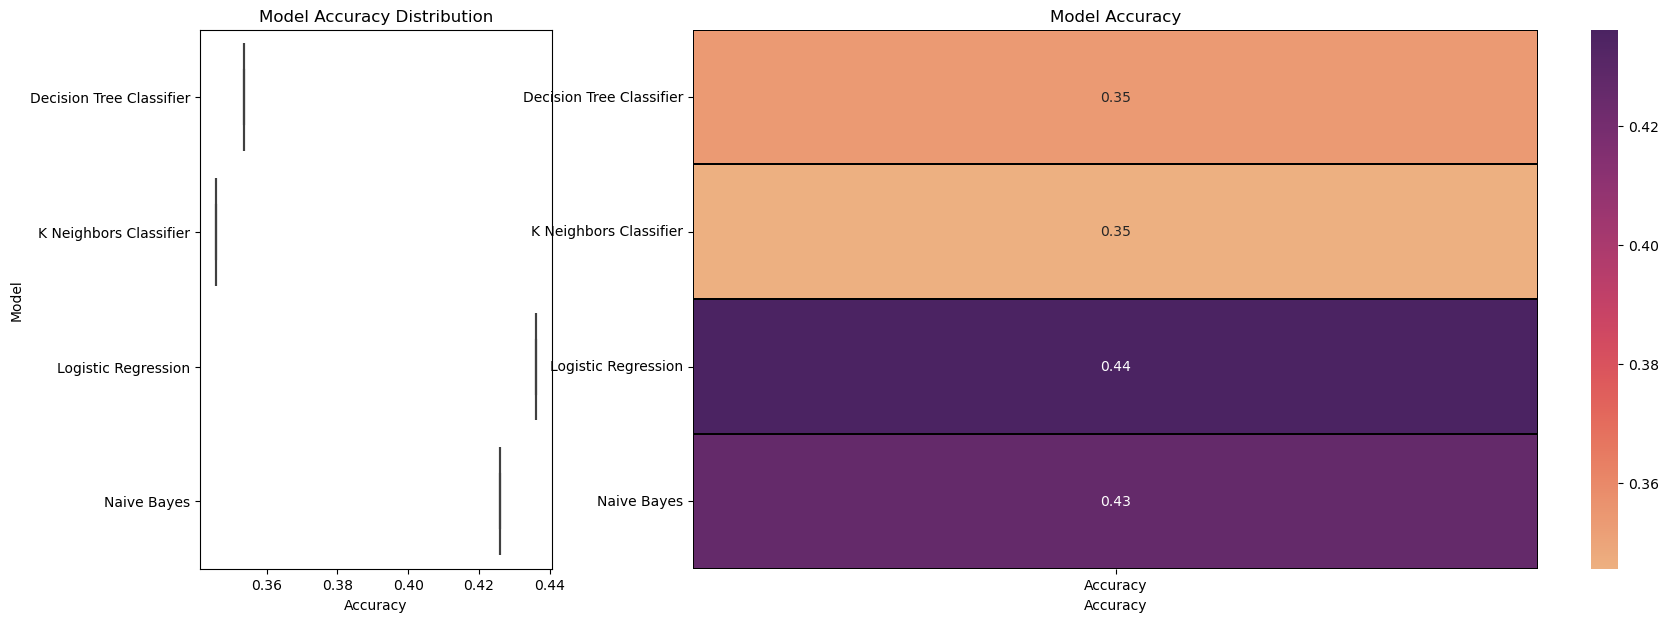

Total Matches: 14150
Total H: 6168, Percentage: 43.59%
Total D: 3700, Percentage: 26.15%
Total A: 4282, Percentage: 30.26%
Percentage of correct H predictions for Logistic Regression: 43.60%
Percentage of correct D predictions for Logistic Regression: 0.00%
Percentage of correct A predictions for Logistic Regression: 75.00%
Percentage of correct H predictions for Naive Bayes: 43.59%
Percentage of correct D predictions for Naive Bayes: 0.00%
Percentage of correct A predictions for Naive Bayes: 31.06%
Percentage of correct H predictions for K Neighbors Classifier: 43.63%
Percentage of correct D predictions for K Neighbors Classifier: 26.50%
Percentage of correct A predictions for K Neighbors Classifier: 30.64%
Percentage of correct H predictions for Decision Tree Classifier: 43.12%
Percentage of correct D predictions for Decision Tree Classifier: 26.88%
Percentage of correct A predictions for Decision Tree Classifier: 30.29%


In [116]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assume `data`, `b1`, and `b2` are already defined
# Define the features and target
features = ['RTLM', 'RTLG', 'RTHG', 'RTAG', 'CALG', 'AGSH', 'AGSA', 'RALG']
target = 'FTR'

train = data.loc[data['Season'].isin(b1), :]
test = data.loc[data['Season'].isin(b2), :]

x_train = train[features]
y_train = train[target]
x_test = test[features]
y_test = test[target]

# Save original indices for alignment later
test_indices = x_test.index

# Standardize the data
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=2000),
    'Naive Bayes': GaussianNB(),
    'K Neighbors Classifier': KNeighborsClassifier(),
    'Decision Tree Classifier': DecisionTreeClassifier()
}

# Train and evaluate models
results = []

for model_name, model in models.items():
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    accuracy = accuracy_score(y_test, predictions)
    class_report = classification_report(y_test, predictions, zero_division=1, output_dict=True)
    
    # Create DataFrame for all predictions
    all_predictions = pd.DataFrame({
        'id': test['id'],
        'Season': test['Season'],
        'Country': test['Country'],
        'HomeTeam': test['HomeTeam'],
        'AwayTeam': test['AwayTeam'],
        'Actual': y_test,
        'Predicted': predictions
    })
    
    results.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Classification Report': class_report,
        'All Predictions': all_predictions
    })

# Plotting the results
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 7), width_ratios=[1, 3])

# Boxplot of the accuracy distribution
sns.boxplot(data=results_df.sort_values(by='Model'), x="Accuracy", y="Model", width=.8, ax=axes[0], palette="husl").set_title("Model Accuracy Distribution")

# Heatmap of accuracy
res = results_df.pivot_table(index='Model', values='Accuracy')
heatmap = sns.heatmap(res, cmap='flare', ax=axes[1], annot=True, fmt=".2f", linewidths=0.1, linecolor="black")
heatmap.set_title("Model Accuracy")
heatmap.set_ylabel('')
heatmap.set_xlabel('Accuracy')

plt.show()



# Calculate and print the total number of matches and the percentage of actual H, D, A
total_matches = len(test)
actual_h = (y_test == 'H').sum()
actual_d = (y_test == 'D').sum()
actual_a = (y_test == 'A').sum()
percentage_actual_h = (actual_h / total_matches) * 100
percentage_actual_d = (actual_d / total_matches) * 100
percentage_actual_a = (actual_a / total_matches) * 100

print(f"Total Matches: {total_matches}")
print(f"Total H: {actual_h}, Percentage: {percentage_actual_h:.2f}%")
print(f"Total D: {actual_d}, Percentage: {percentage_actual_d:.2f}%")
print(f"Total A: {actual_a}, Percentage: {percentage_actual_a:.2f}%")

# Calculate the percentage of correct H, D, A predictions
for result in results:
    h_predictions = (result['All Predictions']['Predicted'] == 'H')
    d_predictions = (result['All Predictions']['Predicted'] == 'D')
    a_predictions = (result['All Predictions']['Predicted'] == 'A')

    correct_h_predictions = (h_predictions & (result['All Predictions']['Actual'] == 'H')).sum()
    correct_d_predictions = (d_predictions & (result['All Predictions']['Actual'] == 'D')).sum()
    correct_a_predictions = (a_predictions & (result['All Predictions']['Actual'] == 'A')).sum()

    total_h_predictions = h_predictions.sum()
    total_d_predictions = d_predictions.sum()
    total_a_predictions = a_predictions.sum()

    percentage_correct_h_predictions = (correct_h_predictions / total_h_predictions) * 100 if total_h_predictions > 0 else 0
    percentage_correct_d_predictions = (correct_d_predictions / total_d_predictions) * 100 if total_d_predictions > 0 else 0
    percentage_correct_a_predictions = (correct_a_predictions / total_a_predictions) * 100 if total_a_predictions > 0 else 0

    print(f"Percentage of correct H predictions for {result['Model']}: {percentage_correct_h_predictions:.2f}%")
    print(f"Percentage of correct D predictions for {result['Model']}: {percentage_correct_d_predictions:.2f}%")
    print(f"Percentage of correct A predictions for {result['Model']}: {percentage_correct_a_predictions:.2f}%")


<h4>H</h4>

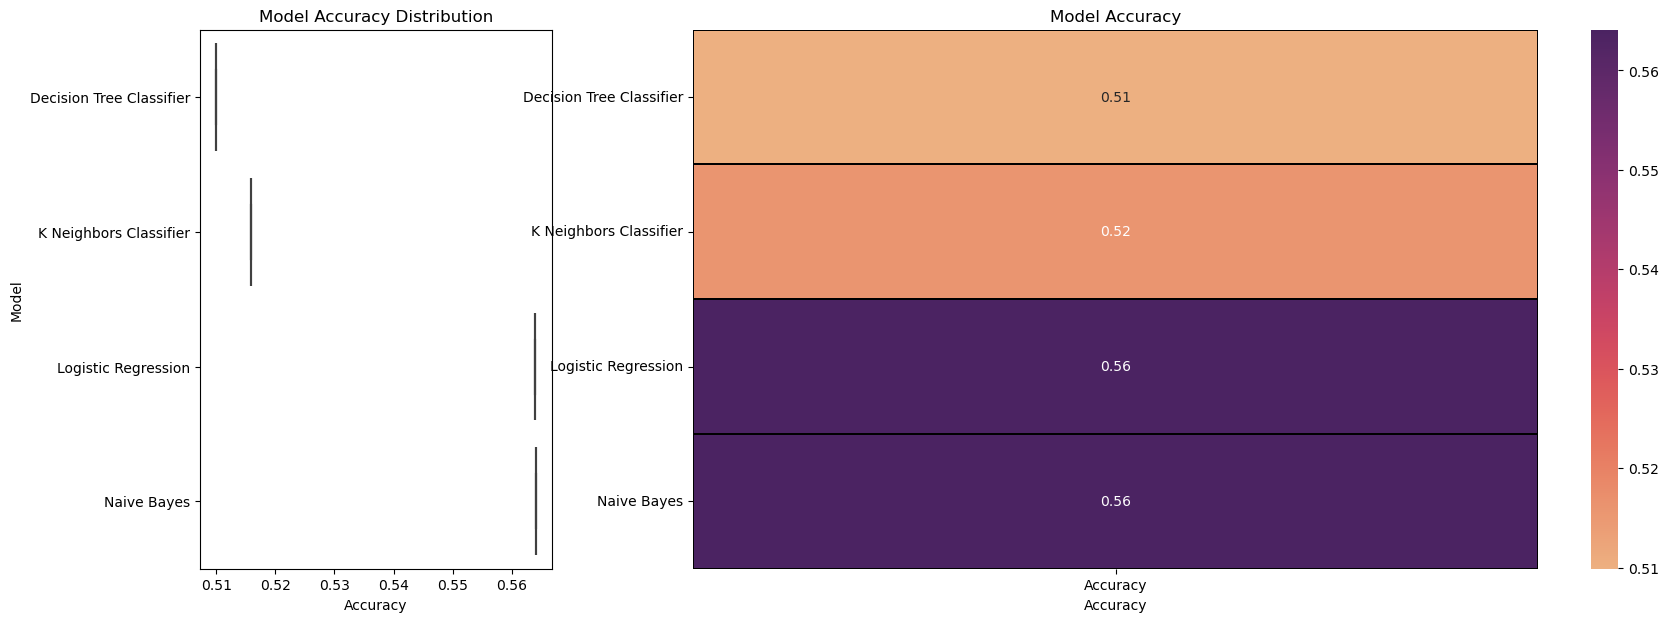


Classification Report for Logistic Regression :
              precision    recall  f1-score   support

           0       0.56      1.00      0.72      7982
           1       0.40      0.00      0.00      6168

    accuracy                           0.56     14150
   macro avg       0.48      0.50      0.36     14150
weighted avg       0.49      0.56      0.41     14150


Sample Predictions vs Actual values for Logistic Regression :
        id     Season  Country HomeTeam     AwayTeam  Actual  Predicted
3802  3802  2022-2023  England   Fulham    Liverpool       0          0
3824  3824  2022-2023  England   Fulham    Brentford       1          0
3842  3842  2022-2023  England   Fulham     Brighton       1          0
3871  3871  2022-2023  England   Fulham    Newcastle       0          0
3890  3890  2022-2023  England   Fulham  Bournemouth       0          0
3905  3905  2022-2023  England   Fulham  Aston Villa       1          0
3923  3923  2022-2023  England   Fulham      Everton     

In [118]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


train = data.loc[data['Season'].isin(b1), :]
test = data.loc[data['Season'].isin(b2), :]

# Define the features and target
features = ['RTLM', 'RTLG', 'RTHG', 'RTAG', 'CALG', 'AGSH', 'AGSA', 'RALG']
target = 'H'

x_train = train[features]
y_train = train[target]
x_test = test[features]
y_test = test[target]

# Save original indices for alignment later
test_indices = x_test.index

# Standardize the data
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=2000),
    'Naive Bayes': GaussianNB(),
    'K Neighbors Classifier': KNeighborsClassifier(),
    'Decision Tree Classifier': DecisionTreeClassifier()
}

# Train and evaluate models
results = []

for model_name, model in models.items():
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    accuracy = accuracy_score(y_test, predictions)
    results.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Classification Report': classification_report(y_test, predictions, zero_division=1),
        'Predictions': predictions
    })

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Plotting the results
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 7), width_ratios=[1, 3])

# Boxplot of the accuracy distribution
sns.boxplot(data=results_df.sort_values(by='Model'), x="Accuracy", y="Model", width=.8, ax=axes[0], palette="husl").set_title("Model Accuracy Distribution")

# Heatmap of accuracy
res = results_df.pivot_table(index='Model', values='Accuracy')
heatmap = sns.heatmap(res, cmap='flare', ax=axes[1], annot=True, fmt=".2f", linewidths=0.1, linecolor="black")
heatmap.set_title("Model Accuracy")
heatmap.set_ylabel('')
heatmap.set_xlabel('Accuracy')

plt.show()

# Filter test set for "Fulham" HomeTeam
fulham_test = test[test['HomeTeam'] == 'Fulham']

# Print detailed classification reports and predictions for Fulham games
for result in results:
    print(f"\nClassification Report for {result['Model']} :\n{result['Classification Report']}\n")
    print(f"Sample Predictions vs Actual values for {result['Model']} :")
    
    # Convert predictions to a pandas Series with the original test indices
    predictions_series = pd.Series(result['Predictions'], index=test_indices)
    
    # Align the indices for Fulham home games
    fulham_predictions = predictions_series.loc[fulham_test.index]

    # Displaying the first 10 predictions and actual values for Fulham games
    sample_results = pd.DataFrame({
        'id': fulham_test['id'],
        'Season': fulham_test['Season'],
        'Country': fulham_test['Country'],
        'HomeTeam': fulham_test['HomeTeam'],
        'AwayTeam': fulham_test['AwayTeam'],
        'Actual': y_test.loc[fulham_test.index],
        'Predicted': fulham_predictions
    }).head(10)
    
    print(sample_results)
    print("\n")


In [119]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assume `data`, `b1`, and `b2` are defined

train = data.loc[data['Season'].isin(b1), :]
test = data.loc[data['Season'].isin(b2), :]

# Define the features and target
features = ['RTLM', 'RTLG', 'RTHG', 'RTAG', 'CALG', 'AGSH', 'AGSA', 'RALG']
target = 'H'

x_train = train[features]
y_train = train[target]
x_test = test[features]
y_test = test[target]

# Save original indices for alignment later
test_indices = x_test.index

# Standardize the data
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=2000),
    'Naive Bayes': GaussianNB(),
    'K Neighbors Classifier': KNeighborsClassifier(),
    'Decision Tree Classifier': DecisionTreeClassifier()
}

# Train and evaluate models
results = []

for model_name, model in models.items():
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    accuracy = accuracy_score(y_test, predictions)
    class_report = classification_report(y_test, predictions, zero_division=1, output_dict=True)
    
    # Filter test set for "Fulham" HomeTeam
    fulham_test = test[test['HomeTeam'] == 'Fulham']
    
    # Convert predictions to a pandas Series with the original test indices
    predictions_series = pd.Series(predictions, index=test_indices)
    
    # Align the indices for Fulham home games
    fulham_predictions = predictions_series.loc[fulham_test.index].head(10)  # Limit to 10 data points
    
    # Create DataFrame for Fulham predictions
    fulham_results = pd.DataFrame({
        'id': fulham_test['id'].head(10),
        'Season': fulham_test['Season'].head(10),
        'Country': fulham_test['Country'].head(10),
        'HomeTeam': fulham_test['HomeTeam'].head(10),
        'AwayTeam': fulham_test['AwayTeam'].head(10),
        'Actual': y_test.loc[fulham_test.index].head(10),
        'Predicted': fulham_predictions
    })
    
    results.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Classification Report': class_report,
        'Fulham Predictions': fulham_results
    })

# Function to save classification report to Excel
def save_classification_report_to_excel(reports, file_path):
    with pd.ExcelWriter(file_path) as writer:
        for result in reports:
            # Save classification report
            report_df = pd.DataFrame(result['Classification Report']).transpose()
            sheet_name = result['Model'][:30] + '_Report'
            if len(sheet_name) > 31:
                sheet_name = sheet_name[:31]
            report_df.to_excel(writer, sheet_name=sheet_name)
            
            # Save Fulham predictions
            fulham_df = result['Fulham Predictions']
            sheet_name = result['Model'][:30] + '_Fulham'
            if len(sheet_name) > 31:
                sheet_name = sheet_name[:31]
            fulham_df.to_excel(writer, sheet_name=sheet_name)

# Save the classification reports to an Excel file
save_classification_report_to_excel(results, "C:/Users/Alfredo/Downloads/classification_report_H.xlsx")

print(f"Classification reports and Fulham predictions saved to C:/Users/Alfredo/Downloads/classification_report_H.xlsx")


Classification reports and Fulham predictions saved to C:/Users/Alfredo/Downloads/classification_report_H.xlsx


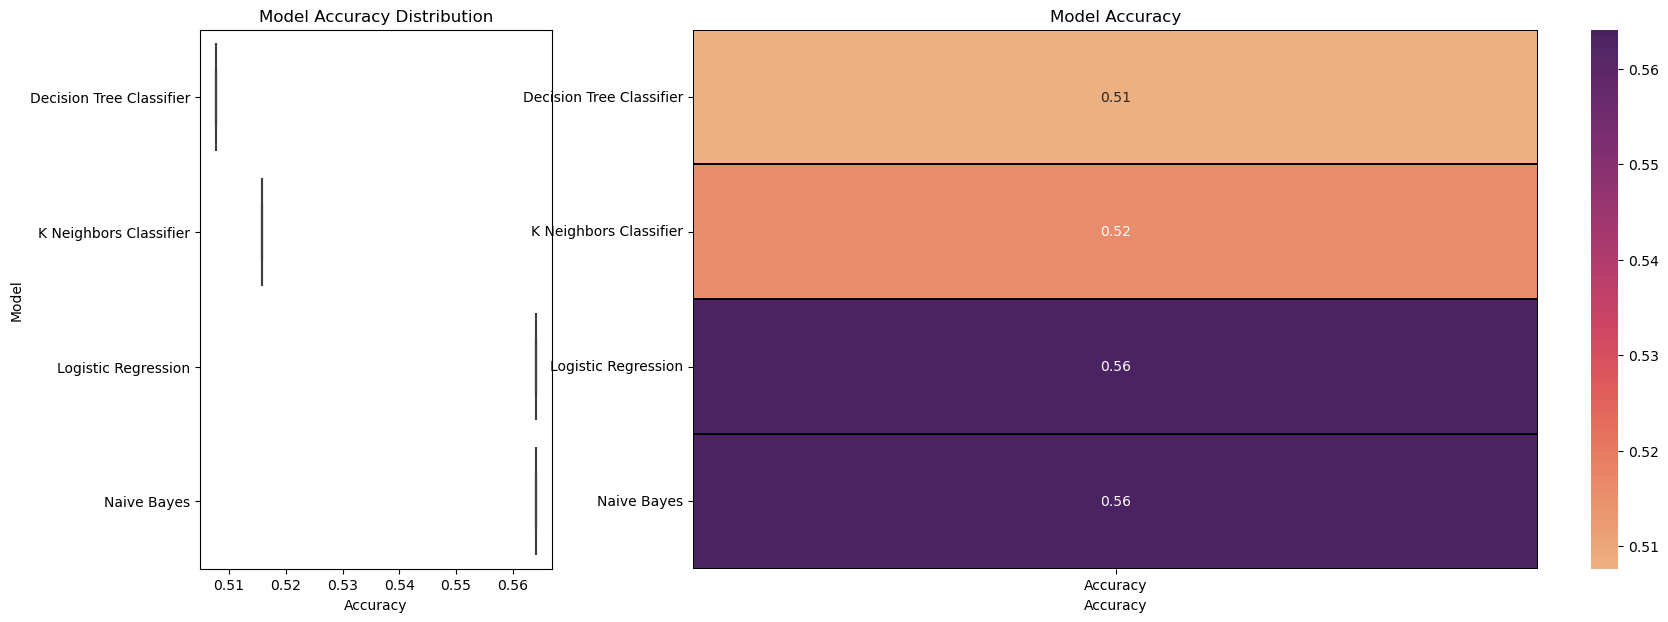

Total Matches: 14150
Total Wins: 6168
Percentage of actual wins: 43.59%
Percentage of correct H win predictions for Logistic Regression: 40.00%
Percentage of correct H win predictions for Naive Bayes: 0.00%
Percentage of correct H win predictions for K Neighbors Classifier: 43.63%
Percentage of correct H win predictions for Decision Tree Classifier: 43.48%


In [120]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assume `data`, `b1`, and `b2` are already defined
# Define the features and target
features = ['RTLM', 'RTLG', 'RTHG', 'RTAG', 'CALG', 'AGSH', 'AGSA', 'RALG']
target = 'H'

train = data.loc[data['Season'].isin(b1), :]
test = data.loc[data['Season'].isin(b2), :]

x_train = train[features]
y_train = train[target]
x_test = test[features]
y_test = test[target]

# Save original indices for alignment later
test_indices = x_test.index

# Standardize the data
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=2000),
    'Naive Bayes': GaussianNB(),
    'K Neighbors Classifier': KNeighborsClassifier(),
    'Decision Tree Classifier': DecisionTreeClassifier()
}

# Train and evaluate models
results = []

for model_name, model in models.items():
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    accuracy = accuracy_score(y_test, predictions)
    results.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Classification Report': classification_report(y_test, predictions, zero_division=1),
        'Predictions': predictions
    })

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Plotting the results
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 7), width_ratios=[1, 3])

# Boxplot of the accuracy distribution
sns.boxplot(data=results_df.sort_values(by='Model'), x="Accuracy", y="Model", width=.8, ax=axes[0], palette="husl").set_title("Model Accuracy Distribution")

# Heatmap of accuracy
res = results_df.pivot_table(index='Model', values='Accuracy')
heatmap = sns.heatmap(res, cmap='flare', ax=axes[1], annot=True, fmt=".2f", linewidths=0.1, linecolor="black")
heatmap.set_title("Model Accuracy")
heatmap.set_ylabel('')
heatmap.set_xlabel('Accuracy')

plt.show()

# Calculate the percentage of actual wins
total_matches = len(test)
actual_wins = test[target].sum()
percentage_actual_wins = (actual_wins / total_matches) * 100
print(f"Total Matches: {total_matches}")
print(f"Total Wins: {actual_wins}")
print(f"Percentage of actual wins: {percentage_actual_wins:.2f}%")

# Calculate the percentage of correct win predictions
for result in results:
    win_predictions = (result['Predictions'] == 1)
    correct_win_predictions = (win_predictions & (y_test == 1)).sum()
    total_win_predictions = win_predictions.sum()
    if total_win_predictions > 0:
        percentage_correct_win_predictions = (correct_win_predictions / total_win_predictions) * 100
    else:
        percentage_correct_win_predictions = 0
    print(f"Percentage of correct H win predictions for {result['Model']}: {percentage_correct_win_predictions:.2f}%")




<h4>A</h4>

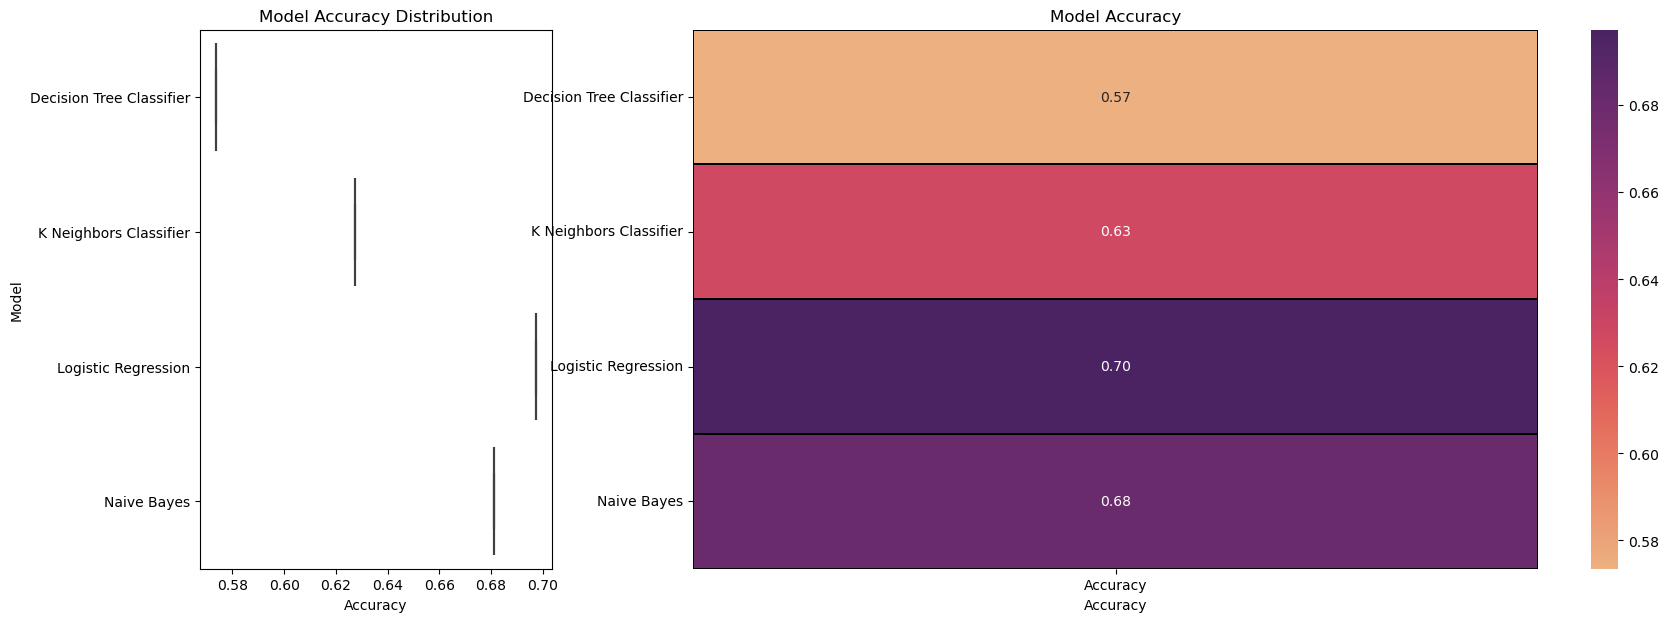


Classification Report for Logistic Regression :
              precision    recall  f1-score   support

           0       0.70      1.00      0.82      9868
           1       1.00      0.00      0.00      4282

    accuracy                           0.70     14150
   macro avg       0.85      0.50      0.41     14150
weighted avg       0.79      0.70      0.57     14150


Sample Predictions vs Actual values for Logistic Regression :
        id     Season  Country HomeTeam     AwayTeam  Actual  Predicted
3802  3802  2022-2023  England   Fulham    Liverpool       0          0
3824  3824  2022-2023  England   Fulham    Brentford       0          0
3842  3842  2022-2023  England   Fulham     Brighton       0          0
3871  3871  2022-2023  England   Fulham    Newcastle       1          0
3890  3890  2022-2023  England   Fulham  Bournemouth       0          0
3905  3905  2022-2023  England   Fulham  Aston Villa       0          0
3923  3923  2022-2023  England   Fulham      Everton     

In [122]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


train = data.loc[data['Season'].isin(b1), :]
test = data.loc[data['Season'].isin(b2), :]

# Define the features and target
features = ['RTLM', 'RTLG', 'RTHG', 'RTAG', 'CALG', 'AGSH', 'AGSA', 'RALG']
target = 'A'

x_train = train[features]
y_train = train[target]
x_test = test[features]
y_test = test[target]

# Save original indices for alignment later
test_indices = x_test.index

# Standardize the data
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=2000),
    'Naive Bayes': GaussianNB(),
    'K Neighbors Classifier': KNeighborsClassifier(),
    'Decision Tree Classifier': DecisionTreeClassifier()
}

# Train and evaluate models
results = []

for model_name, model in models.items():
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    accuracy = accuracy_score(y_test, predictions)
    results.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Classification Report': classification_report(y_test, predictions, zero_division=1),
        'Predictions': predictions
    })

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Plotting the results
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 7), width_ratios=[1, 3])

# Boxplot of the accuracy distribution
sns.boxplot(data=results_df.sort_values(by='Model'), x="Accuracy", y="Model", width=.8, ax=axes[0], palette="husl").set_title("Model Accuracy Distribution")

# Heatmap of accuracy
res = results_df.pivot_table(index='Model', values='Accuracy')
heatmap = sns.heatmap(res, cmap='flare', ax=axes[1], annot=True, fmt=".2f", linewidths=0.1, linecolor="black")
heatmap.set_title("Model Accuracy")
heatmap.set_ylabel('')
heatmap.set_xlabel('Accuracy')

plt.show()

# Filter test set for "Fulham" HomeTeam
fulham_test = test[test['HomeTeam'] == 'Fulham']

# Print detailed classification reports and predictions for Fulham games
for result in results:
    print(f"\nClassification Report for {result['Model']} :\n{result['Classification Report']}\n")
    print(f"Sample Predictions vs Actual values for {result['Model']} :")
    
    # Convert predictions to a pandas Series with the original test indices
    predictions_series = pd.Series(result['Predictions'], index=test_indices)
    
    # Align the indices for Fulham home games
    fulham_predictions = predictions_series.loc[fulham_test.index]

    # Displaying the first 10 predictions and actual values for Fulham games
    sample_results = pd.DataFrame({
        'id': fulham_test['id'],
        'Season': fulham_test['Season'],
        'Country': fulham_test['Country'],
        'HomeTeam': fulham_test['HomeTeam'],
        'AwayTeam': fulham_test['AwayTeam'],
        'Actual': y_test.loc[fulham_test.index],
        'Predicted': fulham_predictions
    }).head(10)
    
    print(sample_results)
    print("\n")


In [123]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

train = data.loc[data['Season'].isin(b1), :]
test = data.loc[data['Season'].isin(b2), :]

# Define the features and target
features = ['RTLM', 'RTLG', 'RTHG', 'RTAG', 'CALG', 'AGSH', 'AGSA', 'RALG']
target = 'A'

x_train = train[features]
y_train = train[target]
x_test = test[features]
y_test = test[target]

# Save original indices for alignment later
test_indices = x_test.index

# Standardize the data
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=2000),
    'Naive Bayes': GaussianNB(),
    'K Neighbors Classifier': KNeighborsClassifier(),
    'Decision Tree Classifier': DecisionTreeClassifier()
}

# Train and evaluate models
results = []

for model_name, model in models.items():
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    accuracy = accuracy_score(y_test, predictions)
    class_report = classification_report(y_test, predictions, zero_division=1, output_dict=True)
    
    # Filter test set for "Fulham" HomeTeam
    fulham_test = test[test['HomeTeam'] == 'Fulham']
    
    # Convert predictions to a pandas Series with the original test indices
    predictions_series = pd.Series(predictions, index=test_indices)
    
    # Align the indices for Fulham home games
    fulham_predictions = predictions_series.loc[fulham_test.index].head(10)  # Limit to 10 data points
    
    # Create DataFrame for Fulham predictions
    fulham_results = pd.DataFrame({
        'id': fulham_test['id'].head(10),
        'Season': fulham_test['Season'].head(10),
        'Country': fulham_test['Country'].head(10),
        'HomeTeam': fulham_test['HomeTeam'].head(10),
        'AwayTeam': fulham_test['AwayTeam'].head(10),
        'Actual': y_test.loc[fulham_test.index].head(10),
        'Predicted': fulham_predictions
    })
    
    results.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Classification Report': class_report,
        'Fulham Predictions': fulham_results
    })

# Function to save classification report to Excel
def save_classification_report_to_excel(reports, file_path):
    with pd.ExcelWriter(file_path) as writer:
        for result in reports:
            # Save classification report
            report_df = pd.DataFrame(result['Classification Report']).transpose()
            sheet_name_report = result['Model'][:20] + '_Report'
            report_df.to_excel(writer, sheet_name=sheet_name_report)
            
            # Save Fulham predictions
            fulham_df = result['Fulham Predictions']
            sheet_name_fulham = result['Model'][:20] + '_Fulham'
            fulham_df.to_excel(writer, sheet_name=sheet_name_fulham)

# Save the classification reports to an Excel file
save_classification_report_to_excel(results, "C:/Users/Alfredo/Downloads/classification_report_A.xlsx")

print(f"Classification reports and Fulham predictions saved to C:/Users/Alfredo/Downloads/classification_report_A.xlsx")



Classification reports and Fulham predictions saved to C:/Users/Alfredo/Downloads/classification_report_A.xlsx


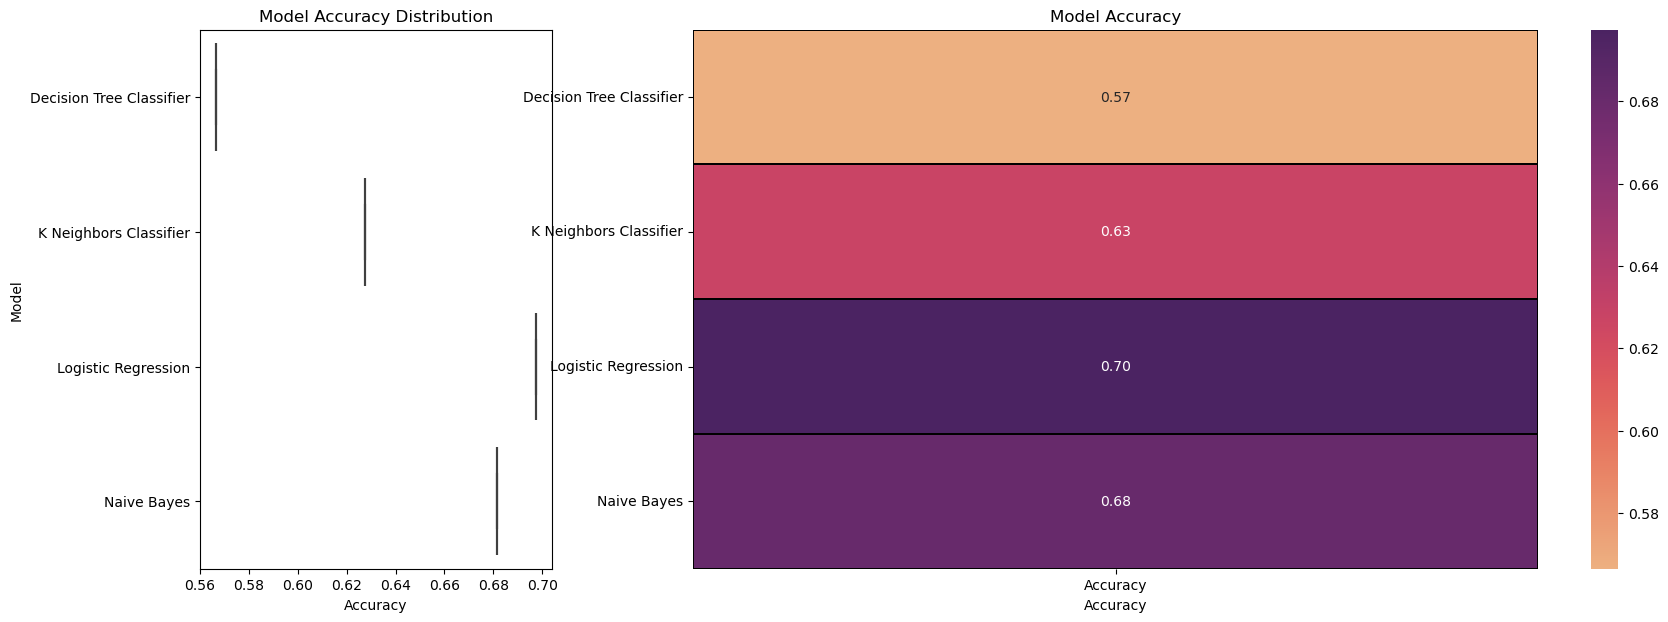

Total Matches: 14150
Total Wins: 4282
Percentage of actual A wins: 30.26%
Percentage of correct A win predictions for Logistic Regression: 0.00%
Percentage of correct A win predictions for Naive Bayes: 29.48%
Percentage of correct A win predictions for K Neighbors Classifier: 29.31%
Percentage of correct A win predictions for Decision Tree Classifier: 30.14%


In [124]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming `data`, `b1`, and `b2` are already defined
# Define the features and target
features = ['RTLM', 'RTLG', 'RTHG', 'RTAG', 'CALG', 'AGSH', 'AGSA', 'RALG']
target = 'A'

train = data.loc[data['Season'].isin(b1), :]
test = data.loc[data['Season'].isin(b2), :]

x_train = train[features]
y_train = train[target]
x_test = test[features]
y_test = test[target]

# Save original indices for alignment later
test_indices = x_test.index

# Standardize the data
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=2000),
    'Naive Bayes': GaussianNB(),
    'K Neighbors Classifier': KNeighborsClassifier(),
    'Decision Tree Classifier': DecisionTreeClassifier()
}

# Train and evaluate models
results = []

for model_name, model in models.items():
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    accuracy = accuracy_score(y_test, predictions)
    results.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Classification Report': classification_report(y_test, predictions, zero_division=1),
        'Predictions': predictions
    })

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Plotting the results
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 7), width_ratios=[1, 3])

# Boxplot of the accuracy distribution
sns.boxplot(data=results_df.sort_values(by='Model'), x="Accuracy", y="Model", width=.8, ax=axes[0], palette="husl").set_title("Model Accuracy Distribution")

# Heatmap of accuracy
res = results_df.pivot_table(index='Model', values='Accuracy')
heatmap = sns.heatmap(res, cmap='flare', ax=axes[1], annot=True, fmt=".2f", linewidths=0.1, linecolor="black")
heatmap.set_title("Model Accuracy")
heatmap.set_ylabel('')
heatmap.set_xlabel('Accuracy')

plt.show()

# Calculate the percentage of actual wins
total_matches = len(test)
actual_wins = test[target].sum()
percentage_actual_wins = (actual_wins / total_matches) * 100
print(f"Total Matches: {total_matches}")
print(f"Total Wins: {actual_wins}")
print(f"Percentage of actual A wins: {percentage_actual_wins:.2f}%")

# Calculate the percentage of correct win predictions
for result in results:
    win_predictions = (result['Predictions'] == 1)
    correct_win_predictions = (win_predictions & (y_test == 1)).sum()
    total_win_predictions = win_predictions.sum()
    if total_win_predictions > 0:
        percentage_correct_win_predictions = (correct_win_predictions / total_win_predictions) * 100
    else:
        percentage_correct_win_predictions = 0
    print(f"Percentage of correct A win predictions for {result['Model']}: {percentage_correct_win_predictions:.2f}%")


